# Tema: **Impacto del COVID-19 en el sector laboral costarricences.

## Identificación del problema

La pandemia de COVID-19 generó suspensiones, reducciones de jornada laboral y desempleo e inactividad, ya sea por incompatibilidad del trabajo desempeñado con la modalidad de teletrabajo, recortes administrativos o por falta de herramientas tecnológicas. Asimismo, las personas que lograron mantenerse laborando durante este periodo vieron un cambio en la calidad de su empleo, debido al aumento de los costos fijos que las medidas sanitarias que las autoridades obligaron a implementar se vieron reflejados en los costos fijos de las eempresas y en reducción de la oferta laboral (esto implicaba una mayor carga laboral para los empleados que permanecieron en las empresas), una menor capacidad utilizada.

Muchos sectores se vieron afectados de manera más inmediata y persistente son los servicios de alojamiento, esparcimiento, comercio, transporte, y aquellos sectores mayormente dependientes del turismo local y foráneo. Por otra parte, el comercio electrónico y los servicios de telecomunicaciones y tecnologías de la información, así como la venta de productos farmacéuticos se vieron favorecidos por el aumento de la demanda de sus productos y servicios. 

El gobierno otorgo la facilidad de retirar el FCL (fondo de capitalización laboral) a aquellos funcionarios que le redujeran o suspendieran su jornada laboral. Los que quedaron desempleados ya tenían ese derecho porque este fondo es un auxilio de cesantía. Por medio de este trámite se tratará de darle seguimieno a la situación laboral de esta población, que en teoría, sería la población economicamente activa.

## Objetivo

> Analizar la afectación de la situación laboral durante lo vivido con la pandemia hasta la fecha.

> Identificar los sectores más afectados, de acuerdo a los retiros de FCL y despidos o suspensiones.

> Identificar la recuperación en el sector laboral.

> Indagar si el tema referente al COVID, fcl y restricciones, realmente fue percibido como un problema por la población costarricense, así como el tipo de sentimientos experimentados en la difusión de las noticias. Este es un breve estuduio cuya finalidad es didactica para entender el funcionamiento del webscraping.


## Preguntas de investigación
*	¿En que sectores permanecieron las personas que no fueron despedidas o que recperaron su ocupación durante la pandemia de COVID-19? 
*	¿Cuales fueron los sectores más afectados? 
*   ¿A que sectores regresaron los trabajadores de los sectores más afectados? 
*	¿Qué parte de la estructura productiva fue la más golpeada: micros, pequeñas, medianas o grandes empresas?
*   ¿En qué meses o fechas exactas existieron un mayor número de noticias referentes al covid, FCL y jornada laboral?
*   ¿Cuál fue el sentimiento que predomino en la redacción de las notas periodisticas y si fueron sustentadas con hechos o meramente opiones?

#  Analisis de comportamiento laboral por COVID
### Se va a predecir...

Los empleados de Costa Rica en época de pandemia se vieron obligados a reducir su lornada laboral o bien ser suspendidos temporalmente. En casos peores fueron despedidos.

Los trabajadores son la fuerza laboral de un país y son los que sostienen la economía. ¿Qué pasa si estos trabajadores no logran recuperar sus trabajos o sus ingresos, cómo se verá afectado el país? Por lo tanto, la tasa de desempleo o subempleo es una de las métricas más importantes para mostrar la economía del país.

La tasa de salida del trabajador por concepto de COVID es un KPI para comprender lo que esta pasando. Esta tasa representa el porcentaje de trabajadores que quedaron desempleado o subempleados por la pandemia.

Se tratará de identificar cual es la tasa de recuperación posible con base en las variable obtenidas. 

## Tabla de contenido
### 1) Introducción

> * Dataset, caracteristicas(features) y objetivo(target value)
> * Descripción del problema

### 2) Análisis descriptivo y EDA (Análisis de datos exploratorios)

> * Desempleado y correlación entre (variables)features
> * Perfil de los trabajadores desempleados
> * Distribución salarial anterior y nueva --Tenure and Monthly charges distribution

### 3) Analisis de Clusters

> * Detección de clústeres de desempleado
> * Análisis de clústeres de desempleados: por datos demográficos, edad y estado civil, y si se consiguiera por sector y zona geografica

### 4) Modelo de predicción de desempleados

> * Proceso de modelo de predicción 
> * Evaluación del modelo

In [1]:
__author__ = "Eduardo Oreamuno"
__email__ = "eoaparicio@yahoo.com"

### 1. Introduction

Conjunto de datos (dataset) , características (features) y valor objetivo (target value)
Source : Superintendencia de Pensiones

La SUPEN proporcionó datos anonimos de los trabajadores para la industria de pensiones por medio de los retiros del FCL realizados, para predecir la pérdida de empleos por COVID en función de la información demográfica, y otros datos. El objetivo principal aquí es analizar el comportamiento de los trabajadores que retiraron dicho fondo y predecir el comportamiento que podría tener en un futuro.

La información tiene información relacionada a,

Demográfico:
* Género: Masculino - Femenino - Desconocido
* Rango de edad:
* Pensionado

Salarial
   * Salario final tras COVID
   * Salario nuevo post COVID
   * Si tuvo reducción
   * Si se pensionó
    
Se esta tratando de obtener información de patronos, para poder proporcionarle más caracteristicas al estudio, como el sector o la zona geografica.

Objetivo:
* Desempleado - ¿Si el trabajador recuperará o no el trabajo?

### Descripción del problema

* ¿Por qué a los trabajadores retiran el FCL? 

> * Por extinción laboral
> * Por suspensión laboral
> * Por reducción laboral 

* ¿Por qué a los trabajadores los desemplean? 

>    * Altos Salarios
>    * Pocos ingresos **No tenemos esto para evaluarlo.**
>    * Sectores afectado **Con la de patronos se podrá obtener.**
>    * Zonas geofráficas
>    * Grupos etarios 
>    * Otras razones
    
* ¿Cómo detectar al trabajador despedido?

>    * Monitoreo
>    * Seguimiento salarial 
>    * Seguimiento de aportes


### 2. Análisis descriptivo y EDA (Análisis de datos exploratorios)

Aquí, se han explorado datos, características y para tratar de tener algo de intuición sobre ellos.

### Cargar bibliotecas(libraries) y conjunto de datos (dataset)

In [2]:
import pandas as pd
import numpy as np
import math as math
import random
from sklearn.utils import shuffle
import sklearn.preprocessing  as prepro
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from adjustText import adjust_text

#constantes
random_state = 42
plotColor = ['c','palegreen','salmon','plum','aquamarine', 'y','tan','peru']
#markers = ['+','o','*','^','v','>','<','-','#']
markers = ['P','H','*','^','v','>','<','D','s']

#set up
sns.set(style='whitegrid')
%matplotlib inline

In [3]:
# Create Data class which has load_data method
class Data:
    def __init__(self):
        print("Data object initiated")
    
    def Load_data(self,filepath,format='csv'):
        """ Read data from file and return data """
        if format == 'csv':
            return pd.read_csv(filepath, encoding = 'utf8', sep=",")
        elif format == 'xlsx':
            return pd.read_excel(filepath)

In [4]:
#data_file = 'Prueba1.csv'
data_file = 'RetirosFCLNuevo.csv'
extension = 'csv'

data = Data()
df_raw = data.Load_data(data_file, extension)
df_raw.columns =['Afiliado','Periodo','Edad','RangoEdad','Genero','EstadoCivil','EstCiv','HayRetiro','TipoRetiro','Salario','RangoSalario','SalarioPromedioRetorno','RangoSalarioRetorno','Reduccion','%Reduccion','TuvoReduccion','FechaRetorno','FechaUltimoAporte','HayAportes','Pensionado','Difunto','MesDesempleadoAntesRetorno','MesesDesempleado','MesesTrancurridos','Desempleado']


Data object initiated


### Dimensionalidad & comprobación de estado

In [5]:
# Observar las dimensiones dle conjunto de datos
df_raw.shape

(532637, 25)

In [6]:
# Observar la estrctura delconjunto de datos
df_raw.head().T
#df_raw.groupby('Desempleado').count()

0            1            2  \
Afiliado                        3397787        19091       946474   
Periodo                      2020-09-30   2020-07-31   2021-03-31   
Edad                                 90           90           89   
RangoEdad                   Entre59y100  Entre59y100  Entre59y100   
Genero                                F            F            M   
EstadoCivil                           1            1            2   
EstCiv                             SOLT         SOLT        CASAD   
HayRetiro                             1            1            1   
TipoRetiro                            E            E            E   
Salario                         3133.33            0            0   
RangoSalario                          1            1            1   
SalarioPromedioRetorno                0            0            0   
RangoSalarioRetorno                   0            0            0   
Reduccion                       3133.33            0            0   
%Reduccion                            1            0            0   
TuvoReduccion                         1            0            0   
FechaRetorno                        NaN          NaN          NaN   
FechaUltimoAporte                   NaN          NaN          NaN   
HayAportes                            0            0            0   
Pensionado                            1            1            1   
Difunto                               0            0            0   
MesDesempleadoAntesRetorno            7            9            1   
MesesDesempleado                      7            9            1   
MesesTrancurridos                     7            9            1   
Desempleado                           0            0            0   

                                      3            4  
Afiliado                         626619      4195228  
Periodo                      2021-03-31   2021-04-30  
Edad                                 88           89  
RangoEdad                   Entre59y100  Entre59y100  
Genero                                F            M  
EstadoCivil                           1            4  
EstCiv                             SOLT        VIUDO  
HayRetiro                             1            1  
TipoRetiro                            E            E  
Salario                               0            0  
RangoSalario                          1            1  
SalarioPromedioRetorno                0            0  
RangoSalarioRetorno                   0            0  
Reduccion                             0            0  
%Reduccion                            0            0  
TuvoReduccion                         0            0  
FechaRetorno                        NaN          NaN  
FechaUltimoAporte                   NaN          NaN  
HayAportes                            0            0  
Pensionado                            1            0  
Difunto                               0            0  
MesDesempleadoAntesRetorno            1            0  
MesesDesempleado                      1            0  
MesesTrancurridos                     1            0  
Desempleado                           0            0

In [7]:
# Información del conjunto d edatos
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532637 entries, 0 to 532636
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Afiliado                    532637 non-null  int64  
 1   Periodo                     532637 non-null  object 
 2   Edad                        532637 non-null  int64  
 3   RangoEdad                   532637 non-null  object 
 4   Genero                      532637 non-null  object 
 5   EstadoCivil                 532637 non-null  int64  
 6   EstCiv                      532637 non-null  object 
 7   HayRetiro                   532637 non-null  int64  
 8   TipoRetiro                  532637 non-null  object 
 9   Salario                     532637 non-null  float64
 10  RangoSalario                532637 non-null  int64  
 11  SalarioPromedioRetorno      532637 non-null  float64
 12  RangoSalarioRetorno         532637 non-null  int64  
 13  Reduccion     

Se puede observar que algunos datos tienen valores perdidos.Esos valores faltantes debemos manejarlos de alguna forma para que nuestro modelo funcione con precisión. 

In [7]:
'''
#print(df_raw.groupby(['UltimoAporte']).count())
#Crear columa de rangos de salario retorno

# create a list of our conditions
conditions = [
    (df_raw['SalarioPromedioRetorno'] == 0),
    (df_raw['SalarioPromedioRetorno'] < 317915.58),
    (df_raw['SalarioPromedioRetorno'] >= 317915.58) & (df_raw['SalarioPromedioRetorno'] < 842000),
    (df_raw['SalarioPromedioRetorno'] >= 842000) & (df_raw['SalarioPromedioRetorno'] < 1236000),
    (df_raw['SalarioPromedioRetorno'] >= 1236000) & (df_raw['SalarioPromedioRetorno'] < 2169000),
    (df_raw['SalarioPromedioRetorno'] >= 2169000) & (df_raw['SalarioPromedioRetorno'] < 4337000),
    (df_raw['SalarioPromedioRetorno'] >= 4337000)
    ]

# create a list of the values we want to assign for each condition
values = [0, 1, 2, 3, 4, 5, 6]

# create a new column and use np.select to assign values to it using our lists as arguments
df_raw['RangoSalarioRetorno'] = np.select(conditions, values)

# display updated DataFrame
df_raw.head()
'''

"\n#print(df_raw.groupby(['UltimoAporte']).count())\n#Crear columa de rangos de salario retorno\n\n# create a list of our conditions\nconditions = [\n    (df_raw['SalarioPromedioRetorno'] == 0),\n    (df_raw['SalarioPromedioRetorno'] < 317915.58),\n    (df_raw['SalarioPromedioRetorno'] >= 317915.58) & (df_raw['SalarioPromedioRetorno'] < 842000),\n    (df_raw['SalarioPromedioRetorno'] >= 842000) & (df_raw['SalarioPromedioRetorno'] < 1236000),\n    (df_raw['SalarioPromedioRetorno'] >= 1236000) & (df_raw['SalarioPromedioRetorno'] < 2169000),\n    (df_raw['SalarioPromedioRetorno'] >= 2169000) & (df_raw['SalarioPromedioRetorno'] < 4337000),\n    (df_raw['SalarioPromedioRetorno'] >= 4337000)\n    ]\n\n# create a list of the values we want to assign for each condition\nvalues = [0, 1, 2, 3, 4, 5, 6]\n\n# create a new column and use np.select to assign values to it using our lists as arguments\ndf_raw['RangoSalarioRetorno'] = np.select(conditions, values)\n\n# display updated DataFrame\ndf_raw

In [8]:
# Crear Columna de porcentaje de reducción
#X = df_raw.copy()
#X.drop(['Reduccion'], axis=1, inplace=True)
#df_raw = X.copy()
#condicion = [
#    (df_raw['Pensionado'] == 0 & df_raw['SalarioPromedioRetorno'] > 0), # & df_raw['Salario'] < df_raw['SalarioPromedioRetorno'])
#    (df_raw['Pensionado'] == 1),
#    (df_raw['SalarioPromedioRetorno'].astype(float64) <= 0)
#    ]
#values = [df_raw['Salario']-df_raw['SalarioPromedioRetorno'].astype(float64)]
df_raw['Periodo'] = pd.to_datetime(df_raw['Periodo'])
df_raw['FechaRetorno'] = pd.to_datetime(df_raw['FechaRetorno'])
df_raw['FechaUltimoAporte'] = pd.to_datetime(df_raw['FechaUltimoAporte'])
FechaCorte = '2021-03-31'
'''
df_raw['Reduccion'] = df_raw['Salario'] - df_raw['SalarioPromedioRetorno'] #np.select(condicion,values,default=0)
df_raw['% Reduccion'] = 1 -(df_raw['SalarioPromedioRetorno']/df_raw['Salario']) #np.select(condicion,values,default=0)
df_raw['Tuvo reduccion'] = np.where(df_raw['% Reduccion'] > 0, 1, 0)
#df_raw['Desempleado'] = np.where(df_raw['UltimoAporte']==FechaCorte,0,1) 
# NO es la mejor forma de verificar si esta desempleado
df_raw['Desempleado'] = np.where(df_raw['HayAportes']==0,1,0) 
df_raw['Inactivo despues retiro'] = ((df_raw['MesRetorno'] - df_raw['Fecha']).dt.days/30)
df_raw['Inactivo despues de Ult. Aporte'] = ((df_raw['UltimoAporte'] - df_raw['Fecha']).dt.days/30)
'''
df_raw['DiferenciaBrechas'] = df_raw['RangoSalario'] - df_raw['RangoSalarioRetorno'] #np.select(condicion,values,default=0)
df_raw['MesDesempleadoAntesRetorno'].fillna(0, inplace=True)
df_raw['MesesDesempleado'].fillna(0, inplace=True)
df_raw['MesDesempleadoAntesRetorno'] = df_raw['MesDesempleadoAntesRetorno'].astype(int)
df_raw['MesesDesempleado'] = df_raw['MesesDesempleado'].astype(int)

df_raw.head().T

0                    1  \
Afiliado                                3397787                19091   
Periodo                     2020-09-30 00:00:00  2020-07-31 00:00:00   
Edad                                         90                   90   
RangoEdad                           Entre59y100          Entre59y100   
Genero                                        F                    F   
EstadoCivil                                   1                    1   
EstCiv                                     SOLT                 SOLT   
HayRetiro                                     1                    1   
TipoRetiro                                    E                    E   
Salario                                 3133.33                    0   
RangoSalario                                  1                    1   
SalarioPromedioRetorno                        0                    0   
RangoSalarioRetorno                           0                    0   
Reduccion                               3133.33                    0   
%Reduccion                                    1                    0   
TuvoReduccion                                 1                    0   
FechaRetorno                                NaT                  NaT   
FechaUltimoAporte                           NaT                  NaT   
HayAportes                                    0                    0   
Pensionado                                    1                    1   
Difunto                                       0                    0   
MesDesempleadoAntesRetorno                    7                    9   
MesesDesempleado                              7                    9   
MesesTrancurridos                             7                    9   
Desempleado                                   0                    0   
DiferenciaBrechas                             1                    1   

                                              2                    3  \
Afiliado                                 946474               626619   
Periodo                     2021-03-31 00:00:00  2021-03-31 00:00:00   
Edad                                         89                   88   
RangoEdad                           Entre59y100          Entre59y100   
Genero                                        M                    F   
EstadoCivil                                   2                    1   
EstCiv                                    CASAD                 SOLT   
HayRetiro                                     1                    1   
TipoRetiro                                    E                    E   
Salario                                       0                    0   
RangoSalario                                  1                    1   
SalarioPromedioRetorno                        0                    0   
RangoSalarioRetorno                           0                    0   
Reduccion                                     0                    0   
%Reduccion                                    0                    0   
TuvoReduccion                                 0                    0   
FechaRetorno                                NaT                  NaT   
FechaUltimoAporte                           NaT                  NaT   
HayAportes                                    0                    0   
Pensionado                                    1                    1   
Difunto                                       0                    0   
MesDesempleadoAntesRetorno                    1                    1   
MesesDesempleado                              1                    1   
MesesTrancurridos                             1                    1   
Desempleado                                   0                    0   
DiferenciaBrechas                             1                    1   

                                              4  
Afiliado                                4195228  
Periodo                     2021-04-30 00:00:00  
Edad  

In [9]:
df_raw.groupby(['FechaUltimoAporte']).size()

FechaUltimoAporte
2020-04-30      4278
2020-05-31     11625
2020-06-30     15198
2020-07-31     15373
2020-08-31     17634
2020-09-30     18764
2020-10-31     19772
2020-11-30     20625
2020-12-31     22946
2021-01-31     22961
2021-02-28     28750
2021-03-31     31562
2021-04-30    106892
dtype: int64

In [10]:
# Chequeando valores nulos o extraños
df_raw.isnull().any()
#df_raw[df_raw.Desempleado==1].shape[0]

Afiliado                      False
Periodo                       False
Edad                          False
RangoEdad                     False
Genero                        False
EstadoCivil                   False
EstCiv                        False
HayRetiro                     False
TipoRetiro                    False
Salario                       False
RangoSalario                  False
SalarioPromedioRetorno        False
RangoSalarioRetorno           False
Reduccion                     False
%Reduccion                    False
TuvoReduccion                 False
FechaRetorno                   True
FechaUltimoAporte              True
HayAportes                    False
Pensionado                    False
Difunto                       False
MesDesempleadoAntesRetorno    False
MesesDesempleado              False
MesesTrancurridos             False
Desempleado                   False
DiferenciaBrechas             False
dtype: bool

### Se identificaran valores extraños

* Salarios menores iguales a 0
* Edad mayor a 100 para trabajadores activos, los cuales se espera que vengan en el set de datos

In [11]:
print(df_raw['Salario'].count())
print('Salarios menores a 0 : ',df_raw[df_raw.Salario<0].shape[0])
print('Salarios iguales a 0 : ', df_raw[df_raw.Salario==0].shape[0])
print('Empleados activos con edades superiores a 100 : ',df_raw[df_raw.Edad>100].shape[0])

532637
Salarios menores a 0 :  6
Salarios iguales a 0 :  14527
Empleados activos con edades superiores a 100 :  20


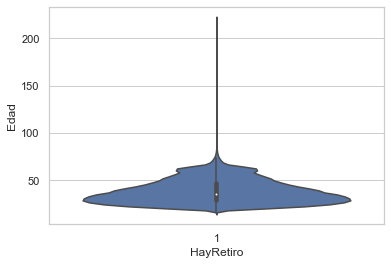

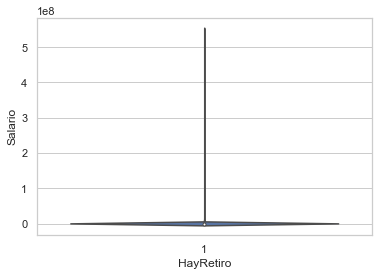

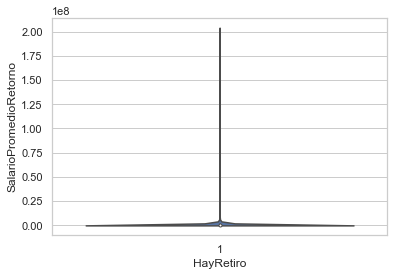

In [12]:
sns.violinplot(x=df_raw["HayRetiro"], y=df_raw["Edad"])
plt.show()
sns.violinplot(x=df_raw["HayRetiro"], y=df_raw["Salario"])
plt.show()
sns.violinplot(x=df_raw["HayRetiro"], y=df_raw["SalarioPromedioRetorno"])
plt.show()

In [13]:
# Se descartan filas y columnas innecesarias
X = df_raw.copy()
# Se necesitan edad, salarios edad, 'salario''SalarioPromedioRetorno', 'fecha'
X.drop(['Afiliado','EstadoCivil','FechaRetorno','FechaUltimoAporte'], axis=1, inplace=True)
X.drop(['Reduccion', '%Reduccion'], axis=1, inplace=True)

# Limpiamos datos de salarios y edad extraños
# Se borran 18 registros con edades > 100 se asumen como anomalias.
X = X.drop(X[X['Edad']>100].index)

# Se borra salario menor o igual que 0
# Se borran salarios menores o iguales 0 porque son personas desempleadas desde hace mucho tiempo que aprovecharon para retirar.
# Son 17117 y 15 salario < a 00 anomalias.
X = X.drop(X[X['Salario']<0].index)
X = X.reset_index(drop=True)

df_raw = X.copy()
df_raw.head(10)
## Siguen quedando salario perdidos

Periodo  Edad    RangoEdad Genero EstCiv  HayRetiro TipoRetiro  \
0 2020-09-30    90  Entre59y100      F   SOLT          1          E   
1 2020-07-31    90  Entre59y100      F   SOLT          1          E   
2 2021-03-31    89  Entre59y100      M  CASAD          1          E   
3 2021-03-31    88  Entre59y100      F   SOLT          1          E   
4 2021-04-30    89  Entre59y100      M  VIUDO          1          E   
5 2021-03-31    88  Entre59y100      M   SOLT          1          E   
6 2020-09-30    87  Entre59y100      F  DIVOR          1          E   
7 2021-04-30    87  Entre59y100      M  DIVOR          1          E   
8 2020-03-31    86  Entre59y100      F  CASAD          1          E   
9 2020-05-31    86  Entre59y100      M  CASAD          1          R   

       Salario  RangoSalario  SalarioPromedioRetorno  RangoSalarioRetorno  \
0     3133.333             1                0.000000                    0   
1        0.000             1                0.000000                    0   
2        0.000             1                0.000000                    0   
3        0.000             1                0.000000                    0   
4        0.000             1                0.000000                    0   
5        0.000             1                0.000000                    0   
6   470799.995             2           470733.333000                    2   
7        0.000             1                0.000000                    0   
8  4666333.287             6                0.000000                    0   
9   935700.000             3           531648.484909                    2   

   TuvoReduccion  HayAportes  Pensionado  Difunto  MesDesempleadoAntesRetorno  \
0              1           0           1        0                           7   
1              0           0           1        0                           9   
2              0           0           1        0                           1   
3              0           0           1        0                           1   
4              0           0           0        0                           0   
5              0           0           1        0                           1   
6              1           2           1        0                           6   
7              0           0           1        0                           0   
8              1           0           1        1                          13   
9              1          10           1        0                           1   

   MesesDesempleado  MesesTrancurridos  Desempleado  DiferenciaBrechas  
0                 7                  7            0                  1  
1                 9                  9            0                  1  
2                 1                  1            0                  1  
3                 1                  1            0                  1  
4                 0                  0            0                  1  
5                 1                  1            0                  1  
6                 0                  7            0                  0  
7                 0                  0            0                  1  
8                13                 13            0                  6  
9                 1                 11            0                  1

Dataset has **7043 observations** and **21 features**

In [14]:
df_raw.columns

Index(['Periodo', 'Edad', 'RangoEdad', 'Genero', 'EstCiv', 'HayRetiro',
       'TipoRetiro', 'Salario', 'RangoSalario', 'SalarioPromedioRetorno',
       'RangoSalarioRetorno', 'TuvoReduccion', 'HayAportes', 'Pensionado',
       'Difunto', 'MesDesempleadoAntesRetorno', 'MesesDesempleado',
       'MesesTrancurridos', 'Desempleado', 'DiferenciaBrechas'],
      dtype='object')

In [15]:
#Sustituir valores nulos con 0
df_raw.fillna(0, inplace=True)

In [16]:
df_raw.head().T

0                    1  \
Periodo                     2020-09-30 00:00:00  2020-07-31 00:00:00   
Edad                                         90                   90   
RangoEdad                           Entre59y100          Entre59y100   
Genero                                        F                    F   
EstCiv                                     SOLT                 SOLT   
HayRetiro                                     1                    1   
TipoRetiro                                    E                    E   
Salario                                 3133.33                    0   
RangoSalario                                  1                    1   
SalarioPromedioRetorno                        0                    0   
RangoSalarioRetorno                           0                    0   
TuvoReduccion                                 1                    0   
HayAportes                                    0                    0   
Pensionado                                    1                    1   
Difunto                                       0                    0   
MesDesempleadoAntesRetorno                    7                    9   
MesesDesempleado                              7                    9   
MesesTrancurridos                             7                    9   
Desempleado                                   0                    0   
DiferenciaBrechas                             1                    1   

                                              2                    3  \
Periodo                     2021-03-31 00:00:00  2021-03-31 00:00:00   
Edad                                         89                   88   
RangoEdad                           Entre59y100          Entre59y100   
Genero                                        M                    F   
EstCiv                                    CASAD                 SOLT   
HayRetiro                                     1                    1   
TipoRetiro                                    E                    E   
Salario                                       0                    0   
RangoSalario                                  1                    1   
SalarioPromedioRetorno                        0                    0   
RangoSalarioRetorno                           0                    0   
TuvoReduccion                                 0                    0   
HayAportes                                    0                    0   
Pensionado                                    1                    1   
Difunto                                       0                    0   
MesDesempleadoAntesRetorno                    1                    1   
MesesDesempleado                              1                    1   
MesesTrancurridos                             1                    1   
Desempleado                                   0                    0   
DiferenciaBrechas                             1                    1   

                                              4  
Periodo                     2021-04-30 00:00:00  
Edad                                         89  
RangoEdad                           Entre59y100  
Genero                                        M  
EstCiv                                    VIUDO  
HayRetiro                                     1  
TipoRetiro                                    E  
Salario                                       0  
RangoSalario                                  1  
SalarioPromedioRetorno                        0  
RangoSalarioRetorno                           0  
TuvoReduccion                                 0  
HayAportes                                    0  
Pensionado                                    0  
Difunto                                       0  
MesDesempleadoAntesRetorno                    0  
MesesDesempleado                              0  
MesesTrancurridos                             0  
Desempleado                                   0  
DiferenciaBrechas   

In [17]:
df_raw.rename(columns={'EstCiv':'EstadoCivil'
                       ,'DiferenciaBrechas':'Brecha'
                       ,'MesDesempleadoAntesRetorno':'InactivoPostRetiro'
                       ,'MesesDesempleado':'InactivoPostUltAporte'
                      }
              ,inplace=True)

In [18]:
# Duplicate value check
df_raw.duplicated().any()

True

In [19]:
# Exploring data types of each feature
df_raw.dtypes

Periodo                   datetime64[ns]
Edad                               int64
RangoEdad                         object
Genero                            object
EstadoCivil                       object
HayRetiro                          int64
TipoRetiro                        object
Salario                          float64
RangoSalario                       int64
SalarioPromedioRetorno           float64
RangoSalarioRetorno                int64
TuvoReduccion                      int64
HayAportes                         int64
Pensionado                         int64
Difunto                            int64
InactivoPostRetiro                 int32
InactivoPostUltAporte              int32
MesesTrancurridos                  int64
Desempleado                        int64
Brecha                             int64
dtype: object

Necesitamos cambiar el nombre de las columnas al formato adecuado y debemos transformar columnas como RangoEdad, genero, etc., a un formato similar para análisis futuros. 

### Transformación y cambio de nombre de datos

Aquí, cambiaremos el nombre de algunas columnas y modificaremos los registros con el formato adecuado para su posterior análisis.

In [20]:
df_raw2=df_raw.copy()
df_raw['RangoSalario'] = df_raw.RangoSalario.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
df_raw['RangoSalarioRetorno'] = df_raw.RangoSalarioRetorno.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
df_raw['TuvoReduccion'] = df_raw.TuvoReduccion.map({1:'Si',0:'No'})
df_raw['Pensionado'] = df_raw.Pensionado.map({1:'Si',0:'No'})
df_raw['Desempleado'] = df_raw.Desempleado.map({1:'Si',0:'No'})
df_raw['Difunto'] = df_raw.Difunto.map({1:'Si',0:'No'})

In [21]:
cat_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","TuvoReduccion"]

num_cols = ["HayAportes","Brecha","InactivoPostUltAporte","InactivoPostRetiro", "HayRetiros"]

target_col = 'Desempleado'

# spliting categorical columns into Nominal and Binary columns

#nominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","HayAportes",
#                 "Brecha","InactivoPostUltAporte","InactivoPostRetiro"]

nominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno"]

binary_cols = ["Pensionado","TuvoReduccion", "Difunto"]

monto_cols = ["Salario","SalarioPromedioRetorno","Edad"]

In [22]:
def Generate_bar_graph(x, y, x_title, y_title, chart_title,color=plotColor):
    """ Based on x and y value, generate bar graph """
    
    fig, ax = plt.subplots()
    ax.bar(range(len(x))
       , y
       , width = 0.75
       , color=color
        , alpha = 0.6) 

    # stopping alphabetical sorting of graph
    plt.xticks(range(len(x)),x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title,fontsize=13)
    plt.ylabel(y_title,fontsize=13)
    plt.grid(b=False)
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    
    # Visible x - axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
    # Display label for each plot
    for i,v in (enumerate(y)):
        ax.text(i
                ,v+0.05
                ,str(round((v*100),2))+'%'
                ,fontsize=13
                ,ha='center')
    
    plt.show()

### Distribución de variables categóricas y binarias por objetivo

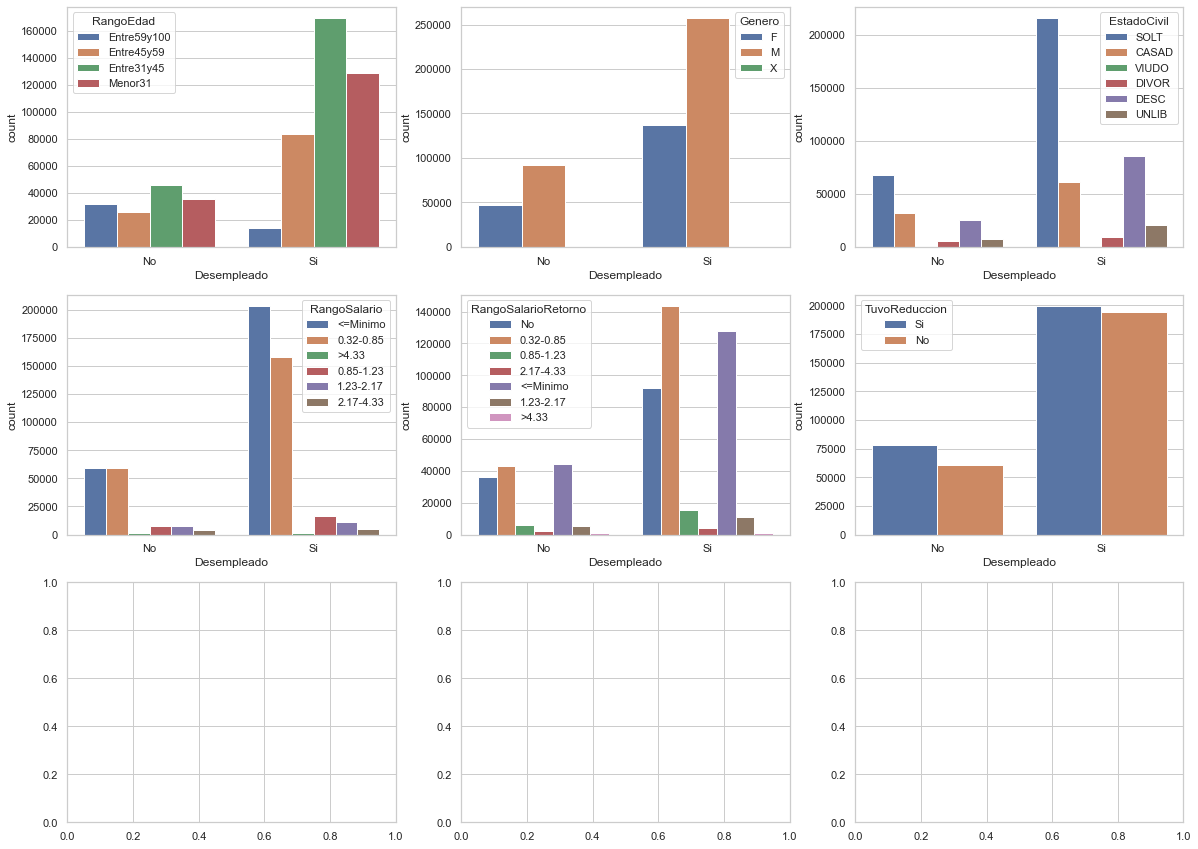

In [23]:
df_temp = df_raw.copy()
fig , ax = plt.subplots(3,3,figsize=(20,15))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,cat_cols):
    sns.countplot(x=df_temp[target_col],hue=df_temp[col],ax=axis)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder=LabelEncoder()
for cols in cat_cols:
    df_temp.loc[:,cols] = LabelEncoder().fit_transform(df_temp.loc[:,cols])


**De los graficos de arriba se puede deducir que los desempleados or COVID**

> * La mayoria fueron mujeres y de igual froma la recuperación de empleo se dio en la misma proporción.
> * Los que retiraron y quedaron desempleados, la mayoria estuvieron entre 31 y 45, seguidos muy de cerca por los menores de 31, y luego lo de 45 a 59. 
> * Solteros y estado desconocidos fueron los mayores que retiraron y quedaron desempleados.
> * Un grupo de lo sque retiraron se pensionaron, o estaban pensionados.
> * Con respecto a la parte salarial, la mayoria de los identificados ganaban o reportaban menos del salario mínimo, segudo por el segmento que ganaba menos de 850 mil.
> * De los que regresaron a sus empleos o solo tuvieron reducción de jornada, muchos quedaron sin salario y un alto porcentaje quedo en la rama de ganar salario por menos del mínimo.
> * De los que tuvieron reducción o suspensión pocos quedan con trabajo.
> * Se muestra una parte de personas que se pensionaron. Para nuestro estudio no tiene valor por que la muestra es poco representativa y no es parte del alcance. Se eliminaran del dataset.


In [24]:
#print(df_raw.groupby(['RangoSalario','Genero']).count())

<AxesSubplot:xlabel='RangoSalario', ylabel='count'>

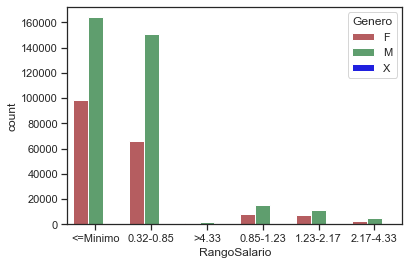

In [25]:
sns.countplot(data=df_raw, x='RangoSalario', hue='Genero', palette=['r','g','blue'])

Confirmando los graficos anteriores, se puede apreciar como los hombres fueron los principales afectados, y particularmente de este gráfico se puede deducir:

* El salario que más predominaba era el rango entre 320 mil y 850 mil. 
* Pero muy de cerca estaba el mínimo o menos.
* Es importante notar como en salario menores o iguales al mínimo las mujeres tenían una representación importante con respecto a los otros rangos.

<AxesSubplot:xlabel='RangoSalarioRetorno', ylabel='count'>

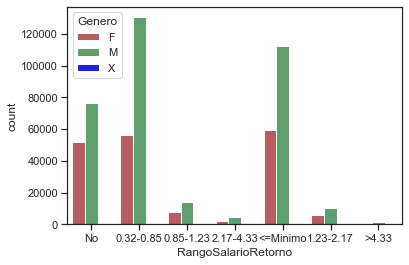

In [26]:
#sns.histplot(data=df_raw, x='Genero', hue='RangoSalarioRetorno')
sns.countplot(data=df_raw, x='RangoSalarioRetorno', hue='Genero', palette=['r','g','blue'])

En este gráfico podemos ver como se comportó la variable de salario de retorno, aunque esto no garantiza que sigan empleados.

* Un alto porcentaje tanto de hombres como mujeres no retornó a un empleo. 
* Otro grupo importante de personas retorno por un salario mínimo o inferior.


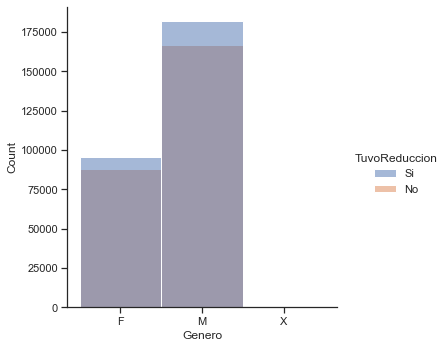

In [27]:
sns.displot(data=df_raw, x='Genero', hue='TuvoReduccion')

Se puede ver que hay casi el doble del tamaño de la muestra de hombres en comparación con las mujeres en el conjunto de datos. Esto no solo se aprecia en el gráfico anterior, sino tambien en el de desempleo por COVID. Si bien esto puede no afectar demasiado las predicciones, la distribución del ingreso sí puede hacerlo. Como se aprecia el porcentaje de hombres que ganan tienen salario inferiores al mínimo es mucho mayor que el porcentaje de hombres que ganan la misma cantidad. Además podemos ver, como el porcentaje de mujeres sin salario es muy similar al de los hombres. Lo que si se evidencia es que proporcionalmente mayor cantidad de mujeres quedo sin salario. 
Este será sin duda un factor significativo y debería ser una característica considerada en el modelo de predicción.

<AxesSubplot:xlabel='RangoSalario', ylabel='count'>

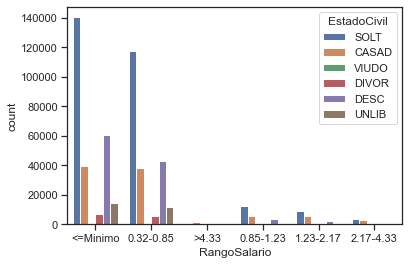

In [28]:
sns.countplot(data=df_raw, x='RangoSalario', hue='EstadoCivil')

<AxesSubplot:xlabel='RangoSalarioRetorno', ylabel='count'>

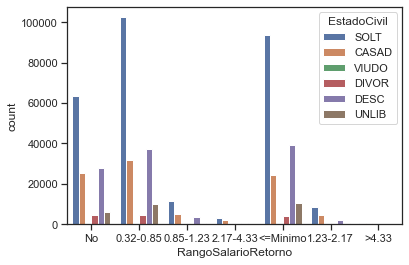

In [29]:
sns.countplot(data=df_raw, x='RangoSalarioRetorno', hue='EstadoCivil')

Text(0.5, 1.0, 'Distribución por edad')

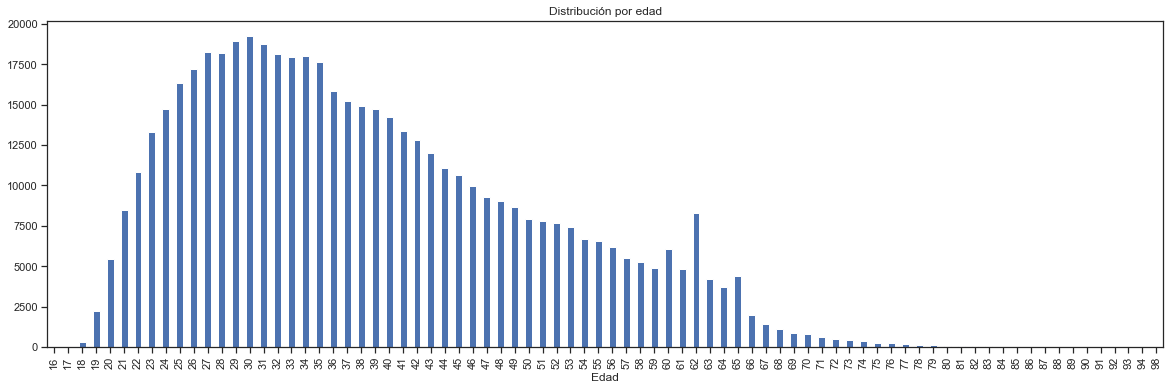

In [30]:
fig = plt.figure(figsize = (20,6))
GrupoEdad = df_temp.groupby(['Edad']).size()
GrupoEdad.plot.bar()
plt.title("Distribución por edad")

La característica de edad describe la edad del individuo. Primero se muestra la distribución de edad de nuestro conjunto de datos. Las edades oscilan, mayormente, entre los 18 y los 72 años de edad, con la mayoría de las entradas entre las edades de 23 y 50 años.

In [31]:
# Se descartan la filas de pensionados ya que para el estudio no se requieren
X = df_raw.copy()
X = X.drop(X[X['Pensionado']=='Si'].index)
X = X.drop(X[X['Difunto']=='Si'].index)
X.drop(['Pensionado'], axis=1, inplace=True)
X.drop(['Difunto'], axis=1, inplace=True)
X = X.reset_index(drop=True)
df_raw = X.copy()
#X = df_raw1.copy()
#X = X.drop(X[X['Pensionado']=='Si'].index)
#X.drop(['Pensionado'], axis=1, inplace=True)
#X = X.reset_index(drop=True)
#df_raw1 = X.copy()
X = df_raw2.copy()
X = X.drop(X[X['Pensionado']==1].index)
X = X.drop(X[X['Difunto']==1].index)
X.drop(['Pensionado'], axis=1, inplace=True)
X.drop(['Difunto'], axis=1, inplace=True)
X = X.reset_index(drop=True)
df_raw2 = X.copy()

Agrupamos los datos que necesitaremos en nuestro análisis.

### Realizaremos un analisis para ver el comportamiento por mes.

In [32]:
'''
#df_raw2['Periodo'] = pd.to_datetime(df_raw2['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
#print(df_raw2.groupby(['Periodo','Desempleado']).count())
df_desempleados = df_raw2[df_raw2['Desempleado'] == 1]
#df_desempleados
group1 = df_desempleados.groupby(by = ['Periodo'])['Desempleado']
data1 = group1.agg(['sum']).reset_index()
data1.rename(columns={'sum' : 'cantidad'},inplace=True)
fig,ax = plt.subplots(figsize = (30,13))
sns.barplot(x = "Periodo", y = "cantidad", data = data1)
ax.set_title('Afiliados que retiraron FCL por mes')
ax.title.set_fontsize(26)
ax.title.set_fontweight('bold')
#ax.set_yticklabels(data1.cantidad, fontsize = 20)
ax.set_xticklabels(data1.Periodo, rotation= 65, horizontalalignment = 'right',fontsize = 20)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
'''

'\n#df_raw2[\'Periodo\'] = pd.to_datetime(df_raw2[\'Periodo\']).apply(lambda x:x.strftime(\'%Y/%m\'))\n#print(df_raw2.groupby([\'Periodo\',\'Desempleado\']).count())\ndf_desempleados = df_raw2[df_raw2[\'Desempleado\'] == 1]\n#df_desempleados\ngroup1 = df_desempleados.groupby(by = [\'Periodo\'])[\'Desempleado\']\ndata1 = group1.agg([\'sum\']).reset_index()\ndata1.rename(columns={\'sum\' : \'cantidad\'},inplace=True)\nfig,ax = plt.subplots(figsize = (30,13))\nsns.barplot(x = "Periodo", y = "cantidad", data = data1)\nax.set_title(\'Afiliados que retiraron FCL por mes\')\nax.title.set_fontsize(26)\nax.title.set_fontweight(\'bold\')\n#ax.set_yticklabels(data1.cantidad, fontsize = 20)\nax.set_xticklabels(data1.Periodo, rotation= 65, horizontalalignment = \'right\',fontsize = 20)\nax.xaxis.label.set_fontsize(20)\nax.yaxis.label.set_fontsize(20)\n'

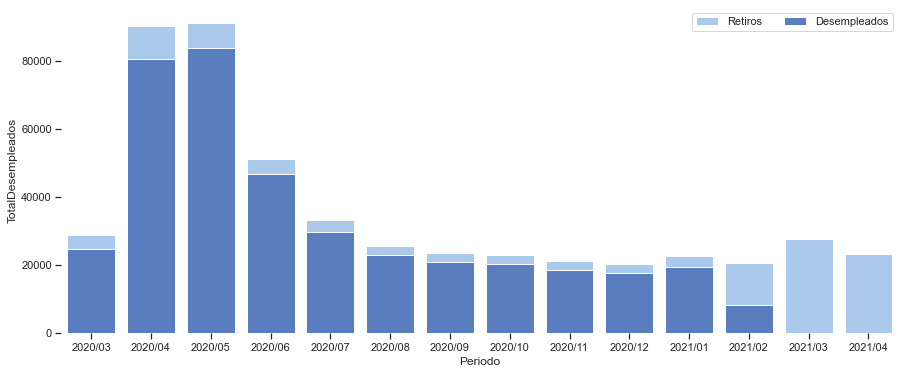

In [33]:
#result10 = df_raw2.groupby(["Periodo", "HayRetiros"])["HayRetiros"].count().reset_index(name="TotalRetiros")
#print(result10)
result11 = df_raw2.groupby(["Periodo", "Desempleado"])["Desempleado"].count().reset_index(name="TotalDesempleados")
#print(result11)
result11 = result11[result11.Desempleado == 1]
result11['Periodo'] = pd.to_datetime(result11['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
result12 = df_raw2.groupby(["Periodo"])["Periodo"].count().reset_index(name="TotalAfiliados")
result12['Periodo'] = pd.to_datetime(result12['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
#print(result12)
result13 = pd.merge(result11,result12,left_on='Periodo', right_on='Periodo', how='outer')
result13.sort_values(by=['Periodo'], inplace=True)
#print(result13)
f, ax = plt.subplots(figsize = (15,6))
sns.set_color_codes('pastel')
sns.barplot(y = 'TotalAfiliados', x = 'Periodo', data = result13, label = 'Retiros', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(y = 'TotalDesempleados', x = 'Periodo', data = result13, label = 'Desempleados', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'upper right')
sns.despine(left = True, bottom = True)
plt.show()

Se aprecia que los picos e retiros se dieron al inicio de la pandemia, entre abril y mayo, luego ha venido a la baja. sin embargo, se nota un repunte en marzo de este año.

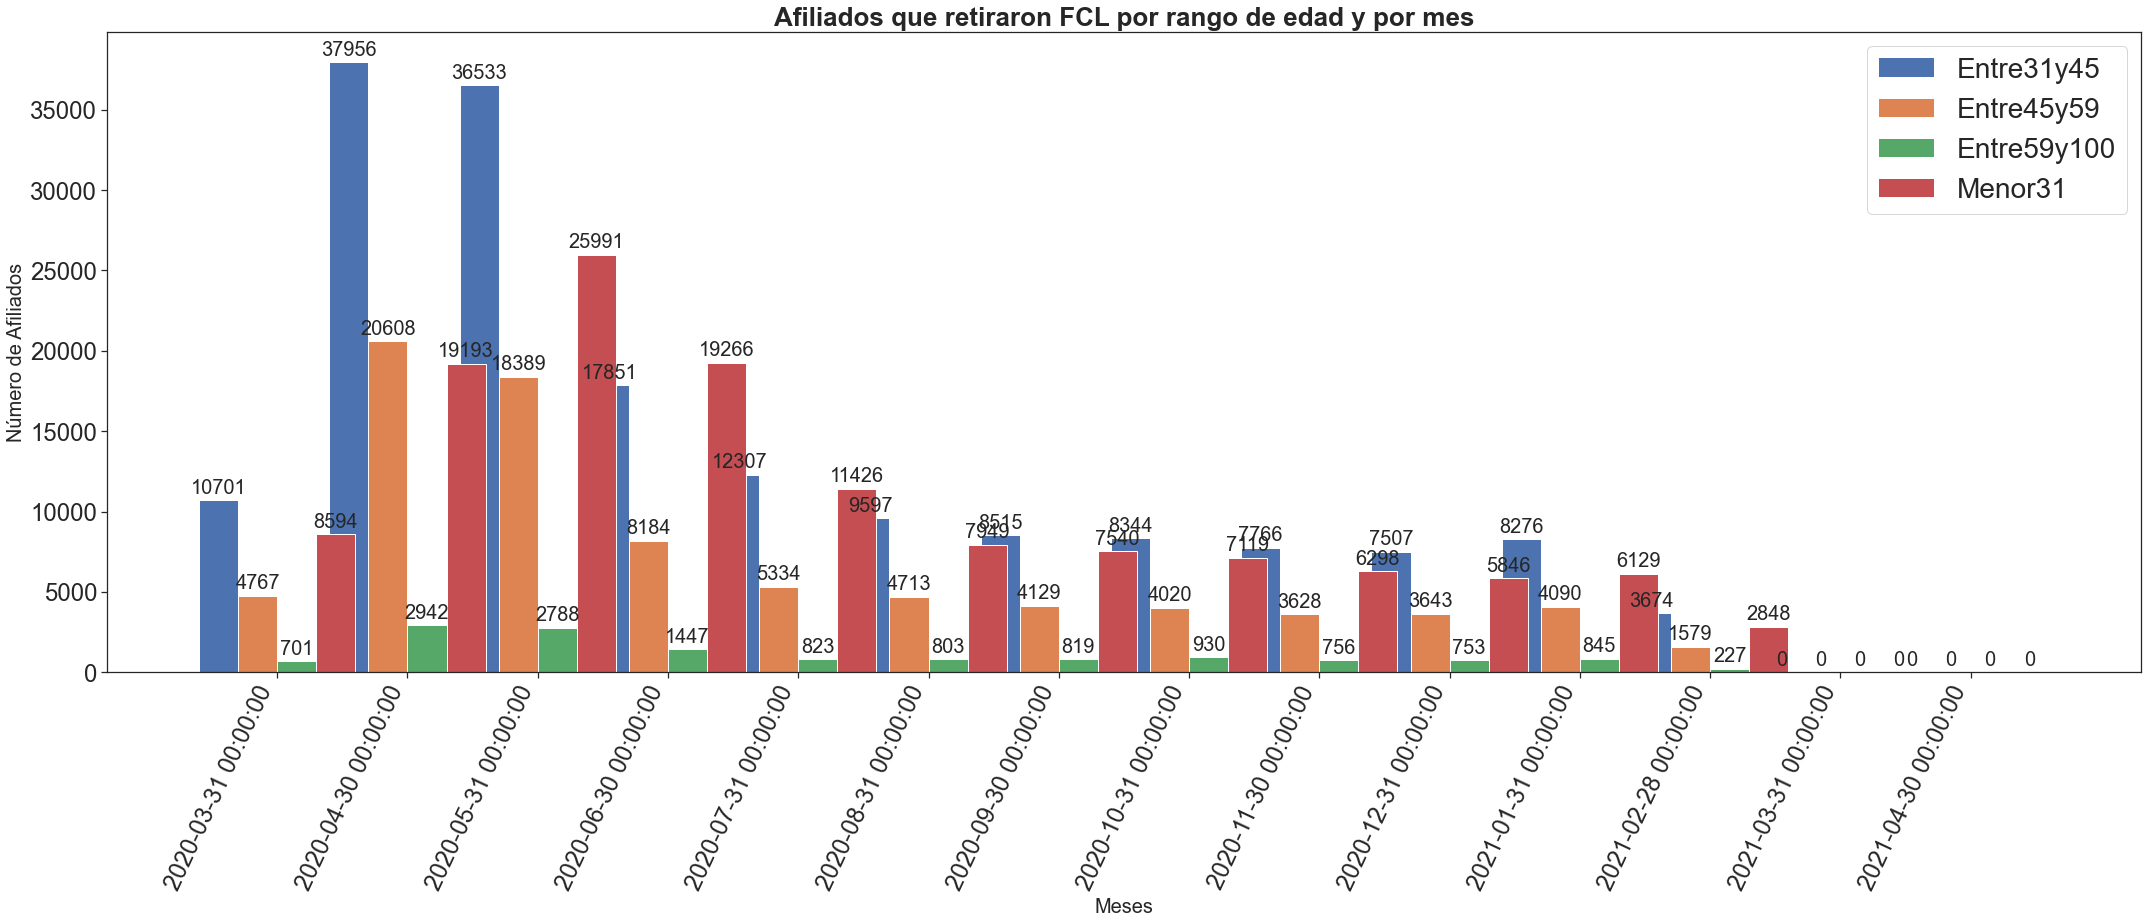

In [34]:
#df_raw2['Periodo'] = pd.to_datetime(df_raw2['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
group1 = df_raw2.groupby(by = ['Periodo','RangoEdad'])['Desempleado']
data1 = group1.agg(['sum']).reset_index()
data1.rename(columns={'sum' : 'cantidad'},inplace=True)

fig,ax = plt.subplots(figsize = (30,13))

periodos = list(data1['Periodo'].drop_duplicates())

x = np.arange(len(periodos))
width = 0.3

RangoEdades = list(data1['RangoEdad'].drop_duplicates())
l = len(RangoEdades)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize = 20)

for i in range(l):
  pos = -(l+1)/2 + i+1
  rect = ax.bar(x + pos*width,data1[data1['RangoEdad'] == RangoEdades[i]].cantidad.astype(int),width)
  autolabel(rect)

ax.set_xticks(x)
ax.set_xticklabels(periodos, rotation= 65, horizontalalignment = 'right')

ax.set_title('Afiliados que retiraron FCL por rango de edad y por mes')
ax.title.set_fontsize(26)
ax.title.set_fontweight('bold')
ax.set_xlabel('Meses')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Número de Afiliados')
ax.yaxis.label.set_fontsize(20)

ax.legend(labels = RangoEdades,fontsize = 28,loc = 1)

ax.tick_params(axis='both', which='major', labelsize=24)
#ax.set_xticklabels(periodos, rotation= 65, horizontalalignment = 'right')

df_temp = fig.tight_layout()

#### Analisis entre rango de edad y mes.

Este gráfico nos muestra como en todos los meses la mayoria de afectados siempre han estado entre el rango de 31 y 45 y luego por los menores de 31 años. Y ahora en el mes de marzo se presenta una nueva escalada en los desempleados.

In [35]:
df_temp = df_raw2.copy()
df_temp['RangoSalario'] = df_temp.RangoSalario.map({0:'No',1:'Sub',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
df_temp['RangoSalarioRetorno'] = df_temp.RangoSalarioRetorno.map({0:'No',1:'Sub',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})

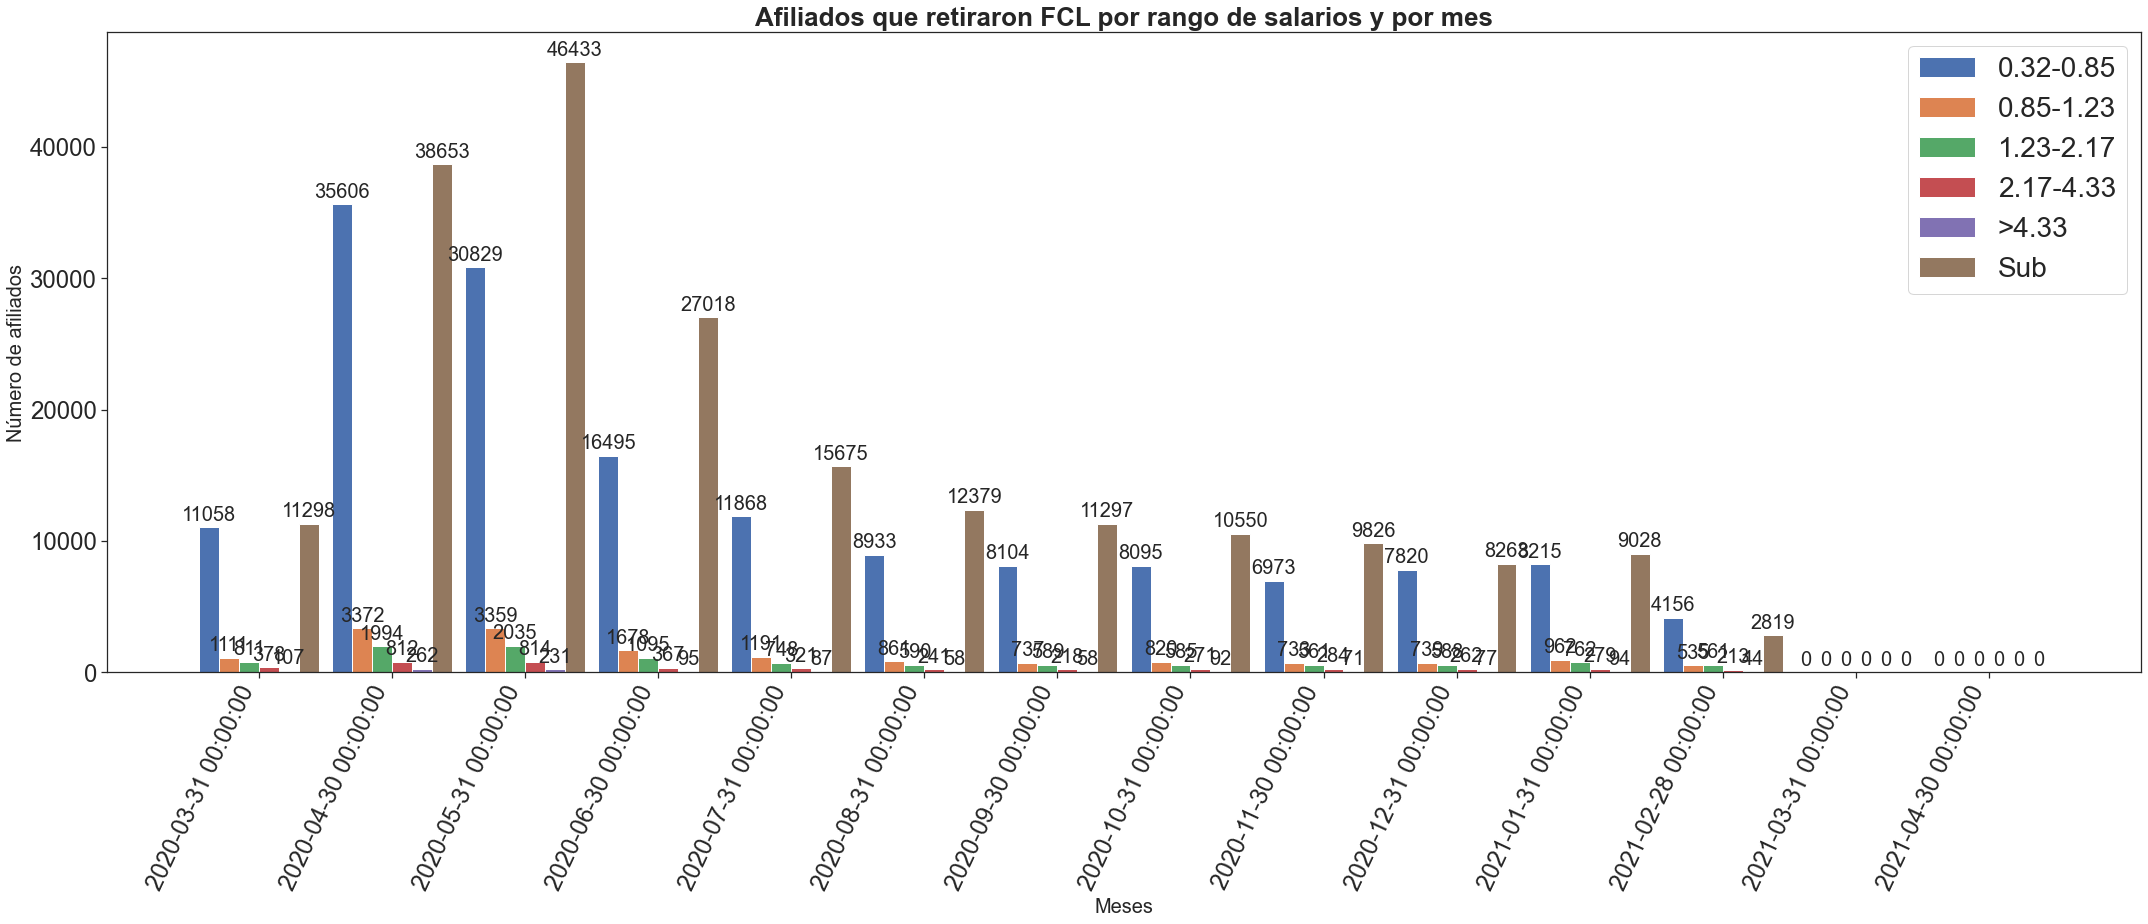

In [36]:
group1 = df_temp.groupby(by = ['Periodo','RangoSalario'])['Desempleado']
data1 = group1.agg(['sum']).reset_index()
data1.rename(columns={'sum' : 'cantidad'},inplace=True)

fig,ax = plt.subplots(figsize = (30,13))

periodos = list(data1['Periodo'].drop_duplicates())

x = np.arange(len(periodos))
width = 0.15

RangoSalarios = list(data1['RangoSalario'].drop_duplicates())
l = len(RangoSalarios)
for i in range(l):
    pos = -(l+1)/2 + i+1
    #print(x + pos*width,data1[data1['RangoSalario'] == RangoSalarios[i]].cantidad.astype(int),width)
    rect = ax.bar(x + pos*width,data1[data1['RangoSalario'] == RangoSalarios[i]].cantidad.astype(int),width)
    autolabel(rect)

ax.set_xticks(x)
ax.set_xticklabels(periodos, rotation= 65, horizontalalignment = 'right')

ax.set_title('Afiliados que retiraron FCL por rango de salarios y por mes')
ax.title.set_fontsize(26)
ax.title.set_fontweight('bold')
ax.set_xlabel('Meses')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Número de afiliados')
ax.yaxis.label.set_fontsize(20)

ax.legend(labels = RangoSalarios,fontsize = 28,loc = 1)

ax.tick_params(axis='both', which='major', labelsize=24)

fig.tight_layout()

#### Analisis entre rango de salario y mes.

Este gráfico muestra como durante todos los meses predominado los salarios inferioresa los 850000, como principales afectados.

In [48]:
PeriodosDistintos = df_temp.drop_duplicates(subset = ["Periodo"])
PeriodosDistintos['Periodo'] = pd.to_datetime(PeriodosDistintos['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
RangoSalarioDistintos = df_temp.drop_duplicates(subset = ["RangoSalarioRetorno"])

<ipython-input-48-5f2d1ba1969c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodosDistintos['Periodo'] = pd.to_datetime(PeriodosDistintos['Periodo']).apply(lambda x:x.strftime('%Y/%m'))


0     2021/04
1     2020/09
3     2020/12
4     2020/05
6     2020/07
10    2021/02
12    2020/10
13    2020/03
16    2020/04
19    2020/11
20    2021/03
24    2021/01
28    2020/06
31    2020/08
Name: Periodo, dtype: object

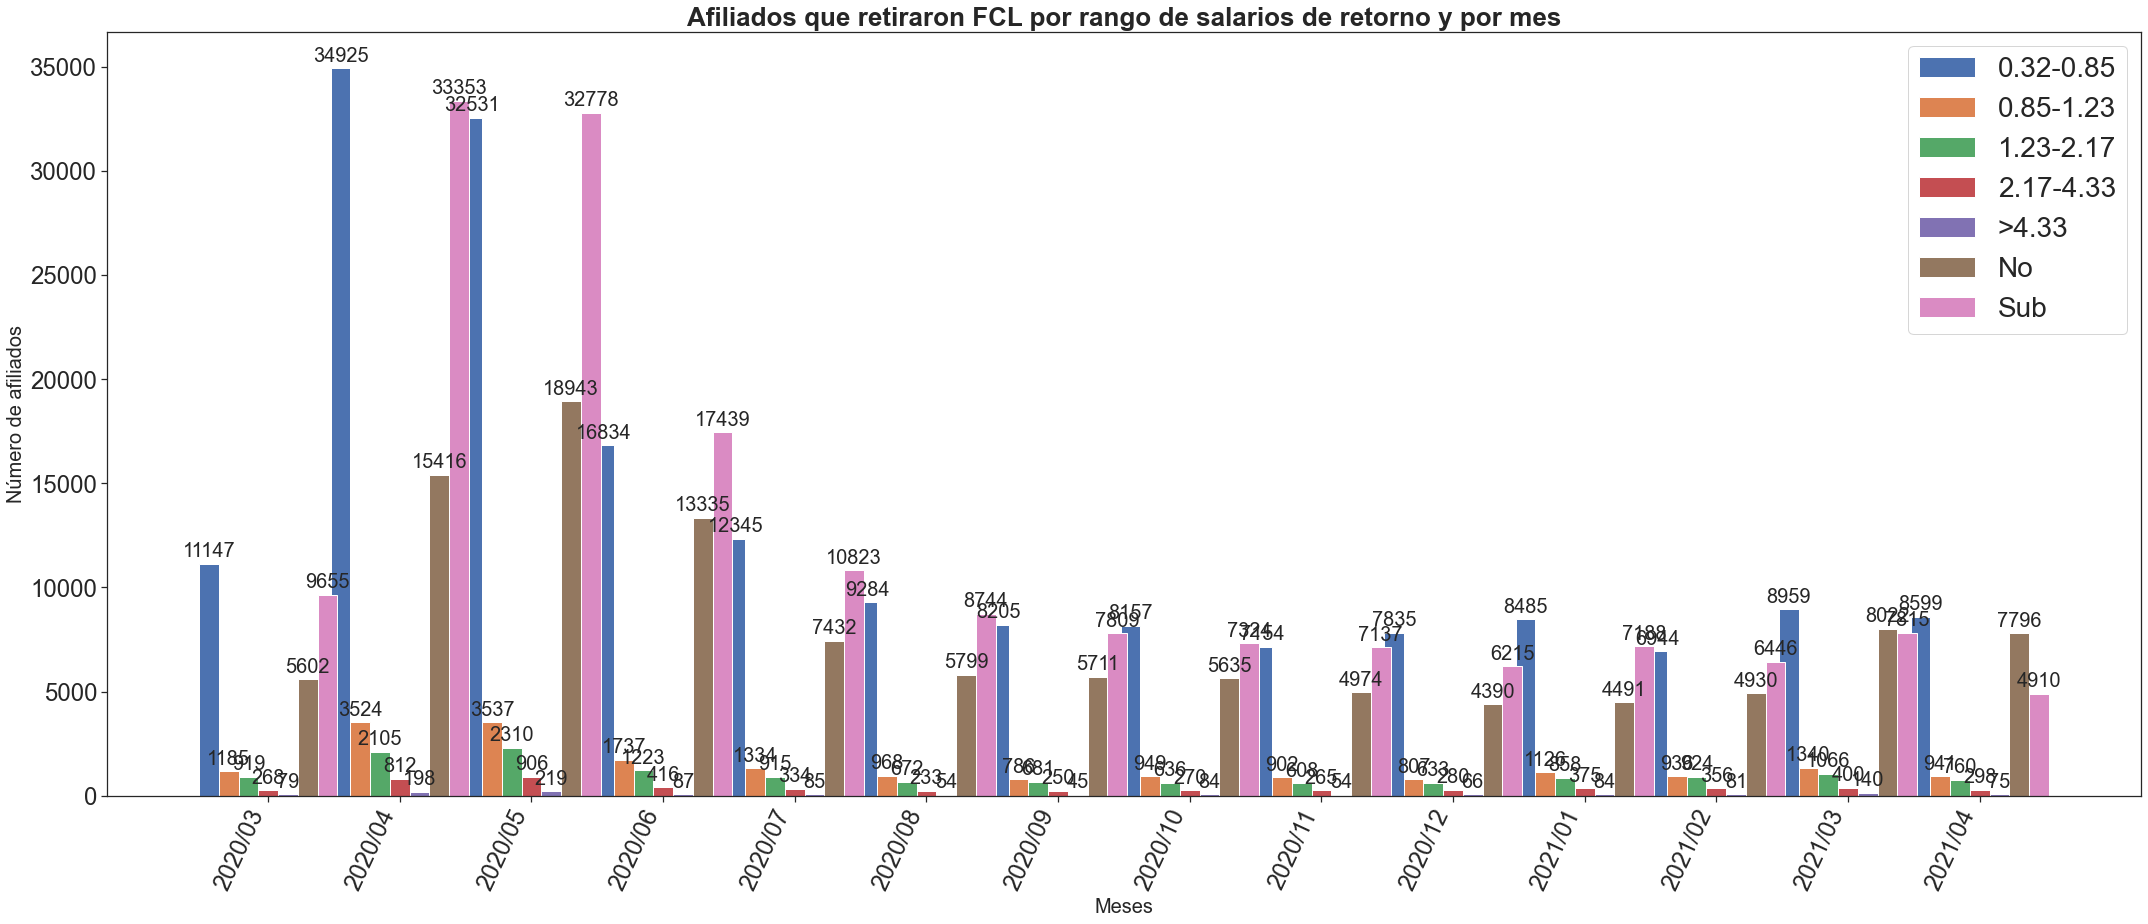

In [62]:
df_temp['Periodo'] = pd.to_datetime(df_temp['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
group1 = df_temp.groupby(by = ['Periodo','RangoSalarioRetorno'])['Desempleado']
data1 = group1.agg(['count']).reset_index()
data1.rename(columns={'count' : 'cantidad'},inplace=True)
'''
new_row = {'Periodo':'2021/03', 'RangoSalarioRetorno':'Sub', 'cantidad':0}
data1 = data1.append(new_row, ignore_index=True)
new_row = {'Periodo':'2021/03', 'RangoSalarioRetorno':'0.32-0.85', 'cantidad':0}
data1 = data1.append(new_row, ignore_index=True)
new_row = {'Periodo':'2021/03', 'RangoSalarioRetorno':'0.85-1.23', 'cantidad':0}
data1 = data1.append(new_row, ignore_index=True)
new_row = {'Periodo':'2021/03', 'RangoSalarioRetorno':'1.23-2.17', 'cantidad':0}
data1 = data1.append(new_row, ignore_index=True)
new_row = {'Periodo':'2021/03', 'RangoSalarioRetorno':'2.17-4.33', 'cantidad':0}
data1 = data1.append(new_row, ignore_index=True)
new_row = {'Periodo':'2021/03', 'RangoSalarioRetorno':'>4.33', 'cantidad':0}
data1 = data1.append(new_row, ignore_index=True)
'''
#print(data1)

for per in PeriodosDistintos["Periodo"]:
    for ran in RangoSalarioDistintos["RangoSalarioRetorno"]:
        buscar = data1.loc[(data1['Periodo'] == per) & (data1['RangoSalarioRetorno'] == ran)]
        if buscar.size <= 0:
            print(buscar)
            print("\nNone of thses values exists in Dataframe")
            new_row = {'Periodo':per, 'RangoSalarioRetorno':ran, 'cantidad':0}
            data1 = data1.append(new_row, ignore_index=True)

fig,ax = plt.subplots(figsize = (30,13))

periodos = list(data1['Periodo'].drop_duplicates())
x = np.arange(len(periodos))
width = 0.15

RangoSalariosRetorno = list(data1['RangoSalarioRetorno'].drop_duplicates())
l = len(RangoSalariosRetorno)
#print(range(l))
for i in range(l):
    #print(i,RangoSalariosRetorno[i])
    #print(data1[data1['RangoSalarioRetorno'] == RangoSalariosRetorno[i]].cantidad)
    pos = -(l+1)/2 + i+1
    #print(x + pos*width,data1[data1['RangoSalario'] == RangoSalarios[i]].cantidad.astype(int),width)
    rect = ax.bar(x + pos*width,data1[data1['RangoSalarioRetorno'] == RangoSalariosRetorno[i]].cantidad.astype(int),width)
    autolabel(rect)

ax.set_xticks(x)
ax.set_xticklabels(periodos, rotation= 65, horizontalalignment = 'right')

ax.set_title('Afiliados que retiraron FCL por rango de salarios de retorno y por mes')
ax.title.set_fontsize(26)
ax.title.set_fontweight('bold')
ax.set_xlabel('Meses')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Número de afiliados')
ax.yaxis.label.set_fontsize(20)

ax.legend(labels = RangoSalariosRetorno,fontsize = 28,loc = 1)

ax.tick_params(axis='both', which='major', labelsize=24)

fig.tight_layout()


## No estoy seguro de interpretarlo bien

In [63]:
# Grafico de cambios salariales.
def Distribucion_Numerica(df_cal1,feature):
    """ Distribution de la variable numerica basado en la fuente"""
    fig = plt.figure(figsize=(15,4))
    
    plt.subplot(1,2,1)
    ax = sns.kdeplot(df_cal1[feature]
                     , color = 'g'
                     , shade = True)
    
    title_str = "Distribución original " +feature 
    plt.title(title_str)
    
    plt.subplot(1,2,2)
    ax = sns.kdeplot(df_cal1.loc[(df_cal1[target_col]=="Si"),feature]
                     , color = 'r'
                     , shade = True
                     , label='Desempleado', legend = True)
    ax = sns.kdeplot(df_cal1.loc[(df_cal1[target_col]=="No"),feature]
                     , color = 'b'
                     , shade = True
                     , label='No', legend = True)
    
    title_str = feature + " Distribución: Desempleado o no"
    plt.title(title_str)
    plt.legend()
    plt.show()

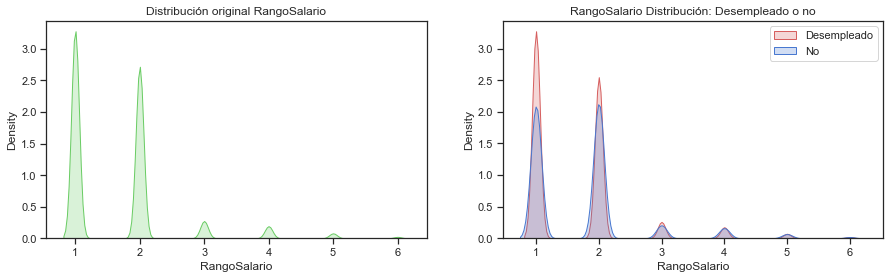

In [64]:
df_raw2['Desempleado'] = df_raw2.Desempleado.map({1:'Si',0:'No'})
Distribucion_Numerica(df_raw2,'RangoSalario')

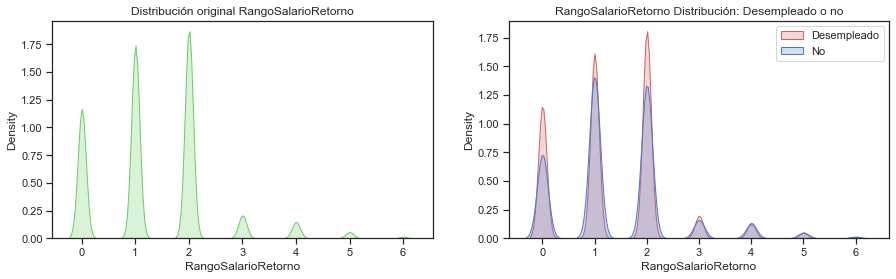

In [65]:
Distribucion_Numerica(df_raw2,'RangoSalarioRetorno')

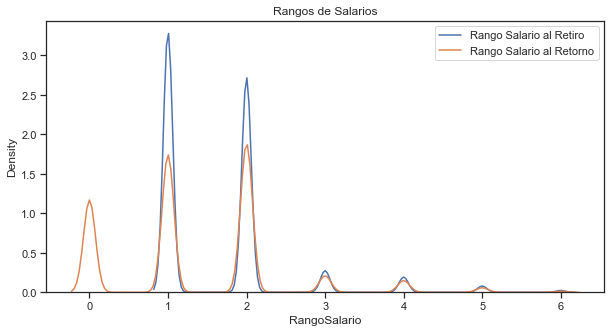

In [66]:
fig, (ax1) = plt.subplots(figsize=(10, 5))

ax1.set_title('Rangos de Salarios')
sns.kdeplot(df_raw2['RangoSalario'], ax=ax1, label='Rango Salario al Retiro')
sns.kdeplot(df_raw2['RangoSalarioRetorno'], ax=ax1, label='Rango Salario al Retorno')
plt.legend()
plt.show()

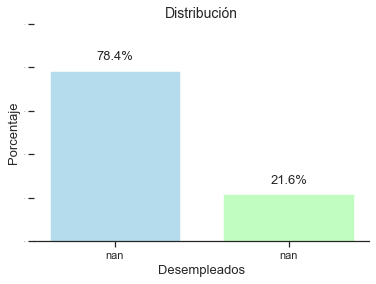

Si    0.784035
No    0.215965
Name: Desempleado, dtype: float64


In [67]:
# Balance de la variable de salida
#print(df_raw2.groupby(target_col).size() / len(df_raw2))
#sns.catplot(data=df_raw2,y=target_col, kind = 'count',height=2.6, aspect=1.5)

Tasa_Desempleado = df_raw2[target_col].value_counts() / df_raw2.shape[0]

Generate_bar_graph(Tasa_Desempleado.index.map({0:'No',1:"Si"})
                   , Tasa_Desempleado.values
                   , 'Desempleados'
                   , 'Porcentaje'
                   , 'Distribución')

print(Tasa_Desempleado)


### EDA (bivariante)

In [68]:
# se importa para evaluar la variables categoricas no ordinales-
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as multi

In [69]:
# Cuales pueden influir en el tipo de salario.
# cat_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","Pensionado","TuvoReduccion"]

# Influencia RangoEdad
x = df_temp['RangoEdad']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del rango de edad en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

# Influencia RangoEdad
x = df_temp['Genero']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del genero en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en FALSE donde se acepta la hipotesis, debe existir alguna influencia

# Influencia EstadoCivil
x = df_temp['EstadoCivil']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del Estado civil en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en FALSE donde se acepta la hipotesis, debe existir alguna influencia

# Influencia RangoSalario
x = df_temp['RangoSalario']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del rango salarial en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en FALSE donde se acepta la hipotesis, debe existir alguna influencia

Influencia del rango de edad en el status de desempleado
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
 Entre31y45  Entre45y59  -0.0014 0.7827 -0.0054  0.0026  False
 Entre31y45 Entre59y100  -0.0646  0.001 -0.0726 -0.0566   True
 Entre31y45     Menor31  -0.0039 0.0222 -0.0073 -0.0004   True
 Entre45y59 Entre59y100  -0.0632  0.001 -0.0715 -0.0549   True
 Entre45y59     Menor31  -0.0025 0.4241 -0.0066  0.0017  False
Entre59y100     Menor31   0.0607  0.001  0.0526  0.0688   True
--------------------------------------------------------------
Influencia del genero en el status de desempleado
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     F      M  -0.0067  0.001 -0.0096 -0.0039   True
     F      X  -0.1218 0.2371 -0.2979  0.0543  Fals

Se aprecia que hay varias línea sen true lo que puede implicar alguna correlación entre las variables

### Estadísticas descriptivas

### Distribucion de edad, salario y salario de retorno

In [70]:
# NO le veo valor agregado
df_raw2[monto_cols].describe(include='all')

Salario  SalarioPromedioRetorno           Edad
count  5.027120e+05            5.027120e+05  502712.000000
mean   4.320670e+05            3.780787e+05      37.097471
std    1.186103e+06            7.275952e+05      10.778512
min    0.000000e+00            0.000000e+00      16.000000
25%    1.785047e+05            7.853333e+04      29.000000
50%    3.175128e+05            2.890444e+05      35.000000
75%    4.629904e+05            4.415667e+05      44.000000
max    4.216667e+08            2.037982e+08      98.000000

#### Con base en el análisis descriptivo de columnas numéricas, el salario, el salario de retorno y la edad del afiliado el promedio es de 455457 colones, 289090 colones y 37 años, respectivamente

In [71]:
# Mean summary of customers (Churn vs Non churn)
suma_desempleado = df_raw.groupby('Desempleado')
print(suma_desempleado[monto_cols].mean())

                   Salario  SalarioPromedioRetorno       Edad
Desempleado                                                  
No           469878.467444           399597.668113  37.337871
Si           421651.728858           372151.219117  37.031253


In [72]:
def Outlier_boxplot(df, col):
    """ Display boxplot for given column """
    sns.boxplot(x=df[col])
    plt.show()

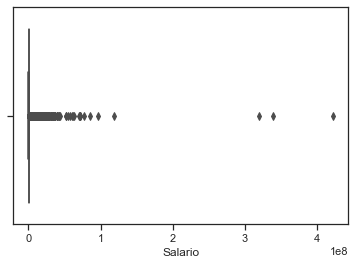

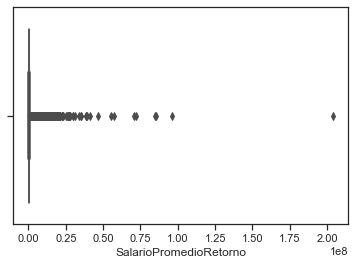

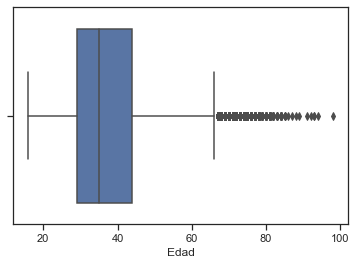

In [73]:
for i in monto_cols:
    Outlier_boxplot(df_raw2,i) #df_cal

El resultado muestra que los trabajadores que retiraron el FCL y que quedaron desempleados tenían un salario promedio mensual inferior a los que se quedaron. Y los que regresaron, lo hicieron por salarios similares en promedio.

Con respecto a la edad promedio no hay mucha diferencia

Comprobaremos la distribución de cada característica con la variable de destino.

### Se identificarán los salario anomalos.

In [102]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [1, 99])  #Antes 25 y 75
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
    return outliers

In [104]:
for i in monto_cols:
    detect_outlier((df_raw[i]))
    
print(detect_outlier((df_raw['Salario'])))
print(detect_outlier((df_raw['SalarioPromedioRetorno'])))

[9556733.238, 11855404.46, 31520733.333, 13802233.332999999, 70785933.333, 7267466.667, 11835266.667000001, 6987739.01, 6987739.01, 7650000.0, 6910589.29, 15174680.7, 15174680.7, 15174666.667000001, 7592133.333, 6971533.333, 15746333.175999999, 11942866.667000001, 7243200.0, 8600000.0, 7331938.73, 20111466.466, 13065000.0, 11634957.81, 28380933.333, 11234448.82, 13069799.869, 7124733.333, 7155321.08, 8769230.8, 10647866.56, 8991700.0, 7993666.667, 7993645.92, 10387492.3, 11434733.332999999, 9101933.332999999, 11627100.0, 18565983.0, 7081666.667, 9588609.83, 6731586.83, 7947666.667, 320000000.0, 15100333.332999999, 21901433.333, 10048500.0, 24568528.4, 7434333.333, 29822400.0, 8991928.25, 8003477.0, 8003477.0, 7217910.6, 9225933.332999999, 8307339.72, 8263300.0, 6741000.0, 7132200.0, 20069833.333, 13087095.73, 9533333.332999999, 6879000.0, 13524400.0, 13524419.69, 14602033.332999999, 7636533.333, 7484460.5, 8066551.58, 37426733.333000004, 14135133.332999999, 10601333.332999999, 9352466.

[9802933.333333, 18804066.6665, 16431816.6665, 11452600.0, 18400400.0, 13802233.333, 70785933.333, 21302966.6665, 11835266.667, 15647533.3335, 7291600.0, 27490500.0, 14717750.0, 15174666.667, 15174666.667, 6406603.703666001, 6406603.703666001, 6971533.333, 6431733.333, 13098666.667, 8687766.667, 8651933.333333, 19576800.0, 10561616.66675, 7662300.0, 8392800.0, 7124733.333, 7124733.333, 6816933.333, 8221149.99975, 10203586.6666, 7993666.667, 7171711.111, 8308759.9998, 10136555.555666, 6790866.6666, 7243400.0, 11627100.0, 13816633.3335, 7081666.667, 6731600.0, 6731600.0, 6753033.3335, 31225566.667, 14204333.333, 8061233.3335, 11565766.666727, 15232683.333, 6382480.0, 8003466.667, 6943133.333, 6774733.333, 9527025.0, 9225933.333, 7821333.333, 6951733.3334, 16578466.6665, 9533333.333, 12151133.3335, 10777866.667, 13285561.111083, 9219420.833375, 7361320.0002, 10304233.333, 6446200.0, 7662666.667, 6239850.0, 27548211.110833, 6328288.888888, 11690500.0, 8294806.060544999, 8245033.333, 856100

### Eliminamos valores anomalos

In [135]:
df_raw.head(10).T
df_raw1 = df_raw.copy()

In [136]:
for i in monto_cols:
    detect_outlier((df_raw1[i]))
    
print(detect_outlier((df_raw1['Salario'])))
print(detect_outlier((df_raw1['SalarioPromedioRetorno'])))

[9556733.238, 11855404.46, 31520733.333, 13802233.332999999, 70785933.333, 7267466.667, 11835266.667000001, 6987739.01, 6987739.01, 7650000.0, 6910589.29, 15174680.7, 15174680.7, 15174666.667000001, 7592133.333, 6971533.333, 15746333.175999999, 11942866.667000001, 7243200.0, 8600000.0, 7331938.73, 20111466.466, 13065000.0, 11634957.81, 28380933.333, 11234448.82, 13069799.869, 7124733.333, 7155321.08, 8769230.8, 10647866.56, 8991700.0, 7993666.667, 7993645.92, 10387492.3, 11434733.332999999, 9101933.332999999, 11627100.0, 18565983.0, 7081666.667, 9588609.83, 6731586.83, 7947666.667, 320000000.0, 15100333.332999999, 21901433.333, 10048500.0, 24568528.4, 7434333.333, 29822400.0, 8991928.25, 8003477.0, 8003477.0, 7217910.6, 9225933.332999999, 8307339.72, 8263300.0, 6741000.0, 7132200.0, 20069833.333, 13087095.73, 9533333.332999999, 6879000.0, 13524400.0, 13524419.69, 14602033.332999999, 7636533.333, 7484460.5, 8066551.58, 37426733.333000004, 14135133.332999999, 10601333.332999999, 9352466.

In [139]:
df_raw1.query('Salario==-1')

Periodo  Edad    RangoEdad Genero EstadoCivil  HayRetiro TipoRetiro  \
80     2021-03-31    72  Entre59y100      M       CASAD          1          E   
218    2021-02-28    70  Entre59y100      M       CASAD          1          E   
852    2020-10-31    63  Entre59y100      F       CASAD          1          E   
1080   2021-04-30    64  Entre59y100      F        SOLT          1          E   
1111   2021-03-31    63  Entre59y100      M       VIUDO          1          E   
...           ...   ...          ...    ...         ...        ...        ...   
496420 2020-08-31    34   Entre31y45      F        DESC          1          E   
499134 2021-04-30    31   Entre31y45      F        SOLT          1          E   
499764 2020-08-31    28      Menor31      F        SOLT          1          E   
500317 2020-10-31    27      Menor31      F        SOLT          1          E   
500851 2020-09-30    27      Menor31      F        DESC          1          E   

        Salario RangoSalario  SalarioPromedioRetorno RangoSalarioRetorno  \
80         -1.0        >4.33                     0.0                  No   
218        -1.0        >4.33                    -1.0               >4.33   
852        -1.0        >4.33                    -1.0               >4.33   
1080       -1.0        >4.33                    -1.0               >4.33   
1111       -1.0        >4.33                    -1.0               >4.33   
...         ...          ...                     ...                 ...   
496420     -1.0        >4.33               2650000.0           2.17-4.33   
499134     -1.0        >4.33                     0.0                  No   
499764     -1.0        >4.33                    -1.0               >4.33   
500317     -1.0        >4.33                    -1.0               >4.33   
500851     -1.0        >4.33                     0.0                  No   

       TuvoReduccion  HayAportes  InactivoPostRetiro  InactivoPostUltAporte  \
80                Si           0                   1                      1   
218               Si           2                   1                      0   
852               Si           1                   4                      2   
1080              No           0                   0                      0   
1111              No           0                   1                      1   
...              ...         ...                 ...                    ...   
496420            Si           3                   6                      0   
499134            Si           0                   0                      0   
499764            No           0                   8                      8   
500317            No           0                   6                      6   
500851            Si           0                   7                      7   

        MesesTrancurridos Desempleado  Brecha  
80                      1          No       6  
218                     2          Si       0  
852                     6          Si       0  
1080                    0          No       0  
1111                    1          No       0  
...                   ...         ...     ...  
496420                  8          Si       1  
499134                  0          No       6  
499764                  8          Si       0  
500317                  6          Si       0  
500851                  7          Si       6  

[700 rows x 18 columns]

In [138]:
# Cambiando los anomalos a la media, no se veía razonable mejor se elimina.
monto_cols1=["Salario","SalarioPromedioRetorno"]
print('Antes ',df_raw1.shape)

for j in monto_cols1:
    outliers = detect_outlier(df_raw1[j])
    #print(outliers)
    for i in range(0,len(df_raw1)):
        if df_raw1[j][i] in outliers: ##== -200:
            #print(i,j)
            df_raw1[j][i] = -1
            #print(df_raw1[j][i],' contra ',df_raw1[j],' col ', j)
            #df_raw1.drop((df_raw1[df_raw1[j]==df_raw1[j][i]].index))
            #df_raw1[j != df_raw1[j][i]]
            df_raw1.drop(df_raw1.index[i])

df_raw1 = df_raw1.drop(df_raw1[df_raw1['Salario']<0].index)
df_raw1 = df_raw1.drop(df_raw1[df_raw1['SalarioPromedioRetorno']<0].index)
df_raw1.reset_index(drop=True, inplace=True)
print('Despues ',df_raw1.shape)

Antes  (502712, 18)


<ipython-input-138-5d41acd8dcf4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw1[j][i] = -1


Despues  (502712, 18)


In [144]:
import statistics as st
print('Mediana',st.median(df_raw1_filtered["SalarioPromedioRetorno"]))
print('Desv. Stand',np.std(df_raw1_filtered["SalarioPromedioRetorno"]))
print('Varianza',np.var(df_raw1_filtered["SalarioPromedioRetorno"]))
print('Maximo',np.max(df_raw1_filtered["SalarioPromedioRetorno"]))
print('Minimo',np.min(df_raw1_filtered["SalarioPromedioRetorno"]))

Mediana 344394.212965
Desv. Stand 472973.8597914293
Varianza 223704272046.00262
Maximo 6202533.3335
Minimo 33.333


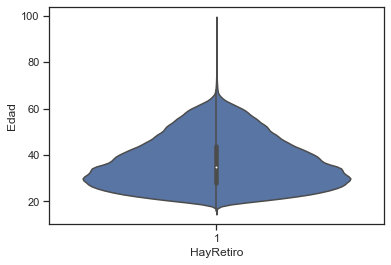

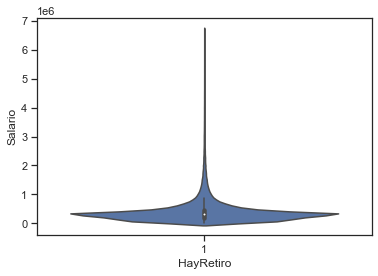

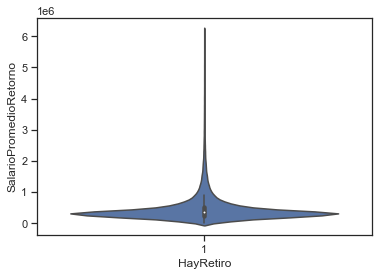

In [143]:
df_raw1_filtered = df_raw1.query('Salario>0')
sns.violinplot(x=df_raw1["HayRetiro"], y=df_raw1_filtered["Edad"])
plt.show()
sns.violinplot(x=df_raw1_filtered["HayRetiro"], y=df_raw1_filtered["Salario"])
plt.show()
df_raw1_filtered = df_raw1.query('SalarioPromedioRetorno>0')
sns.violinplot(x=df_raw1_filtered["HayRetiro"], y=df_raw1_filtered["SalarioPromedioRetorno"])
plt.show()

## 3. Cluster Analysis
> Comprobaremos si existe alguna relación entre la edad y el salario recibido.

In [161]:
df_raw

Periodo  Edad    RangoEdad Genero EstadoCivil  HayRetiro TipoRetiro  \
0      2021-04-30    89  Entre59y100      M       VIUDO          1          E   
1      2020-09-30    84  Entre59y100      M       CASAD          1          E   
2      2021-04-30    47   Entre45y59      M       CASAD          1          E   
3      2020-12-31    85  Entre59y100      F        SOLT          1          E   
4      2020-05-31    81  Entre59y100      F        SOLT          1          S   
...           ...   ...          ...    ...         ...        ...        ...   
502707 2020-06-30    20      Menor31      F        SOLT          1          S   
502708 2020-10-31    21      Menor31      F        SOLT          1          E   
502709 2020-07-31    21      Menor31      F        SOLT          1          E   
502710 2020-03-31    20      Menor31      F        SOLT          1          E   
502711 2020-12-31    21      Menor31      F        DESC          1          E   

           Salario RangoSalario  SalarioPromedioRetorno RangoSalarioRetorno  \
0            0.000     <=Minimo                   0.000                  No   
1            0.000     <=Minimo                   0.000                  No   
2            0.000     <=Minimo                   0.000                  No   
3       350000.000    0.32-0.85                   0.000                  No   
4       421366.000    0.32-0.85              421366.667           0.32-0.85   
...            ...          ...                     ...                 ...   
502707   78419.440     <=Minimo                   0.000                  No   
502708  149999.999     <=Minimo                   0.000                  No   
502709  146314.000     <=Minimo                   0.000                  No   
502710  370180.570    0.32-0.85              374550.000           0.32-0.85   
502711  324000.000    0.32-0.85                   0.000                  No   

       TuvoReduccion  HayAportes  InactivoPostRetiro  InactivoPostUltAporte  \
0                 No           0                   0                      0   
1                 No           0                   7                      7   
2                 No           0                   0                      0   
3                 Si           0                   4                      4   
4                 No           1                   1                     10   
...              ...         ...                 ...                    ...   
502707            Si           0                  10                     10   
502708            Si           0                   6                      6   
502709            Si           0                   9                      9   
502710            No           1                   1                     12   
502711            Si           0                   4                      4   

        MesesTrancurridos Desempleado  Brecha  
0                       0          No       1  
1                       7          Si       1  
2                       0          No       1  
3                       4          Si       2  
4                      11          No       0  
...                   ...         ...     ...  
502707                 10          Si       1  
502708                  6          Si       1  
502709                  9          Si       1  
502710                 13          No       0  
502711                  4          Si       2  

[502712 rows x 18 columns]

### Calcula tasa de retiros por COVID

In [162]:
df_raw2['Desempleado'] = df_raw2.Desempleado.map({'Si':1,'No':0})

### Correlacion

In [163]:
def Generar_Mapa_Correlacion(corr, chart_title, mask_uppertri=False ):
    """ Basado en las caracteristicas correlacionaas , genera matrix de correlacion """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri
    fig,ax = plt.subplots(figsize=(15,15))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()
#var_corr = round(df_cal.corr(),2)

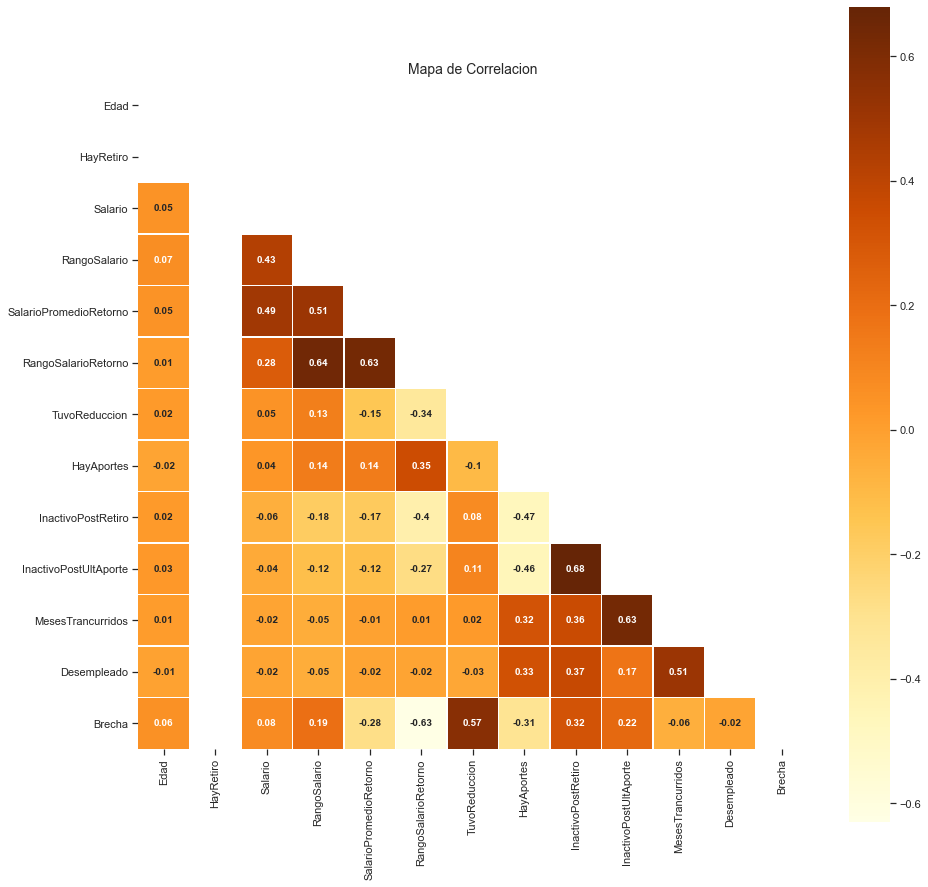

In [164]:
var_corr = round(df_raw2.corr(),2)
Generar_Mapa_Correlacion(var_corr
                       ,chart_title = 'Mapa de Correlacion'
                       ,mask_uppertri = True)

De la matriz de correlación, se nota que existe poca correlación entre las variables.

## 3. Cluster Analysis

Comprobaremos si existe alguna relación entre la edad y el salario recibido.

In [165]:
#df_raw.Desempleado
df_raw1['Desempleado_code'] = df_raw1['Desempleado'].map({'Si': 1,'No': 0}).astype(int)

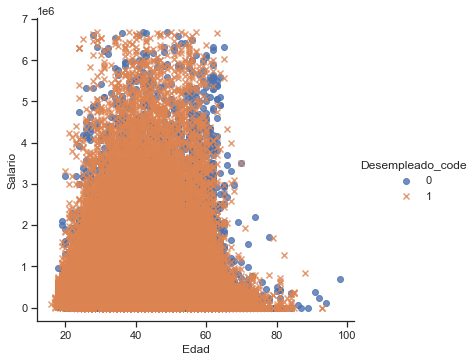

In [166]:
sns.lmplot(x='Edad'
           ,y='Salario'
           ,data=df_raw1
           ,hue='Desempleado_code'
            ,fit_reg=False
            ,markers=["o", "x"])
plt.show()

** A partir del análisis, hay algunos grupos basados en la edad y el salario anterior. ** 

Aplicaremos el algoritmo de clúster de K-means para ver los clústeres. Antes de pasar datos al algoritmo K-means, es necesario normalizar las variables

In [167]:
def Normalize_feature(feature):
    """ Return normalized features """
    return prepro.StandardScaler().fit_transform(feature)

In [168]:
# normalized tenure and monthlycharges

df_raw1['edad_norm'] = Normalize_feature(df_raw1[['Edad']])
df_raw1['salario_norm'] = Normalize_feature(df_raw1[['Salario']])
df_raw1['SalarioPromedioRetorno_norm'] = Normalize_feature(df_raw1[['SalarioPromedioRetorno']])
df_raw1.head()

Periodo  Edad    RangoEdad Genero EstadoCivil  HayRetiro TipoRetiro  \
0 2021-04-30    89  Entre59y100      M       VIUDO          1          E   
1 2020-09-30    84  Entre59y100      M       CASAD          1          E   
2 2021-04-30    47   Entre45y59      M       CASAD          1          E   
3 2020-12-31    85  Entre59y100      F        SOLT          1          E   
4 2020-05-31    81  Entre59y100      F        SOLT          1          S   

    Salario RangoSalario  SalarioPromedioRetorno  ... HayAportes  \
0       0.0     <=Minimo                   0.000  ...          0   
1       0.0     <=Minimo                   0.000  ...          0   
2       0.0     <=Minimo                   0.000  ...          0   
3  350000.0    0.32-0.85                   0.000  ...          0   
4  421366.0    0.32-0.85              421366.667  ...          1   

  InactivoPostRetiro  InactivoPostUltAporte  MesesTrancurridos  Desempleado  \
0                  0                      0                  0           No   
1                  7                      7                  7           Si   
2                  0                      0                  0           No   
3                  4                      4                  4           Si   
4                  1                     10                 11           No   

   Brecha Desempleado_code  edad_norm  salario_norm  \
0       1                0   4.819296     -0.874266   
1       1                1   4.355190     -0.874266   
2       1                0   0.920802     -0.874266   
3       2                1   4.448011     -0.129810   
4       0                0   4.076726      0.021987   

   SalarioPromedioRetorno_norm  
0                    -0.790176  
1                    -0.790176  
2                    -0.790176  
3                    -0.790176  
4                     0.125489  

[5 rows x 22 columns]

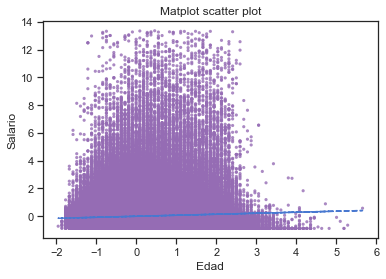

In [169]:
plt.scatter(df_raw1.edad_norm, df_raw1.salario_norm, alpha=0.8, c="m", edgecolors='none', s=10)

# calc the trendline
z = np.polyfit(df_raw1.edad_norm, df_raw1.salario_norm, 1)
p = np.poly1d(z)
plt.plot(df_raw1.edad_norm,p(df_raw1.edad_norm),"b--")

plt.title('Matplot scatter plot')
plt.xlabel('Edad')
plt.ylabel('Salario')
#plt.legend(loc=2)
plt.show()

In [170]:
def Crea_curva_elbow(data):
    """ Despliega curva elbow de K-means para la información data """
    from sklearn.cluster import KMeans
    df_kmeans_data = data
    k = range(1,10)
    kmeans = [KMeans(n_clusters=i) for i in k]
    score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]
    plt.figure(figsize=(8,5))
    plt.plot(k,score)
    plt.xlabel("Clusters")
    plt.ylabel("Puntaje")
    plt.title("Curva Elbow",fontsize=15)
    plt.show()    

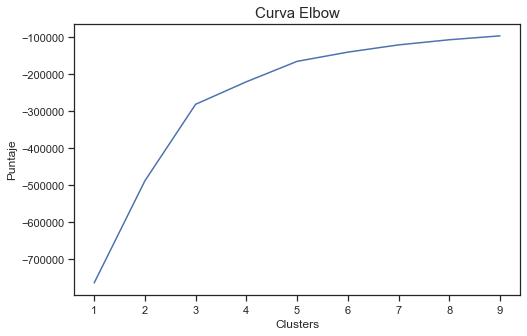

In [171]:
# checking number of clusters

Crea_curva_elbow(df_raw1[df_raw1.Desempleado_code==1][['edad_norm','salario_norm']])

De la curva elbow, 5 parece más ser el número más eficiente.

In [172]:
def Create_kmeans_cluster_graph(df_cal, data, n_clusters, x_title, y_title, chart_title):
    """ Display K-means cluster based on data """
    
    kmeans = KMeans(n_clusters=n_clusters # No of cluster in data
                    , random_state = random_state # Selecting same training data
                   ) 

    kmeans.fit(data)
    kmean_colors = [plotColor[c] for c in kmeans.labels_]


    fig = plt.figure(figsize=(12,8))
    plt.scatter(x= x_title + '_norm'
                , y= y_title + '_norm'
                , data=data 
                , color=kmean_colors # color of data points
                , alpha=0.25 # transparancy of data points
               )

    plt.xlabel(x_title)
    plt.ylabel(y_title)

    plt.scatter(x=kmeans.cluster_centers_[:,0]
                , y=kmeans.cluster_centers_[:,1]
                , color='black'
                , marker='X' # Marker sign for data points
                , s=100 # marker size
               )
    
    plt.title(chart_title,fontsize=15)
    plt.show()
    
    return kmeans.fit_predict(df_cal[df_cal.Desempleado_code==1][[x_title+'_norm', y_title +'_norm']])    

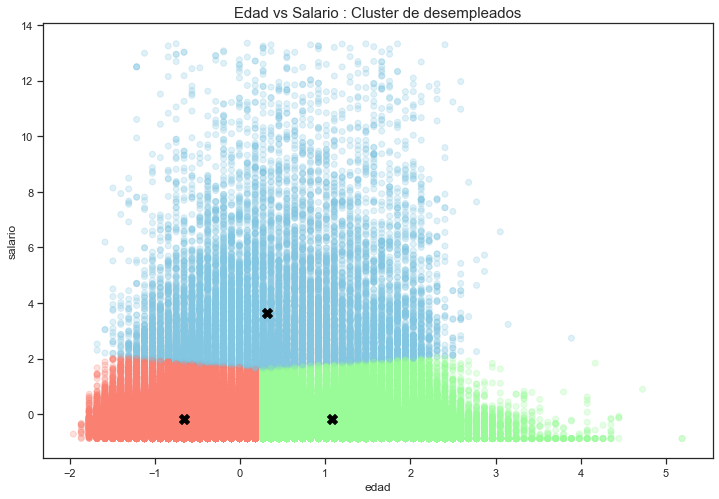

array([-1,  1,  0,  2], dtype=int64)

In [173]:
df_raw1['Cluster'] = -1 # by default set Cluster to -1
df_raw1.loc[(df_raw1.Desempleado_code==1),'Cluster'] = Create_kmeans_cluster_graph(df_raw1
                            ,df_raw1[df_raw1.Desempleado_code==1][['edad_norm','salario_norm']]
                            ,3  ## Clusters
                           ,'edad'
                           ,'salario'
                           ,"Edad vs Salario : Cluster de desempleados")

df_raw1['Cluster'].unique()

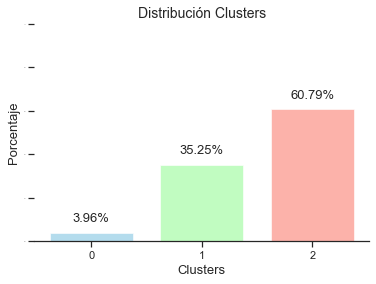

In [174]:
# Distribution of clusters
Desempleado_distribucion =  df_raw1[df_raw1['Desempleado_code']==1].Cluster.value_counts(normalize=True).sort_index()

Generate_bar_graph( x= Desempleado_distribucion.index
                   , y = Desempleado_distribucion.values
                   , x_title = 'Clusters'
                   , y_title = 'Porcentaje'
                   , chart_title = 'Distribución Clusters'
                  , color = plotColor)

Con base en el gráfico de clusters de K-medias, podemos ver que hay tres grupos y dos con poco aporte. 

> * Edades altas y salarios altos (grupo verde) 
> * Edades intermedias y salarios bajos (grupo celeste) 
> * Baja edad y bajos ingresos (grupo turquesa) 
> * Edades laborales e ingresos intermedios (grupo lila)
> * Rango de edad amplio e ngresos altos (grupo rojo)

Y el gráfico de distribución muestra que alrededor del 70% de los desempleados pertenecen a los clúster celeste y turquesa, que destacan por sus bajos ingresos.

Con 3 cluster el analisis salió muy parecido.

> * Edades de jovenes a intermedias y salarios bajos a intermedios (grupo verde) 
> * Edades intermedias a mayores y salarios bajos a intermedios (grupo celeste) 
> * Rango de edad amplio e ingresos intermedios a altos (grupo rojo)

Y el gráfico de distribución muestra que más de 99% de los funcionarios que retiraron el FCL pertenecen a los clúster celeste y verde, que destacan por sus bajos ingresos.

Revisemos los promedios de edades y salarios por cluster.

In [175]:
df_cluster_gp = df_raw1[df_raw1['Desempleado_code']==1].groupby('Cluster')
print(df_cluster_gp[['Edad','Salario']].mean())

              Edad       Salario
Cluster                         
0        40.545204  2.126565e+06
1        48.686641  3.292868e+05
2        30.019018  3.313937e+05


Basándome en información demográfica y otra relacionada con el desempleado, se ha intentado explorar las características de los trabajadores que desemplearon de cada grupo.

In [176]:
def Extract_highest_in_cluster(df_cal, df_cluster, feature, edad_salario_cluster_df ):
    """ Para cada característica, compare el valor del clúster con el valor general 
        y descubra las características distribuidas más altas para ese clúster  """
    
    #print(feature)
    df = df_cal.copy()
    feature_churn_dist = df[(df['Desempleado_code']==1)][feature].value_counts(normalize=True).reset_index()
    #print(feature_churn_dist)
    feature_churn_dist.columns = [feature,'Porcentaje']
      
    feature_cluster_dist = df_cluster[feature].value_counts(normalize=True).to_frame()
    feature_cluster_dist.columns = ['Porcentaje']
    feature_cluster_dist = feature_cluster_dist.reset_index()
    feature_cluster_dist_new = feature_cluster_dist.copy()
    
    edad_salario_df = df_cal[df_cal['Desempleado_code']==1].groupby(['Cluster',feature],as_index=False)[['Edad','Salario']].mean()
    #print(edad_salario_df)
    
    for i,cluster in enumerate(feature_cluster_dist_new['Cluster'].unique()):
        for i, label in enumerate(feature_churn_dist[feature].unique()):
            cluster_val = feature_cluster_dist_new[(feature_cluster_dist_new['Cluster']==cluster) & (feature_cluster_dist_new[feature]==label)]['Porcentaje']
            feature_val = feature_churn_dist[feature_churn_dist[feature] == label]['Porcentaje']
            
            if((len(feature_val.values) > 0) & (len(cluster_val.values) > 0)) :
                if((feature_val.values[0] < cluster_val.values[0])):
                    
                    edad_salario_cluster_df = edad_salario_cluster_df.append(pd.DataFrame({'Category':feature
                            , 'Label': ("No tiene "+ feature) if (df_cal[feature].dtypes == 'int64') & (label == 0) else (("Tiene "+feature) if (df_cal[feature].dtypes == 'int64') & (label == 1) else label)
                            , 'Porcentaje': cluster_val.values[0]
                            , 'Cluster' : cluster
                            , 'Avg_edad':    round(edad_salario_df[(edad_salario_df['Cluster']==cluster) & (edad_salario_df[feature]==label) ]['Edad'].values[0],2)
                            , 'Avg_salario': round(edad_salario_df[(edad_salario_df['Cluster']==cluster) & (edad_salario_df[feature]==label) ]['Salario'].values[0],2)
                            , 'Represent_in_graph': 0 if (label == 0) | (label == 'No') else 1
                            , 'Label_in_graph' :  feature if (df_cal[feature].dtypes == 'int64') else label
                           }
                        , index = [len(edad_salario_cluster_df)])
                        )
    
    return edad_salario_cluster_df  

In [177]:
edad_salario_cluster_df = pd.DataFrame()

#col_tot = nominal_cols + binary_cols
#nominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","HayAportes",
#                 "Diferenciabrechas","InactivoPostUltAporte","InactivoPostRetiro"]

#binary_cols = ["Pensionado","TuvoReduccion"] "HayAportes","Diferenciabrechas","InactivoPostRetiro","InactivoPostUltAporte"
for feature in ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","TuvoReduccion"]:
    #print(feature)
    edad_salario_cluster_df = Extract_highest_in_cluster(df_raw1, df_cluster_gp, feature,edad_salario_cluster_df)

#### Cluster 0 - Mayores de 45 años y salario mayor a 850000

In [178]:
edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==0]

Category       Label  Porcentaje  Cluster  Avg_edad  \
0             RangoEdad  Entre31y45    0.568768        0     37.47   
1             RangoEdad  Entre45y59    0.274303        0     50.27   
6                Genero           M    0.666688        0     40.90   
10          EstadoCivil       CASAD    0.275588        0     45.42   
11          EstadoCivil       DIVOR    0.039938        0     47.22   
12          EstadoCivil       VIUDO    0.003210        0     55.34   
19         RangoSalario   1.23-2.17    0.653589        0     39.65   
20         RangoSalario   2.17-4.33    0.284063        0     42.07   
21         RangoSalario       >4.33    0.045011        0     44.33   
27  RangoSalarioRetorno   0.85-1.23    0.142609        0     39.56   
28  RangoSalarioRetorno   1.23-2.17    0.445358        0     39.64   
29  RangoSalarioRetorno   2.17-4.33    0.216579        0     42.05   
30  RangoSalarioRetorno       >4.33    0.026133        0     45.73   
34        TuvoReduccion          Si    0.602992        0     40.77   

    Avg_salario  Represent_in_graph Label_in_graph  
0    2048092.65                   1     Entre31y45  
1    2333768.75                   1     Entre45y59  
6    2155526.53                   1              M  
10   2269710.22                   1          CASAD  
11   2192928.22                   1          DIVOR  
12   2412605.43                   1          VIUDO  
19   1611004.52                   1      1.23-2.17  
20   2881256.95                   1      2.17-4.33  
21   5201206.47                   1          >4.33  
27   1719003.05                   1      0.85-1.23  
28   1813135.48                   1      1.23-2.17  
29   2847287.37                   1      2.17-4.33  
30   4532386.47                   1          >4.33  
34   2198452.50                   1             Si

### Cluster 1 - Rango edad menores 45 años y con salarios menores a 850 mil. Mujeres solteras.

In [179]:
edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==1]

Category        Label  Porcentaje  Cluster  Avg_edad  \
2             RangoEdad   Entre45y59    0.566098        1     50.56   
3             RangoEdad  Entre59y100    0.095543        1     61.70   
7                Genero            M    0.689633        1     49.01   
13          EstadoCivil        CASAD    0.283456        1     50.07   
14          EstadoCivil        UNLIB    0.074350        1     48.09   
15          EstadoCivil        DIVOR    0.049120        1     50.23   
16          EstadoCivil        VIUDO    0.004896        1     53.94   
22         RangoSalario     <=Minimo    0.542295        1     49.12   
23         RangoSalario    0.32-0.85    0.410849        1     48.18   
24         RangoSalario    0.85-1.23    0.044938        1     47.86   
31  RangoSalarioRetorno           No    0.271695        1     50.03   
35        TuvoReduccion           Si    0.515096        1     48.77   

    Avg_salario  Represent_in_graph Label_in_graph  
2     328413.32                   1     Entre45y59  
3     281669.22                   1    Entre59y100  
7     344285.46                   1              M  
13    358468.90                   1          CASAD  
14    312704.50                   1          UNLIB  
15    339147.63                   1          DIVOR  
16    299810.49                   1          VIUDO  
22    163608.85                   1       <=Minimo  
23    469843.56                   1      0.32-0.85  
24   1003308.16                   1      0.85-1.23  
31    203528.92                   0             No  
35    369559.09                   1             Si

#### Cluster 2 - mayores a 45 años, hombres con salarios mayores a 4.3. 

In [180]:
edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==2]

Category       Label  Porcentaje  Cluster  Avg_edad  \
4             RangoEdad  Entre31y45    0.472198        2     34.77   
5             RangoEdad     Menor31    0.527802        2     25.77   
8                Genero           F    0.371144        2     29.95   
9                Genero           X    0.000054        2     30.85   
17          EstadoCivil        SOLT    0.603416        2     29.90   
18          EstadoCivil        DESC    0.272348        2     28.79   
25         RangoSalario    <=Minimo    0.535165        2     29.63   
26         RangoSalario   0.32-0.85    0.422840        2     30.35   
32  RangoSalarioRetorno   0.32-0.85    0.387178        2     30.30   
33  RangoSalarioRetorno    <=Minimo    0.345821        2     29.60   
36        TuvoReduccion          No    0.505757        2     29.98   

    Avg_salario  Represent_in_graph Label_in_graph  
4     349672.20                   1     Entre31y45  
5     315040.88                   1        Menor31  
8     321755.83                   1              F  
9     320917.66                   1              X  
17    338233.96                   1           SOLT  
18    307945.77                   1           DESC  
25    172076.37                   1       <=Minimo  
26    465406.21                   1      0.32-0.85  
32    432780.56                   1      0.32-0.85  
33    228109.66                   1       <=Minimo  
36    296995.17                   0             No

In [181]:
#### Cluster 4 - Edad entre 38 y 50 años y salarios entre 3.5 y 5.5 millones

In [182]:
#edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==3] Analisis para 5 clusters

In [183]:
#### Cluster 5 - Edad entre 38 y 41años y salarios entre 280000 y 500000 mil

In [184]:
# edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==4] Analisis para 5 clusters

### Representación gráfica de clústeres

In [185]:
def Create_kmeans_cluster_with_label(data, cluster_visualize_gp, x_title, y_title, chart_title):
    """ Generate K-means cluster with labels """
    
    legend_list = []
    category_color = cluster_visualize_gp[['Category']].drop_duplicates().reset_index()
    annotations = []
    #print(data)
    #print([plotColor[c] for c in data.Cluster])
    #df_raw1[df_raw1['Desempleado_code']==1].groupby('Cluster')
           
    fig, ax = plt.subplots(figsize=(12,8))
    plt.scatter(x= x_title 
                , y= y_title
                , data=data 
                , color=[plotColor[c] for c in data.Cluster] # color of data points
                , alpha=0.25 # transparancy of data points
                , s = 15
               )

    for i,txt in enumerate(cluster_visualize_gp['Label_in_graph']):
        annotations.append(ax.text(cluster_visualize_gp['Avg_edad'][i]
                                , cluster_visualize_gp['Avg_salario'][i]
                                , txt))
                                #, fontsize = 13
                                #, weight="bold"))
        #print(annotations)

        ax.scatter(x=cluster_visualize_gp['Avg_edad'][i]
            , y=cluster_visualize_gp['Avg_salario'][i]
            , color = plotColor[category_color[category_color['Category'] == cluster_visualize_gp['Category'][i]].index[0]]
            , label = cluster_visualize_gp['Label_in_graph'][i]
            , marker = markers[category_color[category_color['Category'] == cluster_visualize_gp['Category'][i]].index[0]]
            , s=120 # marker size
           )
    
    for key,i in enumerate(category_color.Category.values):
        legend_list.append(mlines.Line2D([]
                            , []
                            , linestyle= 'None'
                            , color = plotColor[key]      
                            , markersize = 10
                            , marker = markers[key]
                            , label= i))
    
    adjust_text(annotations, arrowprops={"arrowstyle": "-", "color": "black", "ls": "dashed", "alpha": 1.9},
               force_text=(2, 2),autoalign='y')
                #,x=cluster_visualize_gp['Avg_edad']
                #,y=cluster_visualize_gp['Avg_salario'])
    
    plt.legend(handles=legend_list
              , loc = 'lower right')
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(chart_title,fontsize=15)
    plt.show()           

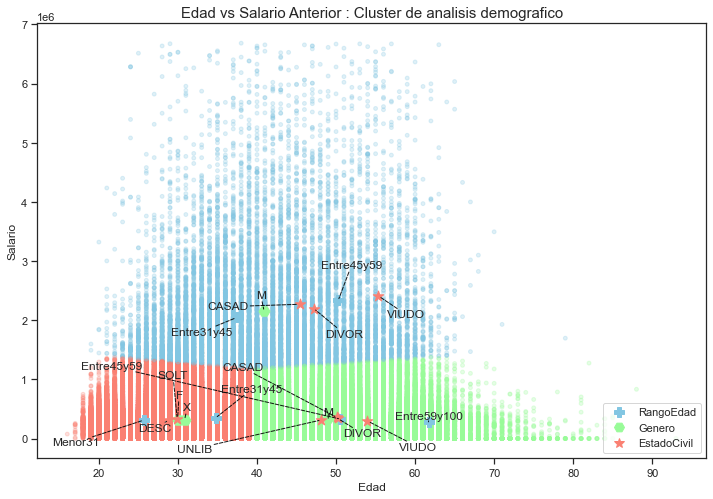

In [186]:
cluster_with_label_gp = edad_salario_cluster_df[(edad_salario_cluster_df['Represent_in_graph']==1) 
                          & ((edad_salario_cluster_df['Category'] == 'Genero')
                            | (edad_salario_cluster_df['Category'] == 'RangoEdad')
                            | (edad_salario_cluster_df['Category'] == 'EstadoCivil'))]
#print(cluster_with_label_gp )

#print(df_raw1[df_raw1.Desempleado_code==1][['edad','salario','Cluster']])
Create_kmeans_cluster_with_label(df_raw1[df_raw1.Desempleado_code==1][['Edad','Salario','Cluster']]
                           ,cluster_with_label_gp.reset_index()
                           ,'Edad'
                           ,'Salario'
                           ,"Edad vs Salario Anterior : Cluster de analisis demografico")

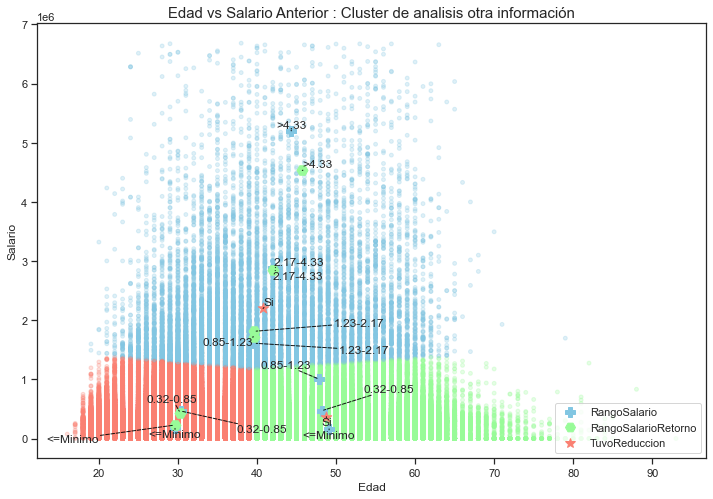

In [187]:
cluster_with_label_gp = edad_salario_cluster_df[(edad_salario_cluster_df['Represent_in_graph']==1) 
                          & ((edad_salario_cluster_df['Category'] == 'TuvoReduccion')
                           | (edad_salario_cluster_df['Category'] == 'RangoSalarioRetorno')
                           #| (edad_salario_cluster_df['Category'] == 'Diferenciabrechas')                          
                            | (edad_salario_cluster_df['Category'] == 'RangoSalario'))]
                           #| (edad_salario_cluster_df['Category'] == 'InactivoPostRetiro'))]
#print(cluster_with_label_gp )

#print(df_raw1[df_raw1.Desempleado_code==1][['edad','salario','Cluster']])
Create_kmeans_cluster_with_label(df_raw1[df_raw1.Desempleado_code==1][['Edad','Salario','Cluster']]
                           ,cluster_with_label_gp.reset_index()
                           ,'Edad'
                           ,'Salario'
                           ,"Edad vs Salario Anterior : Cluster de analisis otra información")

In [188]:
df_raw1.groupby('RangoEdad').count()

Periodo    Edad  Genero  EstadoCivil  HayRetiro  TipoRetiro  \
RangoEdad                                                                  
Entre31y45    214096  214096  214096       214096     214096      214096   
Entre45y59    105196  105196  105196       105196     105196      105196   
Entre59y100    19014   19014   19014        19014      19014       19014   
Menor31       163450  163450  163450       163450     163450      163450   

             Salario  RangoSalario  SalarioPromedioRetorno  \
RangoEdad                                                    
Entre31y45    214096        214096                  214096   
Entre45y59    105196        105196                  105196   
Entre59y100    19014         19014                   19014   
Menor31       163450        163450                  163450   

             RangoSalarioRetorno  ...  InactivoPostRetiro  \
RangoEdad                         ...                       
Entre31y45                214096  ...              214096   
Entre45y59                105196  ...              105196   
Entre59y100                19014  ...               19014   
Menor31                   163450  ...              163450   

             InactivoPostUltAporte  MesesTrancurridos  Desempleado  Brecha  \
RangoEdad                                                                    
Entre31y45                  214096             214096       214096  214096   
Entre45y59                  105196             105196       105196  105196   
Entre59y100                  19014              19014        19014   19014   
Menor31                     163450             163450       163450  163450   

             Desempleado_code  edad_norm  salario_norm  \
RangoEdad                                                
Entre31y45             214096     214096        214096   
Entre45y59             105196     105196        105196   
Entre59y100             19014      19014         19014   
Menor31                163450     163450        163450   

             SalarioPromedioRetorno_norm  Cluster  
RangoEdad                                          
Entre31y45                        214096   214096  
Entre45y59                        105196   105196  
Entre59y100                        19014    19014  
Menor31                           163450   163450  

[4 rows x 22 columns]

In [213]:
#df_raw1['Desempleado_code'] = df_raw1['Desempleado'].map({'Si': 1,'No': 0}).astype(int)
df_clu = df_raw1.copy()
# Se elimina porque estan normalizadas.
""" Cambiar el nombre de las columnas y transformarlos en el formato adecuado y devolver el marco de datos """    
    
df_clu['RangoSalario'] = df_clu.RangoSalario.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})
df_clu['RangoSalarioRetorno'] = df_clu.RangoSalarioRetorno.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})
df_clu['RangoEdad'] = df_clu.RangoEdad.map({'Menor31':1,'Entre31y45':2,'Entre45y59':3,'Entre59y100':4,'Mayor100':5}).astype(int)
df_clu['Genero'] = df_clu.Genero.map({'F':1,'M':2,'X':0}).astype(int)
df_clu['TipoRetiro'] = df_clu.TipoRetiro.map({'E':1,'S':2,'R':3}).astype(int)
df_clu['EstadoCivil'] = df_clu.EstadoCivil.map({'DESC':0,'SOLT':1,'CASAD':2,'DIVOR':3,'VIUDO':4,'UNLIB':5,'SEPAR':6}).astype(int) 
df_clu['TuvoReduccion'] = df_clu.TuvoReduccion.map({'No':0,'Si':1}).astype(int)
df_clu['Desempleado'] = df_clu['Desempleado_code'].astype(int)
    
df_clu = df_clu.drop(columns=['Cluster','Edad','Salario','SalarioPromedioRetorno','Desempleado_code','Periodo','HayRetiro']) 

In [214]:
# Obtener las correlaciones de las variables con "Churn" con las actuales
df_clu.corr()['Desempleado'].sort_values(ascending = False)

Desempleado                    1.000000
MesesTrancurridos              0.510274
InactivoPostRetiro             0.366049
HayAportes                     0.334295
InactivoPostUltAporte          0.166213
TipoRetiro                     0.152411
Genero                        -0.007730
EstadoCivil                   -0.010528
edad_norm                     -0.011359
RangoEdad                     -0.011715
SalarioPromedioRetorno_norm   -0.018680
Brecha                        -0.019759
RangoSalarioRetorno           -0.022635
TuvoReduccion                 -0.032831
salario_norm                  -0.037776
RangoSalario                  -0.048525
Name: Desempleado, dtype: float64

In [215]:
correlated_features = set()
df_corr = df_clu
correlation_matrix = df_corr.corr()

In [216]:
# Se obtendran las caracteristicas que tengan un correlación mayor a .7.
for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlated_features.add(colname)
            correlated_features.add(colname2)

In [217]:
correlated_features

{'RangoEdad',
 'RangoSalario',
 'RangoSalarioRetorno',
 'SalarioPromedioRetorno_norm',
 'edad_norm',
 'salario_norm'}

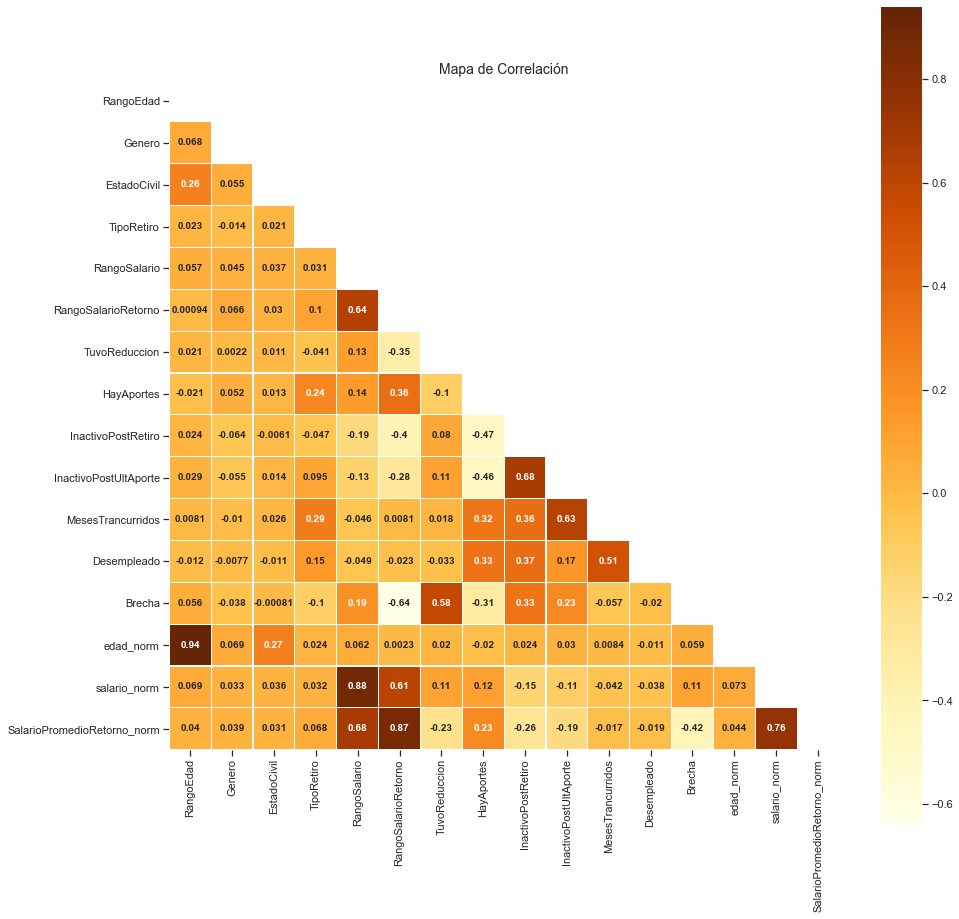

In [218]:
Generar_Mapa_Correlacion(df_clu.corr()
                       ,chart_title = 'Mapa de Correlación'
                       ,mask_uppertri = True)

In [219]:
import scipy.stats as ss
n=6
r=correlation_matrix
t=r*np.sqrt((n-2)/(1-r*r))
p_features = set()  
arr_matrix = ss.t.cdf(t, n-2)
p_matrix = pd.DataFrame(arr_matrix)

In [220]:
for i in range(len(p_matrix.columns)):  
    for j in range(i):
        if abs(p_matrix.iloc[i, j]) <= 0.05:
            colname = p_matrix.columns[i]
            colname2 = p_matrix.columns[j]
            p_features.add(colname)
            p_features.add(colname2)

In [221]:
# Rechazan la hipotesis nula. Se podrían eliminar
p_features

set()

ejecutaremos el modelo de Regresión Logística “desequilibrado”, para tener un “baseline”, es decir unas métricas contra las cuales podremos comparar y ver si mejoramos

#### Probando el Modelo sin estrategias

In [223]:
# Antes estaba df_clu, pero baje y reclaculo df_model, para ver si da diferente
#definimos nuestras etiquetas y features
y = df_clu['Desempleado']
X = df_clu.drop('Desempleado', axis=1)
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

#ejecutamos el modelo "tal cual"
model = run_model(X_train, X_test, y_train, y_test)

In [224]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score

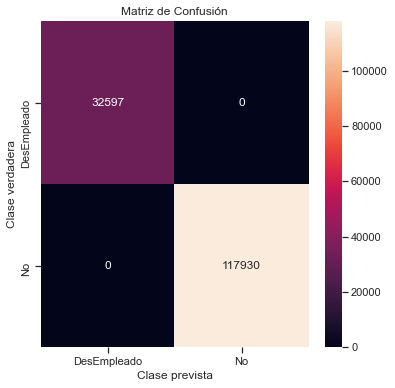

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32597
           1       1.00      1.00      1.00    117930

    accuracy                           1.00    150527
   macro avg       1.00      1.00      1.00    150527
weighted avg       1.00      1.00      1.00    150527



In [225]:
#definimos funciona para mostrar los resultados
#def mostrar_resultados(y_test, pred_y):
#    conf_matrix = confusion_matrix(y_test, pred_y)
#    plt.figure(figsize=(12, 12))
#    sns.heatmap(conf_matrix, xticklabels==['No','Si'], yticklabels==['No','Si'], annot=True, fmt="d");
#    plt.title("Confusion matrix")
#    plt.ylabel('True class')
#    plt.xlabel('Predicted class')
#    plt.show()
#    print (classification_report(y_test, pred_y))
    
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(6, 6))
    # Porcentaje
    # sns.heatmap(conf_matrix/np.sum(conf_matrix), xticklabels=['No','Si'],yticklabels=['No','Si'], annot=True, fmt =".2%");
    sns.heatmap(conf_matrix, xticklabels=['DesEmpleado','No'],yticklabels=['DesEmpleado','No'], annot=True, fmt ="d");
    plt.title("Matriz de Confusión")
    plt.ylabel('Clase verdadera')
    plt.xlabel('Clase prevista')
    plt.show()
    print (classification_report(y_test, pred_y))

pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Aqui vemos la confusion matrix y en la clase 2 (es lo que nos interesa detectar) vemos 0 fallos y 26526
aciertos dando un** recall de 1** y en teoría el valor no se podría mejorar. También es interesante
notar que en la columna de f1-score obtenemos excelentes resultados PERO que realmente no nos
deben engañar… Sin embargo, Lo cierto es que nuestro modelo es capaz de detectar correctamente los casos correctos.

Utilizaremos un parámetro adicional en el modelo de Regresión logística en donde indicamos class_-
weight = “balanced” y con esto el algoritmo se encargará de equilibrar a la clase minoritaria durante
el entrenamiento. Veamos:

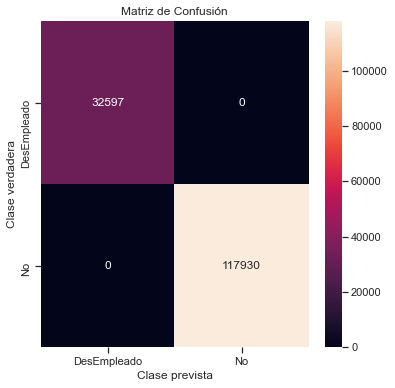

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32597
           1       1.00      1.00      1.00    117930

    accuracy                           1.00    150527
   macro avg       1.00      1.00      1.00    150527
weighted avg       1.00      1.00      1.00    150527



In [226]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Con la clase balanceada seguimos onteniendo buenos resultados.

### Bajo este analisis del p-value  se puede observar que no hay caracteristicas involucradas

Se tendrá que verificar si la dispersón entre ellos lo demuestra

In [258]:
import warnings
warnings.filterwarnings('ignore')

In [259]:
df_clu.head()

RangoEdad  Genero  EstadoCivil  RangoSalario  HayAportes  \
0          4       1            1             1           4   
1          4       1            1             1           3   
2          4       1            1             1           2   
3          4       1            1             1           1   
4          4       1            1             1           0   

   RangoSalarioRetorno  TuvoReduccion  Brecha  Desempleado  \
0                    1              1       0            0   
1                    1              0       0            0   
2                    1              0       0            0   
3                    1              0       0            0   
4                    0              1       1            1   

   InactivoPostRetiro  InactivoPostUltAporte  edad_norm  salario_norm  \
0                   1                      4   3.274973     -0.467784   
1                   1                      3   3.274973     -0.468933   
2                   1                      2   3.274973     -0.468933   
3                   1                      1   3.274973     -0.468933   
4                   0                      0   3.274973     -0.468933   

   SalarioPromedioRetorno_norm  
0                    -0.455838  
1                    -0.455838  
2                    -0.455838  
3                    -0.455838  
4                    -0.533823

#### Train & Test data split

In [239]:
print(cat_cols)
print(nominal_cols)
print(binary_cols) 
print(num_cols)
print(target_col)
num_cols = ['HayAportes', 'Brecha', 'InactivoPostUltAporte', 'InactivoPostRetiro']
cat_cols = ['RangoEdad', 'Genero', 'EstadoCivil', 'RangoSalario', 'RangoSalarioRetorno']
print(num_cols)
binary_cols = 'TuvoReduccion'
#y_train.head()

['RangoEdad', 'Genero', 'EstadoCivil', 'RangoSalario', 'RangoSalarioRetorno']
['RangoEdad', 'Genero', 'EstadoCivil', 'RangoSalario', 'RangoSalarioRetorno']
TuvoReduccion
['HayAportes', 'Brecha', 'InactivoPostUltAporte', 'InactivoPostRetiro', 'HayRetiros']
Desempleado
['HayAportes', 'Brecha', 'InactivoPostUltAporte', 'InactivoPostRetiro']


In [240]:
def Shuffle_data(df):
    """ Return shuffled data based on rows """
    return shuffle(df).reset_index().drop('index'
                                          , axis = 1)

def One_hot_encoding(df,feature):
    """ Apply one hot encoding to given features """
    return pd.concat([df
                      , pd.get_dummies(df[feature])]
                     , axis = 1)

def Merge_df(data, features):
    """ Return merge dataframe with given features"""
    merged_df = pd.DataFrame()
    for feature in features:
        merged_df = pd.concat([merged_df, data[feature]]
                              , axis = 1)
    return merged_df

def Normalize_df(data, cols):
    """ Normalize features """
    for col in cols:
        data[col] = Normalize_feature(data[[col]])
        
    return data    

def Create_model_df(df, col_cols, nom_cols, binary_cols, num_cols, target_col):
    """ Preparing data for modelling """
    
    df_model = Merge_df(df , [col_cols, num_cols, target_col])
    df_model = Shuffle_data(df_model)
    df_model = One_hot_encoding(df_model, nom_cols)
    
    df_model.drop(nom_cols, axis = 1, inplace = True)
    
    df_model = Normalize_df(df_model, num_cols)
    
    return (df_model.loc[:, ~df_model.columns.isin(target_col)]
            , df_model[target_col].values.flatten())


def Train_test_df(feature, target, test_size):
    """ Spliting data to train and test"""
    return train_test_split(feature
                     ,target
                     ,test_size= test_size
                     ,random_state= random_state)

In [241]:
df_clu.head().T

0         1         2         3          4
RangoEdad                    4.000000  4.000000  3.000000  4.000000   4.000000
Genero                       2.000000  2.000000  2.000000  1.000000   1.000000
EstadoCivil                  4.000000  2.000000  2.000000  1.000000   1.000000
TipoRetiro                   1.000000  1.000000  1.000000  1.000000   2.000000
RangoSalario                 1.000000  1.000000  1.000000  2.000000   2.000000
RangoSalarioRetorno          0.000000  0.000000  0.000000  0.000000   2.000000
TuvoReduccion                0.000000  0.000000  0.000000  1.000000   0.000000
HayAportes                   0.000000  0.000000  0.000000  0.000000   1.000000
InactivoPostRetiro           0.000000  7.000000  0.000000  4.000000   1.000000
InactivoPostUltAporte        0.000000  7.000000  0.000000  4.000000  10.000000
MesesTrancurridos            0.000000  7.000000  0.000000  4.000000  11.000000
Desempleado                  0.000000  1.000000  0.000000  1.000000   0.000000
Brecha                       1.000000  1.000000  1.000000  2.000000   0.000000
edad_norm                    4.819296  4.355190  0.920802  4.448011   4.076726
salario_norm                -0.874266 -0.874266 -0.874266 -0.129810   0.021987
SalarioPromedioRetorno_norm -0.790176 -0.790176 -0.790176 -0.790176   0.125489

In [242]:
df_model = df_clu.copy()
df_model_feature ,df_model_target = Create_model_df(df_model
                                                    , cat_cols
                                                    , nominal_cols
                                                    , binary_cols
                                                    , num_cols
                                                    , [target_col])

x_train, x_test, y_train, y_test = Train_test_df(df_model_feature
                                                 , df_model_target
                                                 , test_size = 0.2)


print("----------------------------")
print("Original features shape, ", df_model_feature.shape)
print("Original target shape, ", df_model_target.shape)
print("x train shape, ", x_train.shape)
print("y train shape, ", y_train.shape)
print("x test shape, ", x_test.shape)
print("y test shape, ", y_test.shape)
print("----------------------------")

----------------------------
Original features shape,  (501756, 4)
Original target shape,  (501756,)
x train shape,  (401404, 4)
y train shape,  (401404,)
x test shape,  (100352, 4)
y test shape,  (100352,)
----------------------------


#### Class imbalance

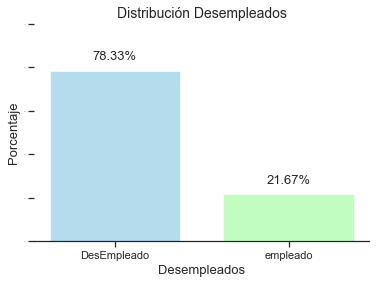

In [243]:
# Distribution in train dataset

Tasa_Desempleados = pd.value_counts(y_train) / len(y_train)
Generate_bar_graph(Tasa_Desempleados.index.map({1:'DesEmpleado',0:"empleado"})
                   , Tasa_Desempleados.values
                   , 'Desempleados'
                   , 'Porcentaje'
                   , 'Distribución Desempleados')

Aquí, nuestro modelo de entrenamiento tiene un problema de desequilibrio de clases debido a la desigualdad en la distribución de datos. 

#### Se hara Upsampling de los datos de entrenamiento (train)

In [244]:
# Upsampling usando SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
sm = SMOTE(random_state = random_state) #, ratio = 1.0)
X_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

#os_us = SMOTETomek() #ratio=0.5
#X_train_sm, y_train_sm = os_us.fit_resample(X_train, y_train)
#print ("Distribution before resampling {}".format(Counter(y_train)))
#print ("Distribution after resampling {}".format(Counter(y_train_res)))

model = run_model_balanced(X_train_sm, X_test, y_train_sm, y_test)
#pred_y = model.predict(X_test)
#mostrar_resultados(y_test, pred_y)
print("----------------------------")
print("Original y train shape, ", y_train.shape)
print("Resample y train shape, ", y_train_sm.shape)
print("----------------------------")

----------------------------
Original y train shape,  (401404,)
Resample y train shape,  (628860,)
----------------------------


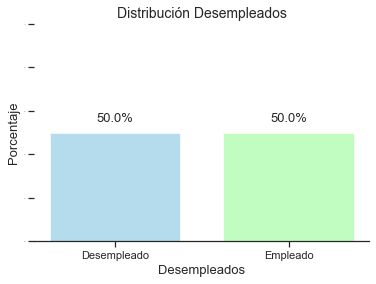

In [245]:
# Despues upsampling la nueva distribución del dataset de entrenamiento

Tasa_Desempleados = pd.value_counts(y_train_sm) / len(y_train_sm)
Generate_bar_graph(Tasa_Desempleados.index.map({0:'Empleado',1:"Desempleado"})
                   , Tasa_Desempleados.values
                   , 'Desempleados'
                   , 'Porcentaje'
                   , 'Distribución Desempleados')

In [248]:
from sklearn.ensemble import RandomForestClassifier

cl = RandomForestClassifier(random_state=2)
cl.fit(X_train_sm,y_train_sm)

pred_y = cl.predict(X_test)
mostrar_resultados(y_test, pred_y)

ValueError: X has 15 features, but DecisionTreeClassifier is expecting 4 features as input.

In [336]:
y_proba = cl.predict_proba(X_test)[:,1]

In [337]:
#from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_proba)

1.0

Tiene un metrica ROC_AUC excelente, esto nos idica qué tan bien esta clasificando las predicciones
Pero no predice desempleados.

#### Predecir la churn rate de cada cliente según el modelo RandomForest

In [338]:
y_proba = cl.predict_proba(X_test)

Cross-validation

In [339]:
cl

RandomForestClassifier(random_state=2)

In [340]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10,random_state=0,shuffle=True)
cross_val_score(cl,X,y,cv=kf,scoring='roc_auc').mean()

1.0

## Random forest
### 2 - más arboles

In [341]:
X = df_model.drop(columns=['Desempleado'])
Y = df_model.Desempleado
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,Y,
                            test_size=0.3,random_state = 0)
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_res2, y_train_res2 = smt.fit_resample(X_train2, y_train2) 
X_train2 = X_train_res2
y_train2 = y_train_res2

In [342]:
from sklearn.ensemble import RandomForestClassifier

cl = RandomForestClassifier(n_estimators = 100, random_state=2)
cl.fit(X_train2,y_train2)

RandomForestClassifier(random_state=2)

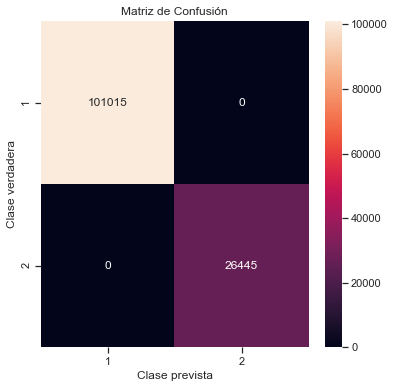

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    101015
           2       1.00      1.00      1.00     26445

    accuracy                           1.00    127460
   macro avg       1.00      1.00      1.00    127460
weighted avg       1.00      1.00      1.00    127460



In [159]:
y_pred = cl.predict(X_test2)
mostrar_resultados(y_test2, y_pred)

In [353]:
y_proba = cl.predict_proba(X_test2)[:,1]
roc_auc_score(y_test2,y_proba)

1.0

In [354]:
y_proba = cl.predict_proba(X_test2)
# Cross validation
cl

RandomForestClassifier(random_state=2)

In [355]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=0,shuffle=True)
cross_val_score(cl,X,Y,cv=kf,scoring='roc_auc').mean()

1.0

In [356]:
cl.feature_importances_.size

13

In [357]:
X.columns.size

13

In [358]:
coef_dict={}

for name, importance in zip(X.columns.values, cl.feature_importances_):
    print(name, "=", importance)

RangoEdad = 0.00015687798184696106
Genero = 0.00020134785012712646
EstadoCivil = 0.0002819481338553675
RangoSalario = 0.0007404319651756544
HayAportes = 0.06894435799153577
RangoSalarioRetorno = 0.07587306326462408
Brecha = 0.028890330500597406
InactivoPostRetiro = 0.025452238990388783
InactivoPostUltAporte = 0.7045343385093739
TuvoReduccion = 0.0018268247481887862
edad_norm = 0.0012977301491640364
salario_norm = 0.0035162576060672694
SalarioPromedioRetorno_norm = 0.088284252309055


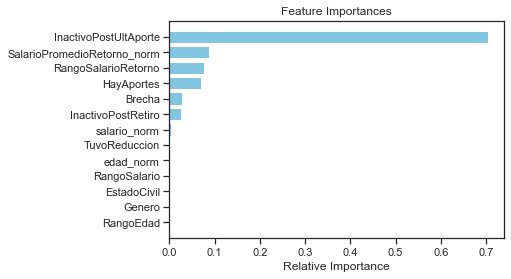

In [359]:
features = X.columns.values
importances = cl.feature_importances_
indices = np.argsort(importances)

#plt.size()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='c', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<AxesSubplot:>

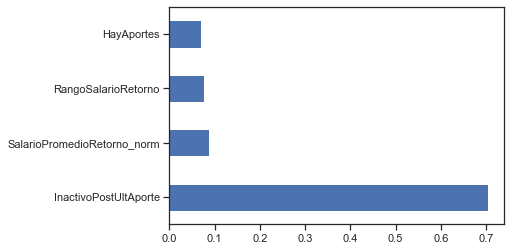

In [360]:
feat_importances = pd.Series(cl.feature_importances_, index=X.columns.values)
feat_importances.nlargest(4).plot(kind='barh')

In [361]:
X = df_model.loc[:, df_model.columns != 'Desempleado'].values
y = df_model['Desempleado'].values  

# Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [362]:
###############################################################################

# ANN Build

###############################################################################

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


def create_nn(n_features, w_in, w_h1, n_var_out, optimizer, lr, momentum, decay):
    """
    Funcion para crear una NN para clasificacion binaria usando 2 HL
    
    """
    
    
    # Initialising the ANN
    model = Sequential()
    
    # First HL
    # [batch_size x n_features] x [n_features x w_in]
    model.add(Dense(units = w_in, input_dim = n_features, 
                    kernel_initializer = 'normal', 
                    activation = 'relu')) 
    # Second HL
    # [batch_size x w_in] x [w_in x w_h1]
    model.add(Dense(units = w_h1, input_dim = w_in, 
                    kernel_initializer = 'normal', 
                    activation = 'relu'))
    
    # Output Layer
    # [batch_size x w_h1] x [w_h1 x w_out]
    model.add(Dense(units = n_var_out, 
                    kernel_initializer = 'normal', 
                    activation = 'sigmoid')) 
    
    # Compile Model
    # Loss Function -> Cross Entropy (Binary)
    # Optimizer -> sgd, adam...
    if optimizer == 'sgd':
        keras.optimizers.SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
        model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    else:
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    return model

In [363]:
## fix random seed for reproducibility
#from tensorflow import set_random_seed
#from numpy.random import seed
#value = 7
#seed(value)
#set_random_seed(value)


# Parametros
n_features = np.shape(X_train)[1]
w_in = 12
w_h1 = 8
n_var_out = 1
batch_size = 100
nb_epochs = 10 #100
optimizer = 'adam'
lr = 0.1
momentum = 0.01
decay = 0.0

# Create NN
model = create_nn(n_features, w_in, w_h1, n_var_out, optimizer, lr, momentum, decay)
    
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs)

Epoch 1/10
3187/3187 [==============================] - 7s 2ms/step - loss: 0.2362 - accuracy: 0.9053
Epoch 2/10
3187/3187 [==============================] - 7s 2ms/step - loss: 0.0224 - accuracy: 1.0000
Epoch 3/10
3187/3187 [==============================] - 7s 2ms/step - loss: 0.0058 - accuracy: 0.9999
Epoch 4/10
3187/3187 [==============================] - 7s 2ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 5/10
3187/3187 [==============================] - 7s 2ms/step - loss: 7.7296e-04 - accuracy: 0.9999
Epoch 6/10
3187/3187 [==============================] - 7s 2ms/step - loss: 3.3281e-04 - accuracy: 1.0000
Epoch 7/10
3187/3187 [==============================] - 7s 2ms/step - loss: 4.0680e-04 - accuracy: 1.0000
Epoch 8/10
3187/3187 [==============================] - 6s 2ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 9/10
3187/3187 [==============================] - 7s 2ms/step - loss: 5.4526e-04 - accuracy: 0.9999
Epoch 10/10
3187/3187 [==============================] - 7s 2ms/st

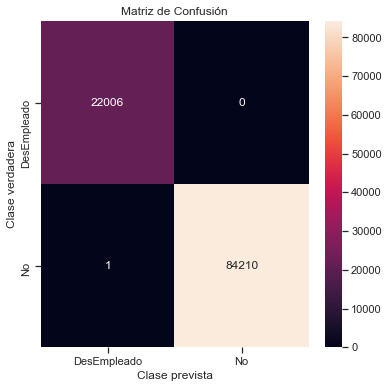

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22006
           1       1.00      1.00      1.00     84211

    accuracy                           1.00    106217
   macro avg       1.00      1.00      1.00    106217
weighted avg       1.00      1.00      1.00    106217



In [364]:
###############################################################################

# ANN Predictions

###############################################################################

# Predict
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
mostrar_resultados(y_test, y_pred)

In [366]:
print(model.predict(np.array([[4,2,3,1,1,0,-1,0,0,1,4,0.3,0]])))
print(cl.predict(np.array([[1,1,1,1,1,0,-1,0,0,1,4,0.3,0]])))


[[1.]]
[1]


In [ ]:
RangoEdad = 0.00014731545678202577
Genero = 0.00019853612150028346
EstadoCivil = 0.0002930234758663785
RangoSalario = 0.0007873164022056818
HayAportes = 0.06602074711403894
RangoSalarioRetorno = 0.07378260385974487
Brecha = 0.02839999829324514
InactivoPostRetiro = 0.0247506219256045
InactivoPostUltAporte = 0.7047125753928435
TuvoReduccion = 0.0032884332424675407
edad_norm = 0.0012127304706126033
salario_norm = 0.004413496321761972
SalarioPromedioRetorno_norm = 0.09199260192332642

#### Desarrollo del Modelo

Aquí, usaré modelos de regresión logística, Random forest y aumento de gradiente(**Gradient boosting**) para predecir desempleados y comparar qué modelo funciona mejor para nuestro conjunto de datos. Además, analizare el conjunto de datos original y los datos de muestreo superior para todos estos modelos.

### Ajuste de hiperparametros (Hyperparameter Tunning)

Basado en datos originales y de Upsampling, ajustamos los hiperparámetros para nuestros datos de entrenamiento para los tres modelos.

In [122]:
def Parameter_tunning(x, y, models, clsModelsNm, parameters, score):
    
    tuned_params = {}
    for i,model in enumerate(models):
        print(clsModelsNm[i])
        if clsModelsNm[i] == "Logistic Regression":
            ## Se cambiaron porque daba error con los parametros anteriores
            solver_options = ['newton-cg', 'liblinear', 'Lbfgs']  ## Le quite esta 'lbfgs',  -- sag
            multi_class_options = ['ovr', 'multinomial']
            class_weight_options = ['None', 'balanced']

            param_grid_RL = dict(solver = solver_options, multi_class = 
            multi_class_options, class_weight = class_weight_options)

            grid = GridSearchCV(estimator = model 
                            , cv = 5
                            , param_grid = param_grid_RL  ####parameters[clsModelsNm[i]]
                            , scoring = score
                            , n_jobs = 3
                           )            
            
        else:
            grid = GridSearchCV(estimator = model 
                            , cv = 5
                            , param_grid = parameters[clsModelsNm[i]]
                            , scoring = score
                            , n_jobs = 3
                           )
        grid.fit(x,y)
        print(grid.best_score_)
        print(grid.best_params_)
        tuned_params[clsModelsNm[i]] = {'params':grid.best_params_}
    
    return tuned_params

In [123]:
clsModelsNm = ["Logistic Regression", "Random Forest", "Gradient boosting"]
#clsModelsNm = ["Random Forest", "Gradient boosting"]
scoreMatrix = ['accuracy','precision','recall','f1','neg_log_loss']
'''
clsParams = {'Random Forest': {'max_depth':[3,5,7,10,15,20]
                                ,'n_estimators':[100,150,200]
                                ,'max_features':['auto',0.7,0.2]
                                ,'min_samples_leaf':[1,5,10,15,20]
                                 }
             , 'Gradient boosting': {'learning_rate': [0.05, 0.1, 0.2]
                                    ,'n_estimators':[10,50,100,150,200]
                                    ,'max_depth':[3,5,7]
                                    ,'min_samples_split':[0.1, 0.5, 1.0]
                                    ,'min_samples_leaf':[1, 5, 10, 15, 20]
                                    ,'subsample': [0.1, 0.5, 0.7 , 1]
                                    }
            }

'''
clsParams = {'Logistic Regression':{'C':[0.1, 0.5, 1, 5, 10, 15, 20, 100] 
                                   ,'penalty':['l1','l2']
                                    }
             , 'Random Forest': {'max_depth':[3,5,7,10,15,20]
                                ,'n_estimators':[100,150,200]
                                ,'max_features':['auto',0.7,0.2]
                                ,'min_samples_leaf':[1,5,10,15,20]
                                 }
             , 'Gradient boosting': {'learning_rate': [0.05, 0.1, 0.2]
                                    ,'n_estimators':[10,50,100,150,200]
                                    ,'max_depth':[3,5,7]
                                    ,'min_samples_split':[0.1, 0.5, 1.0]
                                    ,'min_samples_leaf':[1, 5, 10, 15, 20]
                                    ,'subsample': [0.1, 0.5, 0.7 , 1]
                                    }
            }            

In [124]:
clsLR = LogisticRegression(random_state = random_state)
clsRF = RandomForestClassifier(random_state = random_state)
clsGB = GradientBoostingClassifier(random_state = random_state)

clsModels = [clsLR, clsRF, clsGB]
#clsModels = [clsRF, clsGB]

tuned_params = Parameter_tunning(x_train, y_train, clsModels, clsModelsNm, clsParams, 'neg_log_loss')

Logistic Regression


D:\Personal\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.0084467          nan         nan         nan         nan         nan
 -0.00947727 -0.01417622         nan -0.00633555         nan         nan]
  warnings.warn(


-0.006335551968900763
{'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'newton-cg'}
Random Forest
-1.769691953349792e-07
{'max_depth': 15, 'max_features': 0.7, 'min_samples_leaf': 1, 'n_estimators': 200}
Gradient boosting


KeyboardInterrupt: 

# **ANÁLISIS DE NOTAS PERIODÍSTICAS**

Análisis exploratorio de las notas periodísticas usando Procesamiento de Lenguaje Natural Básico. Con esta información se busca indagar si el tema referente al cierre de restaurantes y diferentes comercios identificados en el análisis anterior, realmente fue percibido como un problema por la población mexicana y que tipo de sentimientos fueron asociados en la propagación de las noticias. 

Las preguntas de investigación que se plantearon para este análisis fueron las siguientes:


*   ¿En qué meses o fechas exactas existieron un mayor número de noticias referentes al covid, FCL y jornada laboral?
*   ¿Cuál fue el sentimiento que predomino en la redacción de las notas periodisticas y si fueron sustentadas con hechos o meramente opiones?

## Definición de módulos

In [1]:
import locale
from datetime import datetime
import dateutil
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
#import plotly.express as px


## Extracción de notas periodísticas con Scrapy
Scrapy fue utilizado para rastrear el sitio web de La Jornada (se puede actualizar la programación hacia otro periodico) y extraer las noticias de manera eficiente sobre las palabras clave *'restaurantes'* y *'covid'*. Con el objetivo de analizar la conversación sobre unos de los sectores economicos mas afectados durante de la pandemia, con este análisis se logro corroborar que efectivamente el cierre y la reapertura fueron temas latentes durante durante el año 2020.  Los pasos que se siguieron para la extracción de las noticias fueron los siguientes:
1. Instalar los módulos scrapy y virtualenv:

> `pip install scrapy`

> `pip install virtualenv`

2. Se crea un ambiente virtual con Python y se activa:

```
virtualenv scrapyvenv
cd scrapyvenv
.\Scripts\activate
```
3. Se crea un proyecto Scrapy:

```
scrapy startproject webscrapy
```
4. Se crea una araña o spider:

```
cd webscrapy
scrapy genspider nacion www.nacion.com
```
5. Al terminar de codificar la araña, se ejecuta el siguiente comando para iniciar el proceso de extracción de información:

```
$ scrapy crawl nacion -a Keywords='despido,disminución,FCL,jornada,covid' -o nacion_covid.csv
```

## Exploración y trasformación inicial
Se lee el archivo CSV generado con el web crawler, el cual contiene el nombre del autor, el cuerpo de la nota periodística, la fecha de publicación, las palabras claves, el enlace, ubicación, la fuente de datos y el titulo de la noticia.

In [4]:
data = pd.read_csv(r'D:\Personal\Maestria BigData\Trabajo Fin Master\noticias.csv', sep=';',encoding='utf8')
data.head(10)

Keywords                                             Titulo  \
0              Covid, FCL  Crisis disparó retiros del FCL en operadoras d...   
1              Covid, FCL   #NoComaCuento: Sitio web para supuesto retiro...   
2              Covid, FCL   Delincuentes descubren en covid-19 una novedo...   
3              Covid, FCL   CCSS habilita plataforma web para conocer dón...   
4              Covid, FCL   Diputados aprueban entrega del FCL a asalaria...   
5              Covid, FCL   Jefes de fracción debaten plan sobre entrega ...   
6              Covid, FCL   Gobierno estima que hasta 500.000 asalariados...   
7              Covid, FCL   #NoComaCuento: Delincuentes utilizan posible ...   
8              Covid, FCL   Grupo de diputados sugiere texto para entrega...   
9  Covid, Jornada Laboral        Digitalización y retos del Derecho Laboral,   

                                               Autor                 Fecha  \
0                                     Yeryis Salas.,     22 agosto, 2020 ,   
1                                     Nicole Pérez.,       12 mayo, 2020 ,   
2                                Eillyn Jiménez B..,      4 agosto, 2020 ,   
3                             José Andrés Céspedes.,      15 abril, 2020 ,   
4                                   Aarón Sequeira.,       1 abril, 2020 ,   
5                                   Aarón Sequeira.,      31 marzo, 2020 ,   
6                                   Aarón Sequeira.,      28 marzo, 2020 ,   
7                                     Nicole Pérez.,      26 marzo, 2020 ,   
8                                       Josué Bravo.       25 marzo, 2020    
9   Café Laboral, Alejandro Trejos G. Socio BDS A...   30 abril, 4:45 PM ,   

                                                Link  \
0  /el-pais/politica/crisis-disparo-retiros-del-f...   
1   /no-coma-cuento/nocomacuento-sitio-web-para-s...   
2   /sucesos/judiciales/delincuentes-descubren-en...   
3   /el-pais/servicios/ccss-habilita-plataforma-w...   
4   /el-pais/politica/diputados-autorizan-entrega...   
5   /el-pais/politica/jefes-de-fraccion-debaten-p...   
6   /el-pais/politica/gobierno-estima-que-hasta-5...   
7   /no-coma-cuento/nocomacuento-delincuentes-uti...   
8   /el-pais/politica/diputados-alcanzan-acuerdo-...   
9  /blogs/cafe-laboral/digitalizacion-y-retos-del...   

                                             resumen  \
0  195.000 asalariados, equivalentes al 18% de lo...   
1   Criminales están empleando el sitio web fraud...   
2   Karla Chinchilla, jefa de la Sección de Fraud...   
3   La Caja Costarricense de Seguro Social (CCSS)...   
4   Con 46 votos a favor este proyecto permitirá ...   
5   Nueva versión del proyecto de ley se estudiab...   
6   Cifra equivale a más de un 40% de la població...   
7   El Banco Nacional alertó, en sus redes social...   
8   Podrían retirar el FCL quienes sufran suspens...   
9  El país puede aprovechar la tendencia al cambi...   

                                             Noticia  
0   El 7 de abril, las operadoras de pensiones em...  
1  El portal suplanta las identidades de la Super...  
2  El OIJ explicó que las modalidades de estafa s...  
3  Varias entidades financieras reportaron este l...  
4  Los diputados Víctor Morales, del PAC, y Karin...  
5  Eduardo Cruickshank, de Restauración Nacional,...  
6   Eduardo Cruickshank y Carlos Avendaño, del Pa...  
7   El Banco Nacional alertó, en sus redes social...  
8   Los trabajadores afectados salarialmente por ...  
9  Si bien el tema no es nuevo porque se viene ha...

Se reemplazan los acronimos de los meses al idioma Ingles, para que el parser del modulo dateutil reconozca la fecha en el texto de manera automática y se pueda convertir el string a un formato datetime.

In [5]:
data['Fecha'] = data['Fecha'].str.replace(r'Marzo', 'mar')
data['Fecha'] = data['Fecha'].str.replace(r'agosto', 'aug')
data['Fecha'] = data['Fecha'].str.replace(r'abril', 'apr')
data['Fecha'] = data['Fecha'].str.replace(r'Abril', 'apr')
data['Fecha'] = data['Fecha'].str.replace(r'enero', 'jan')
data['Fecha'] = data['Fecha'].str.replace(r'febrero', 'feb')
data['Fecha'] = data['Fecha'].str.replace(r'marzo', 'mar')
data['Fecha'] = data['Fecha'].str.replace(r'Marzo', 'mar')
data['Fecha'] = data['Fecha'].str.replace(r'mayo', 'may')
data['Fecha'] = data['Fecha'].str.replace(r'Mayo', 'may')
data['Fecha'] = data['Fecha'].str.replace(r'diciembre', 'dec')
data['Fecha'] = data['Fecha'].str.replace(r'noviembre', 'nov')
data['Fecha'] = data['Fecha'].str.replace(r'octubre', 'oct')
data['Fecha'] = data['Fecha'].str.replace(r'septiembre', 'sep')

In [96]:
data.Fecha

0         22 aug, 2020 ,
1         12 may, 2020 ,
2          4 aug, 2020 ,
3         15 apr, 2020 ,
4          1 apr, 2020 ,
5         31 mar, 2020 ,
6         28 mar, 2020 ,
7         26 mar, 2020 ,
8          25 mar, 2020 
9      30 apr, 4:45 PM ,
10              27 mar ,
11               2 feb ,
12               2 jan ,
13        16 dec, 2020 ,
14         3 dec, 2020 ,
15        24 nov, 2020 ,
16         5 nov, 2020 ,
17         8 oct, 2020 ,
18        22 sep, 2020 ,
19        12 may, 2020 ,
20        23 apr, 2020 ,
21         6 apr, 2020 ,
22         2 apr, 2020 ,
23        18 mar, 2020 ,
24        17 mar, 2020 ,
25          03 apr 2020,
26          01 apr 2020,
27          30 apr 2021,
28          28 may 2020,
29          18 apr 2020,
30          18 apr 2020,
31          07 apr 2020,
32          04 apr 2020,
33          03 apr 2020,
34          26 mar 2020,
35          25 mar 2020,
36          21 apr 2020,
Name: Fecha, dtype: object

In [6]:
data['Fecha'] = [dateutil.parser.parse(x, fuzzy_with_tokens=True)[0] for x in data['Fecha']]
data['year'] = pd.DatetimeIndex(data['Fecha']).year
data['month'] = pd.DatetimeIndex(data['Fecha']).month

Se corrobora la transformación del atributo date y los nuevos atributos agregados al dataframe.

In [7]:
data

Keywords                                             Titulo  \
0               Covid, FCL  Crisis disparó retiros del FCL en operadoras d...   
1               Covid, FCL   #NoComaCuento: Sitio web para supuesto retiro...   
2               Covid, FCL   Delincuentes descubren en covid-19 una novedo...   
3               Covid, FCL   CCSS habilita plataforma web para conocer dón...   
4               Covid, FCL   Diputados aprueban entrega del FCL a asalaria...   
5               Covid, FCL   Jefes de fracción debaten plan sobre entrega ...   
6               Covid, FCL   Gobierno estima que hasta 500.000 asalariados...   
7               Covid, FCL   #NoComaCuento: Delincuentes utilizan posible ...   
8               Covid, FCL   Grupo de diputados sugiere texto para entrega...   
9   Covid, Jornada Laboral        Digitalización y retos del Derecho Laboral,   
10  Covid, Jornada Laboral   Trabajadoras domésticas convivieron con fuert...   
11  Covid, Jornada Laboral   Impacto de propuesta de renta global para los...   
12  Covid, Jornada Laboral   INS ha pagado más de ¢1.000 millones a la CCS...   
13  Covid, Jornada Laboral   25 de cada 100 ticos planean romper su burbuj...   
14  Covid, Jornada Laboral    Suspensión y Extinción del Contrato de Trabajo,   
15  Covid, Jornada Laboral   Aguinaldo, vacaciones y cesantía en casos de ...   
16  Covid, Jornada Laboral                   Reducción de jornadas laborales,   
17  Covid, Jornada Laboral   Asesoría jurídica: Lo que debe saber ante cua...   
18  Covid, Jornada Laboral            Situación migratoria ante la covid-19 ,   
19  Covid, Jornada Laboral          ¿Cómo generar nuevas fuentes de ingreso?,   
20  Covid, Jornada Laboral   Cabletica rebajará cuota a clientes que sufri...   
21  Covid, Jornada Laboral   Jueza urge ley para evitar apremio de obligad...   
22  Covid, Jornada Laboral   Coronavirus: La permuta de tiempo no laborado...   
23  Covid, Jornada Laboral   Corte Plena implementa jornada laboral de sei...   
24  Covid, Jornada Laboral   Cómo implementar el teletrabajo como medida d...   
25              Covid, FCL  Diputados avalan en segundo debate que asalari...   
26              Covid, FCL    Congreso aprueba flexibilizar retiro del FCL...   
27              Covid, FCL   ¿Cuál es el proceso de vacunación contra COVI...   
28              Covid, FCL   Esté alerta: Rufianes electrónicos usan FCL c...   
29              Covid, FCL   COVID-19 impulsa cambios en mercado de seguro...   
30              Covid, FCL   ¿Y si no sé dónde tengo mi Fondo de Capitaliz...   
31              Covid, FCL   Operadoras de Pensiones todavía no pueden ent...   
32              Covid, FCL   Banco Nacional listo para entregar FCL pero s...   
33              Covid, FCL   Ministro Salas: Esperen instrucciones de los ...   
34              Covid, FCL   (ENTREVISTA) Alvarado presentará la próxima s...   
35              Covid, FCL   Operadores de Pensiones piden condicionar a d...   
36              Covid, FCL   Colapso del sistema de pensiones sería antes ...   

                                                Autor               Fecha  \
0                                      Yeryis Salas., 2020-08-22 00:00:00   
1                                      Nicole Pérez., 2020-05-12 00:00:00   
2                                 Eillyn Jiménez B.., 2020-08-04 00:00:00   
3                              José Andrés Céspedes., 2020-04-15 00:00:00   
4                                    Aarón Sequeira., 2020-04-01 00:00:00   
5                                    Aarón Sequeira., 2020-03-31 00:00:00   
6                                    Aarón Sequeira., 2020-03-28 00:00:00   
7                                      Nicole Pérez., 2020-03-26 00:00:00   
8                                        Josué Bravo. 2020-03-25 00:00:00   
9    Café Laboral, Alejandro Trejos G. Socio BDS A... 2021-04-30 16:45:00   
10                                   Andrea Hidalgo., 2021-03-27 00:00:00   
11    Café Labo


En este paso, se cuentan los números de registros extraídos por año.

In [8]:
count_year = data.groupby('year').count()[['Link']].reset_index().rename(columns={'Link': 'count'})
count_year

year  count
0  2020     32
1  2021      5

 se procede a analizar en cuales meses se cuenta con mayor número de noticias ejecutando un group by y conteo por enlace (link).

In [9]:
count_month = data.groupby('month').count()[['Link']].reset_index().rename(columns={'Link': 'count'})
count_month

month  count
0      1      1
1      2      1
2      3      9
3      4     15
4      5      3
5      8      2
6      9      1
7     10      1
8     11      2
9     12      2


### Visualización sobre el número de noticias por mes en el año 2020

Con este análisis estadístico básico, se observó que en la nación no hubo un gran impacto en las noticias relacionadas, con FCL con covid y covid con jornada laboral. Si se notat como en los meses de febreo y marzo previos a la pandemia es que se realizron mayor cantidad de notas.

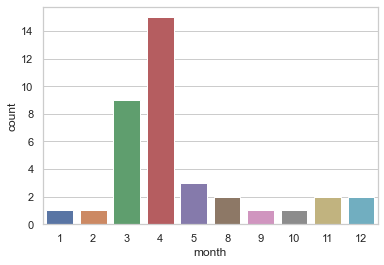

In [11]:
#fig = sns.countplot(count_month, x="month", y="count")
fig = sns.barplot(x="month", y="count", data=count_month)
#fig.show()

Este paso tiene como único objetivo concatenar todo el texto de las noticias por mes.

In [12]:
data_month = data.groupby(['month'])['Noticia'].apply(' '.join).reset_index()
data_month = data_month.set_index('month')
data_month

Noticia
month                                                   
1       Actualmente, el INS mantiene asegurados a 1.4...
2       Sin que tengamos claridad de los resultados f...
3      Eduardo Cruickshank, de Restauración Nacional,...
4      Varias entidades financieras reportaron este l...
5      El portal suplanta las identidades de la Super...
8       El 7 de abril, las operadoras de pensiones em...
9      Desde el pasado 6 de marzo Costa Rica reportó ...
10      Foto: Jorge Navarro La crisis del coronavirus...
11      Debido a la pandemia causada por el virus de ...
12      A inicios de diciembre, así lucía la avenida ...

#### Limpieza de datos
En esta etapa se aplican filtros de limpieza que suelen usarse en los textos:

* Pasar textos a minúsculas
* Quitar signos de puntuación
* Quitar espacios extras y tabulaciones

In [13]:
def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
 
round1 = lambda x: clean_text_round1(x)
 
data_clean = pd.DataFrame(data_month.Noticia.apply(round1))

def clean_text_round2(text):
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text
 
round2 = lambda x: clean_text_round2(x)
 
data_clean = pd.DataFrame(data_clean.Noticia.apply(round2))
data_clean

Noticia
month                                                   
1       actualmente  el ins mantiene asegurados a    ...
2       sin que tengamos claridad de los resultados f...
3      eduardo cruickshank  de restauración nacional ...
4      varias entidades financieras reportaron este l...
5      el portal suplanta las identidades de la super...
8       el  de abril  las operadoras de pensiones emp...
9      desde el pasado  de marzo costa rica reportó e...
10      foto  jorge navarro la crisis del coronavirus...
11      debido a la pandemia causada por el virus de ...
12      a inicios de diciembre  así lucía la avenida ...

A partir del conjunto de datos limpio, se crea un "Bag of Words" contando el número de veces que una palabra aparece en las noticias y calculando la frecuencia de las mismas. En este paso, se incluye la lectura de las "stopwords" en español desde nuestro repositorio, las cuales nos permiten filtrar palabras vacías o sin significado para nuestro análisis como articulos, pronombres, preposiciones, etc.

In [14]:
master = "D:\Personal\Maestria BigData\Trabajo Fin Master\SinSignificado.txt"
#req = requests.get(r'D:\Personal\Maestria BigData\Trabajo Fin Master\SinSignificado.txt')
#req = pd.read_fwf(r'D:\Personal\Maestria BigData\Trabajo Fin Master\SinSignificado.txt', header=None,encoding = 'utf8')
with open(r'D:\Personal\Maestria BigData\Trabajo Fin Master\SinSignificado.txt', "r",encoding = 'utf8') as archivo:
    lista = [linea.rstrip() for linea in archivo]

In [15]:
cv = CountVectorizer(stop_words=lista)
#print(data_clean.Noticia)
#print(cv)
data_cv = cv.fit_transform(data_clean.Noticia)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
 
data_dtm

aarón  abandonar  abarcaban  abierta  abogada  abogados  abriendo  \
month                                                                      
1          0          0          0        0        0         0         0   
2          0          0          0        0        0         0         0   
3          0          0          1        1        0         0         0   
4          0          0          0        0        0         0         1   
5          0          0          0        0        0         0         0   
8          1          0          0        0        0         0         0   
9          0          1          0        0        0         0         0   
10         0          0          0        0        1         1         0   
11         0          0          0        0        0         0         0   
12         0          0          0        0        0         0         0   

       abril  abrir  abuelos  ...  ágil  ágiles  álvaro  ámbito  área  áreas  \
month                         ...                                              
1          1      0        0  ...     0       0       0       0     0      0   
2          0      0        1  ...     0       0       0       0     0      0   
3          3      1        0  ...     1       0       3       1     1      0   
4          8      1        0  ...     0       2       0       0     2      0   
5          1      1        0  ...     0       0       0       0     0      0   
8          8      0        0  ...     0       0       0       0     0      0   
9          0      0        0  ...     0       0       0       0     0      0   
10         0      0        0  ...     0       0       0       0     0      0   
11         0      0        0  ...     0       0       0       0     0      1   
12         0      0        0  ...     0       0       0       0     0      0   

       época  única  únicamente  único  
month                                   
1          0      0           0      0  
2          0      0           0      0  
3          0      1           0      0  
4          1      0           1      1  
5          0      0           0      0  
8          0      0           0      0  
9          0      0           1      0  
10         0      0           0      0  
11         0      0           0      0  
12         0      0           0      0  

[10 rows x 3327 columns]

## Análisis exploratorio

Con el dataframe transpuesto se inicia la exploración del dataset.

In [16]:
dt_data = data_dtm.transpose()
dt_data.head()

month      1   2   3   4   5   8   9   10  11  12
aarón       0   0   0   0   0   1   0   0   0   0
abandonar   0   0   0   0   0   0   1   0   0   0
abarcaban   0   0   1   0   0   0   0   0   0   0
abierta     0   0   1   0   0   0   0   0   0   0
abogada     0   0   0   0   0   0   0   1   0   0

Se extraen las palabras más usadas por meses, identificando las palabras como covid y sus sinónimos, FCL, jornada, reducción, estas palabras forman parte de la conversación habitual en las notas periodisticas sobre los FCL.

In [17]:
top_dict = {}
for c in dt_data.columns:
    top = dt_data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

for month, top_words in top_dict.items():
    print(month)
    print(', '.join([word+' '+str(count) for word, count in top_words[0:14]]))

1
ins 9, aviso 5, trabajadores 4, contagio 4, ccss 4, instituto 3, caso 3, covid 3, accidente 3, trabajador 3, nacional 3, casos 3, virus 3, centros 3
2
renta 9, trabajadores 6, año 5, declaración 5, global 5, proyecto 4, gastos 4, ingresos 4, colones 3, ley 3, ingreso 3, trabajador 3, contribuyentes 3, deberán 3
3
fcl 38, proyecto 21, personas 20, nacional 19, trabajadores 19, laboral 19, pandemia 18, pensiones 18, banco 16, height 16, datawrapper 16, emergencia 16, ley 16, retiro 16
4
laboral 33, pensiones 33, fcl 30, ley 27, personas 24, covid 17, suspensión 16, fondo 16, jornada 16, horas 16, contrato 16, reducción 15, emergencia 15, operadoras 14
5
ingreso 9, fuentes 9, personas 8, idea 6, generar 6, covid 6, cuarentena 5, proceso 5, persona 5, alfaro 5, mercado 4, crear 4, negocio 4, forma 4
8
millones 13, datos 12, covid 10, fcl 9, ingresos 9, personas 8, pensiones 8, abril 8, bancarias 6, estafadores 6, judicial 6, información 6, fraudes 6, víctimas 5
9
migración 6, extranjería

Dentro de este listado se observa que hay varias palabras muy usadas sin un significado útil para el análisis. Por lo que se procede a crear una lista de las palabras menos usadas, para posteriormente unificarlo a nuestro listado de stopwords. 

In [18]:
from collections import Counter

words = []
for anio in dt_data.columns:
    top = [word for (word, count) in top_dict[anio]]
    for t in top:
        words.append(t)
print(Counter(words).most_common())
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[('covid', 7), ('trabajadores', 5), ('personas', 5), ('laboral', 5), ('nacional', 4), ('ley', 4), ('fcl', 4), ('pandemia', 4), ('pensiones', 4), ('emergencia', 4), ('caso', 3), ('trabajador', 3), ('proyecto', 3), ('ingresos', 3), ('ingreso', 3), ('marzo', 3), ('banco', 3), ('lea', 3), ('país', 3), ('suspensión', 3), ('contrato', 3), ('medida', 3), ('contagio', 2), ('virus', 2), ('salud', 2), ('caja', 2), ('presentar', 2), ('año', 2), ('retiro', 2), ('operadoras', 2), ('fondo', 2), ('coronavirus', 2), ('jornada', 2), ('reducción', 2), ('rica', 2), ('importante', 2), ('información', 2), ('empresas', 2), ('medidas', 2), ('laborales', 2), ('acuerdo', 2), ('pago', 2), ('contratos', 2), ('relación', 2), ('temporal', 2), ('ins', 1), ('aviso', 1), ('ccss', 1), ('instituto', 1), ('accidente', 1), ('casos', 1), ('centros', 1), ('atención', 1), ('territorio', 1), ('brindadas', 1), ('contagiados', 1), ('paciente', 1), ('atenciones', 1), ('correo', 1), ('colaboradores', 1), ('consultasrt', 1), ('as

['covid']

En este paso, se actualiza la "Bag of Words" que se quitaran del conjunto de datos. Algunas de ellas se pueden incorporar manualmente a la lista.

In [19]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

stop_words = lista #req.text.split(sep='\n')
for pal in add_stop_words:
    stop_words.append(pal)
more_stop_words=['mesa','aviso','caso','debe','horas','dato','idea','día','nuevo','según','si','hora','año','function', 'recomendamos', 'además', 'intermediate', 'display','ad','gpt','dijo','div','más','también', 'interarticle','pues','parte','está', 'cmd', 'push', 'googletag','alex','lucas','andrés','mirta','tres','primer','primera','dos','uno','veces', 'así', 'luego', 'quizá','cosa','cosas','tan','asi','cualquier','cuales','así','foto','hogar','pepe']
for pal in more_stop_words:
    stop_words.append(pal)

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Noticia)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

### **Nubes de palabras por mes**
Se generan nubes de palabras para identificar los topicos principales por meses. Observando que en el mes de Julio, se mencionó varias veces la reapertura de servicios de comida en varias regiones del país.

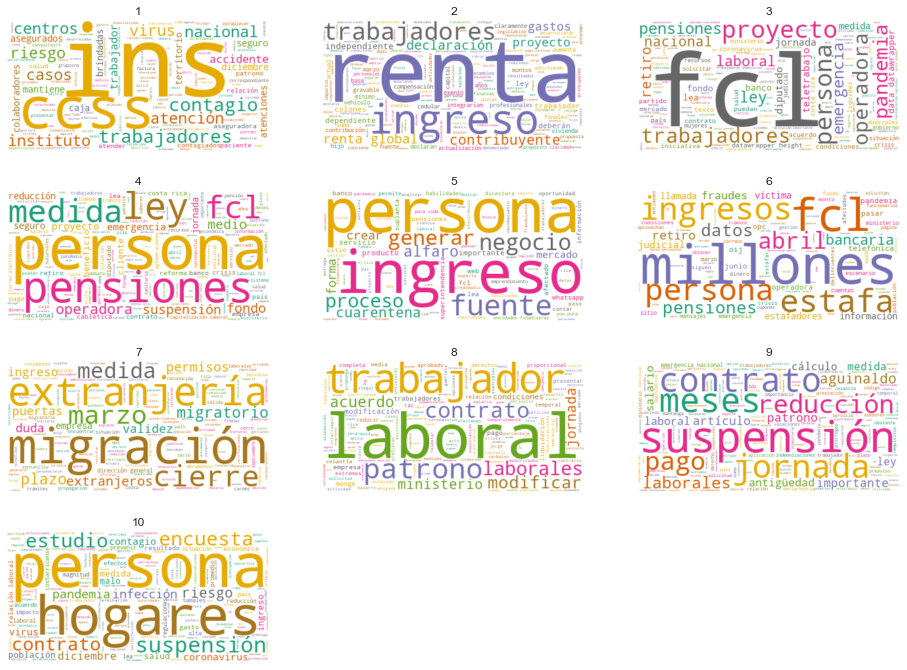

In [20]:
from wordcloud import WordCloud
anios = ['1','2','3','4','5','6','7','8','9','10','11','12']

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]

for index, mes in enumerate(dt_data.columns):
    wc.generate(data_clean.Noticia[mes])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(anios[index])
plt.show()

## **Análisis de sentimientos**
Para cada noticia se analiza su polaridad y subjetividad, la primera asigna un valor positivo o negativo dependiendo del sentimiento identificado. 

# ADVERTENCIA: Este fragmento del código tarda debido a la traducción al idioma inglés con el módulo textblob.

In [21]:
import nltk
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
pol2 = lambda x: x.sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
sub2 = lambda x: x.sentiment.subjectivity

traducir = lambda x: TextBlob(x).translate(to="en")

data['blob_en'] = data['Noticia'].apply(traducir)
data['polarity'] = data['blob_en'].apply(pol2)
data['subjectivity'] = data['blob_en'].apply(sub2)
data.to_csv('translated_news.csv', index=False) # Generación del archivo que contiene las noticias traducidas

Este dataframe (mismo que se genera en el paso anterior), contiene las notas periodisticas traducidas al idioma inglés.

In [22]:
data = pd.read_csv(r'C:\Users\OREAMUNOAE\Desktop\Maestria\translated_news.csv',sep=',',encoding = 'utf8')
#data = data.drop("Unnamed: 0", axis=1)
data

Keywords                                             Titulo  \
0               Covid, FCL  Crisis disparó retiros del FCL en operadoras d...   
1               Covid, FCL   #NoComaCuento: Sitio web para supuesto retiro...   
2               Covid, FCL   Delincuentes descubren en covid-19 una novedo...   
3               Covid, FCL   CCSS habilita plataforma web para conocer dón...   
4               Covid, FCL   Diputados aprueban entrega del FCL a asalaria...   
5               Covid, FCL   Jefes de fracción debaten plan sobre entrega ...   
6               Covid, FCL   Gobierno estima que hasta 500.000 asalariados...   
7               Covid, FCL   #NoComaCuento: Delincuentes utilizan posible ...   
8               Covid, FCL   Grupo de diputados sugiere texto para entrega...   
9   Covid, Jornada Laboral        Digitalización y retos del Derecho Laboral,   
10  Covid, Jornada Laboral   Trabajadoras domésticas convivieron con fuert...   
11  Covid, Jornada Laboral   Impacto de propuesta de renta global para los...   
12  Covid, Jornada Laboral   INS ha pagado más de ¢1.000 millones a la CCS...   
13  Covid, Jornada Laboral   25 de cada 100 ticos planean romper su burbuj...   
14  Covid, Jornada Laboral    Suspensión y Extinción del Contrato de Trabajo,   
15  Covid, Jornada Laboral   Aguinaldo, vacaciones y cesantía en casos de ...   
16  Covid, Jornada Laboral                   Reducción de jornadas laborales,   
17  Covid, Jornada Laboral   Asesoría jurídica: Lo que debe saber ante cua...   
18  Covid, Jornada Laboral            Situación migratoria ante la covid-19 ,   
19  Covid, Jornada Laboral          ¿Cómo generar nuevas fuentes de ingreso?,   
20  Covid, Jornada Laboral   Cabletica rebajará cuota a clientes que sufri...   
21  Covid, Jornada Laboral   Jueza urge ley para evitar apremio de obligad...   
22  Covid, Jornada Laboral   Coronavirus: La permuta de tiempo no laborado...   
23  Covid, Jornada Laboral   Corte Plena implementa jornada laboral de sei...   
24  Covid, Jornada Laboral   Cómo implementar el teletrabajo como medida d...   
25              Covid, FCL  Diputados avalan en segundo debate que asalari...   
26              Covid, FCL    Congreso aprueba flexibilizar retiro del FCL...   
27              Covid, FCL   ¿Cuál es el proceso de vacunación contra COVI...   
28              Covid, FCL   Esté alerta: Rufianes electrónicos usan FCL c...   
29              Covid, FCL   COVID-19 impulsa cambios en mercado de seguro...   
30              Covid, FCL   ¿Y si no sé dónde tengo mi Fondo de Capitaliz...   
31              Covid, FCL   Operadoras de Pensiones todavía no pueden ent...   
32              Covid, FCL   Banco Nacional listo para entregar FCL pero s...   
33              Covid, FCL   Ministro Salas: Esperen instrucciones de los ...   
34              Covid, FCL   (ENTREVISTA) Alvarado presentará la próxima s...   
35              Covid, FCL   Operadores de Pensiones piden condicionar a d...   
36              Covid, FCL   Colapso del sistema de pensiones sería antes ...   

                                                Autor                Fecha  \
0                                      Yeryis Salas.,  2020-08-22 00:00:00   
1                                      Nicole Pérez.,  2020-05-12 00:00:00   
2                                 Eillyn Jiménez B..,  2020-08-04 00:00:00   
3                              José Andrés Céspedes.,  2020-04-15 00:00:00   
4                                    Aarón Sequeira.,  2020-04-01 00:00:00   
5                                    Aarón Sequeira.,  2020-03-31 00:00:00   
6                                    Aarón Sequeira.,  2020-03-28 00:00:00   
7                                      Nicole Pérez.,  2020-03-26 00:00:00   
8                                        Josué Bravo.  2020-03-25 00:00:00   
9    Café Laboral, Alejandro Trejos G. Socio BDS A...  2021-04-30 16:45:00   
10                                   Andrea Hidalgo.,  2021-03-27 00:00:00   
11 

### **Visualización sobre las métricas subjetividad y polaridad en las noticias**
Se genera una visualización global con las métricas de subjetividad y polaridad de tal modo que se pueda observar que tipos de sentimientos predominaron durante el año 2020, observando que gran parte de las noticias se basaron en hechos y no en opiniones, y que el sentimiento que predomino principalemente fue el positivo aunque muy cercano a un estado neutral.

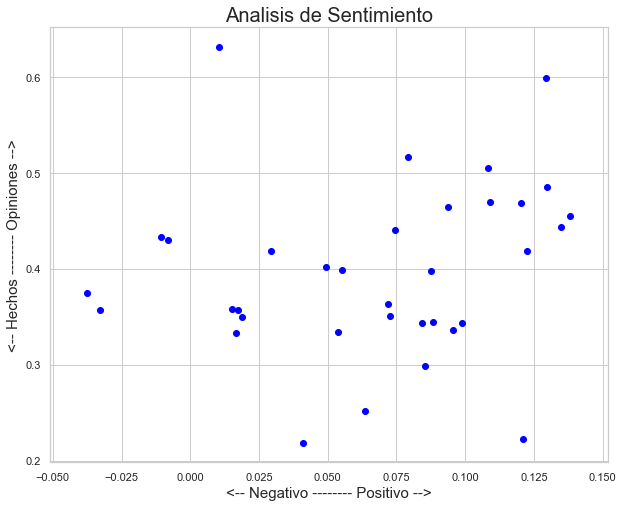

In [23]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, anio in enumerate(data.index):
    x = data.polarity.loc[anio]
    y = data.subjectivity.loc[anio]
    plt.scatter(x, y, color='blue')
    #plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-0.051, 0.152) 
    
plt.title('Analisis de Sentimiento', fontsize=20)
plt.xlabel('<-- Negativo -------- Positivo -->', fontsize=15)
plt.ylabel('<-- Hechos -------- Opiniones -->', fontsize=15)

plt.show()

### **Distribución de la polaridad**
Con esta distribución de la polaridad, se corrobora lo anteriormente mencionado.

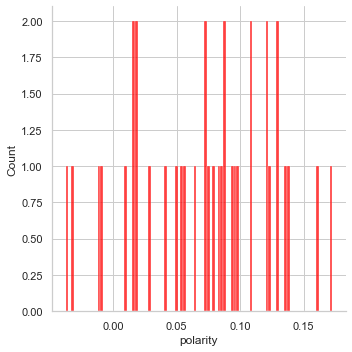

In [24]:
#fig = px.histogram(data, x="polarity", nbins=50)
#fig.show()
#fig = sns.countplot(count_month, x="month", y="count")
#fig = sns.barplot(data,x="polarity", nbins=50 )
sns.displot(data['polarity'], kde=False, color='red', bins=100)
#fig.show()

###### **Serie de tiempo: Polaridad y fecha de publicación de la nota periodística**
Finalmente, para este análisis de sentimientos se ordenan los registros por fecha para generar una visualización por día de publicación y su polaridad de tal manera que se pueda identificar que días se predominaron noticias más positivas o negativas. Observando que el 26 y 31 de marzo y 22 de setiembre se tuvieron las noticias con mayor percepción negativa y el 8 de octubre y 5 y 24 de noviembre con mayor positividad.

In [25]:
data = data.sort_values(by=['Fecha'])

<ipython-input-26-75acf9b4a65e>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels=data['Fecha'],rotation=75)


<function matplotlib.pyplot.show(close=None, block=None)>

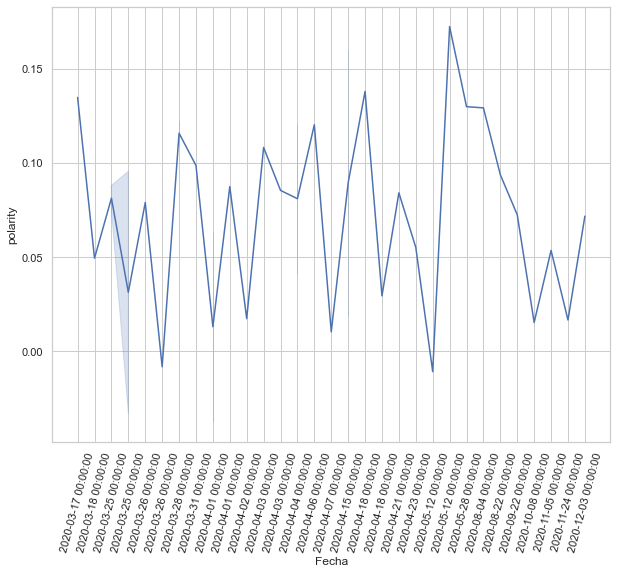

In [26]:
g=sns.lineplot(data=data, x="Fecha", y="polarity")
g.set_xticklabels(labels=data['Fecha'],rotation=75)
plt.show

### Estadísticas descriptivas

In [81]:
# NO le veo valor agregado
df_raw2[cat_cols].describe(include='all')

RangoEdad  Genero EstadoCivil   RangoSalario  RangoSalarioRetorno  \
count       424865  424865      424865  424865.000000        424865.000000   
unique           4       3           6            NaN                  NaN   
top     Entre31y45       M         SLT            NaN                  NaN   
freq        181457  279819      233641            NaN                  NaN   
mean           NaN     NaN         NaN       1.695604             1.063105   
std            NaN     NaN         NaN       0.850357             1.074943   
min            NaN     NaN         NaN       1.000000             0.000000   
25%            NaN     NaN         NaN       1.000000             0.000000   
50%            NaN     NaN         NaN       2.000000             1.000000   
75%            NaN     NaN         NaN       2.000000             2.000000   
max            NaN     NaN         NaN       6.000000             6.000000   

        Pensionado  TuvoReduccion  
count     424865.0  424865.000000  
unique         NaN            NaN  
top            NaN            NaN  
freq           NaN            NaN  
mean           0.0       0.172111  
std            0.0       0.377477  
min            0.0       0.000000  
25%            0.0       0.000000  
50%            0.0       0.000000  
75%            0.0       0.000000  
max            0.0       1.000000

In [82]:
#No le veo valor agregado
df_raw2[num_cols].describe()

HayAportes         Brecha  InactivoPostUltAporte  InactivoPostRetiro
count  424865.000000  424865.000000          424865.000000       424865.000000
mean        2.433451       0.632500               3.432471            2.333106
std         2.926957       1.045776               3.975355            3.639625
min         0.000000      -5.000000              -1.000000           -1.000000
25%         0.000000       0.000000              -1.000000            0.000000
50%         1.000000       1.000000               3.000000            0.000000
75%         4.000000       1.000000               7.000000            4.000000
max        12.000000       6.000000              11.000000           11.000000

### Revisar

Based on numerical columns descriptive analysis, average tenure, average monthly charges and total charges of subscriber is **32 months, 64 dollars and 2282 dollars**, respectively.

In [83]:
def Outlier_boxplot(df, col):
    """ Display boxplot for given column """
    sns.boxplot(x=df[col])
    plt.show()

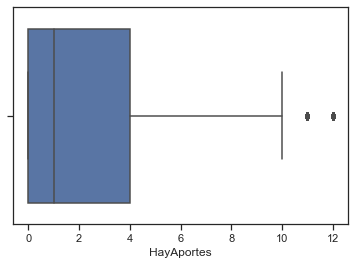

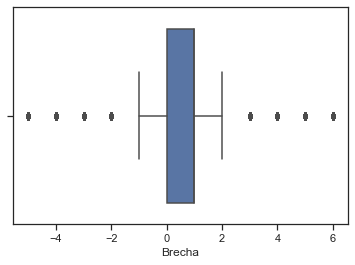

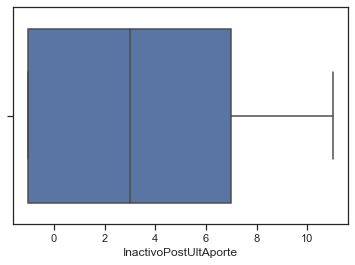

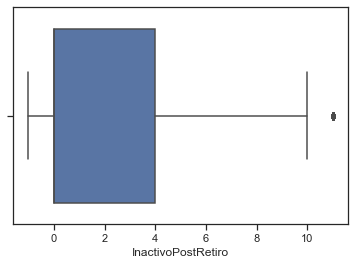

In [84]:
for i in num_cols:
    Outlier_boxplot(df_raw2,i) #df_cal

Box plot graphs shows that **none** of the numerical columns have outliers.

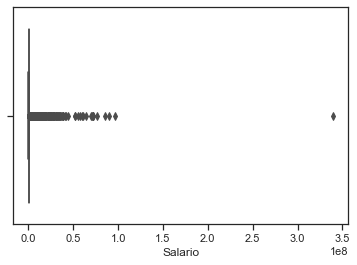

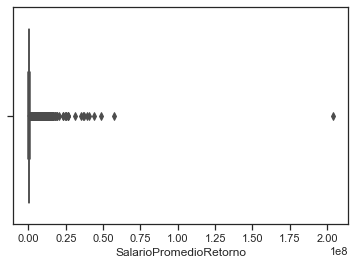

In [85]:
for i in monto_cols:
    Outlier_boxplot(df_raw2,i) #df_cal

### Calcula tasa desempleo por COVID

In [86]:
df_raw2.head().T

0            1            2            3  \
edad                             71           64           64           63   
RangoEdad               entre59y100  entre59y100  entre59y100  entre59y100   
Genero                            F            F            F            F   
EstadoCivil                     SLT          VID          VID          CSD   
Salario                       61400   1.3448e+06       717233  1.49417e+06   
RangoSalario                      1            4            2            4   
HayAportes                        2            1            0            2   
SalarioPromedioRetorno        61400       717233          NaN  1.64318e+07   
RangoSalarioRetorno               1            2            0            6   
Brecha                            0            2            2           -2   
InactivoPostRetiro                0            0            8            1   
InactivoPostUltAporte             2            8            8            0   
Pensionado                        0            0            0            0   
TuvoReduccion                     0            1            0            0   
Desempleado                      Si           Si           Si           Si   

                                  4  
edad                             63  
RangoEdad               entre59y100  
Genero                            F  
EstadoCivil                     CSD  
Salario                 3.15207e+07  
RangoSalario                      6  
HayAportes                        1  
SalarioPromedioRetorno   1.3429e+06  
RangoSalarioRetorno               4  
Brecha                            2  
InactivoPostRetiro                3  
InactivoPostUltAporte             0  
Pensionado                        0  
TuvoReduccion                     1  
Desempleado                      Si

In [87]:
df_raw2['Desempleado'] = df_raw2.Desempleado.map({'Si':1,'No':0})

### Correlation

In [36]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri

    fig,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()

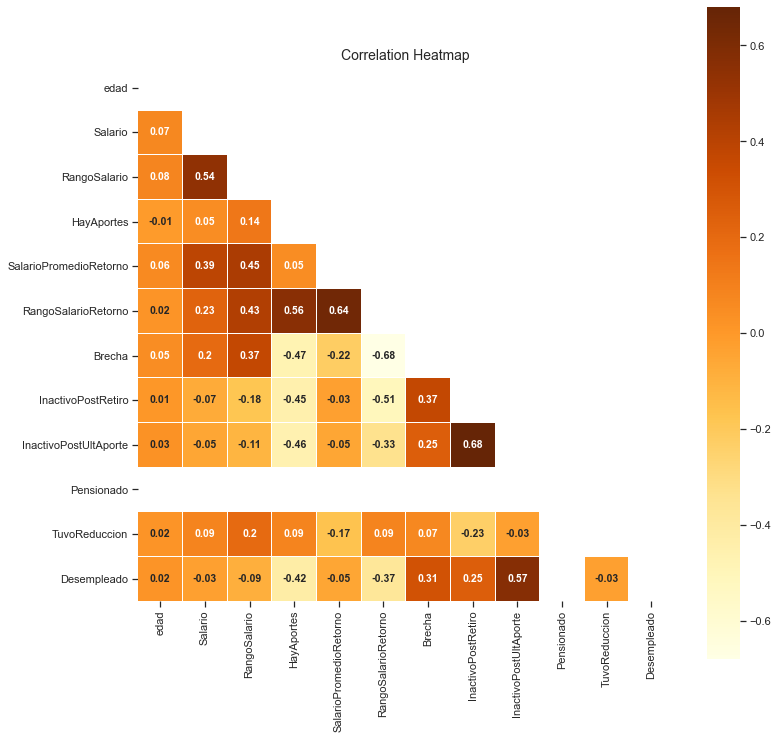

In [37]:
var_corr = round(df_raw2.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

From correlation matrix, features like **tenure, Monthly charges and Total charges** are highly correlated with services like MultipleLines of phone services and Internet services like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and Streaming Movies services.

### Distribución de Variables según desempleado

#### Distribución de variables categóricas y binarias

In [38]:
def Create_data_label(ax):
    """ Display data label for given axis """
    for bar in ax.patches:
            ax.text(bar.get_x() + bar.get_width()/ 2
                    , bar.get_height() + 0.01
                    , str(round(100 * bar.get_height(),2)) + '%'
                    , ha = 'center'
                    , fontsize = 13)
            
            
def Categorical_var_dist(data, cols, distribution_col):
    """ Distribution of categorical variable based on target variable """
    
    for i,feature in enumerate(cols):
        
        feature_summary = data[feature].value_counts(normalize=True).reset_index(name='Porcentaje')
        
        plt_cat = sns.catplot(x=feature
                , y='Porcentaje'
                , data = feature_summary
                , col=distribution_col
                , kind='bar'
                , aspect = 0.8
                , palette = plotColor
                , alpha = 0.6)
        
        if feature == 'RangoSalario':
            plt_cat.set_xticklabels(rotation= 65, horizontalalignment = 'right')

        if feature == 'RangoSalarioRetorno':
            plt_cat.set_xticklabels(rotation= 65, horizontalalignment = 'right')
            
        for ax1, ax2 in plt_cat.axes:
            Create_data_label(ax1)
            Create_data_label(ax2)
        
        plt.ylim(top=1)
        plt.subplots_adjust(top = 0.9)
        plt.gcf().suptitle(feature+" distribución",fontsize=14)
    plt.show()            

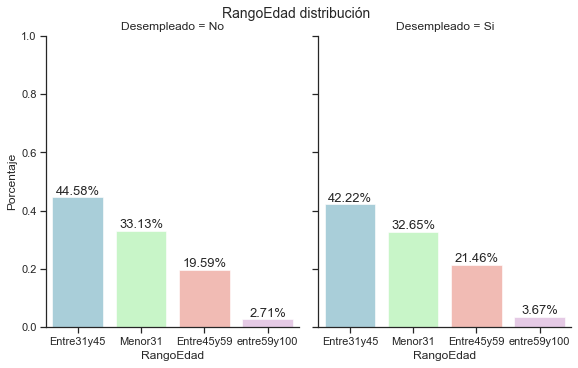

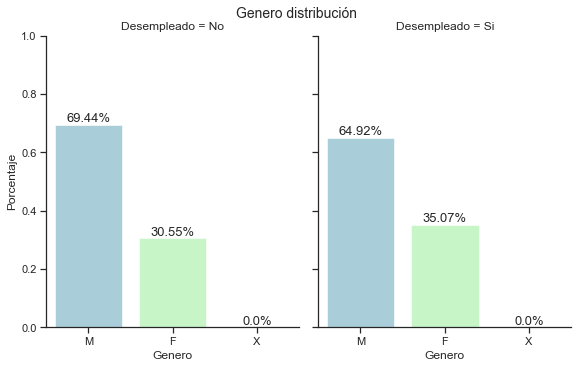

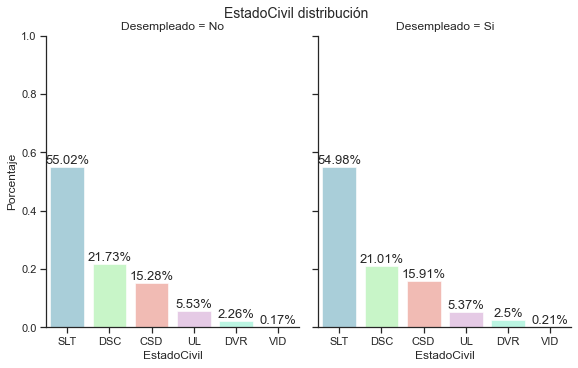

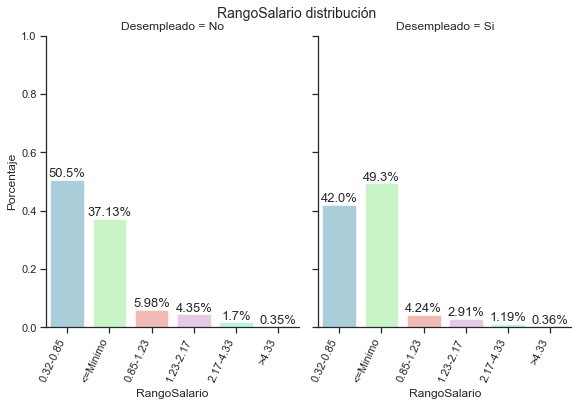

posx and posy should be finite values
posx and posy should be finite values


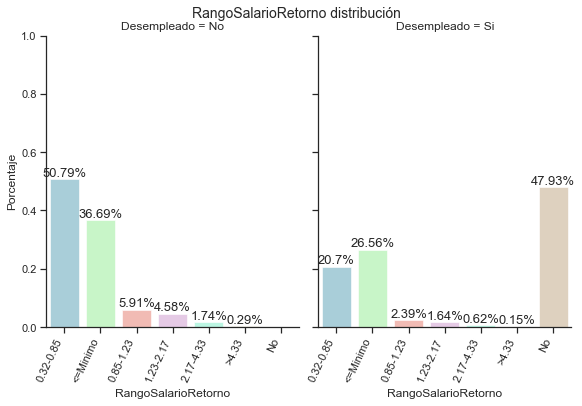

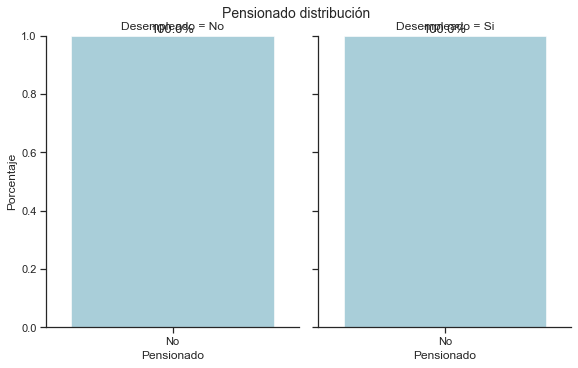

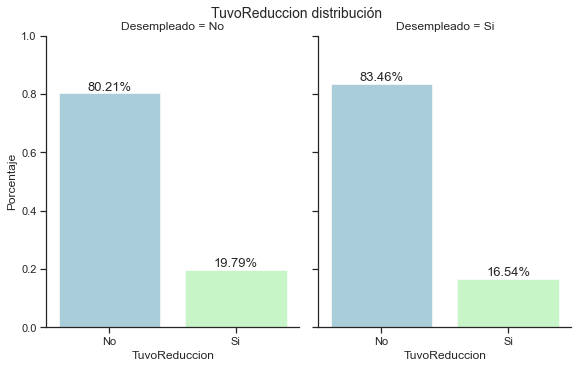

In [39]:
suma_desempleado = df_raw.groupby('Desempleado')
Categorical_var_dist(suma_desempleado, cat_cols,'Desempleado')

From above analysis, churn customers are likely to

* not have partners and Dependents; Means likely to be Single.
* have Internet service and specifically Fiber optics
* not have online security service, online backup service, device protection service, Tech support service
* have streaming TV and streaming Movies services
* be with monthly based contract
* have paperless billing service
* have electronic check payment method

### Distribution of Tenure, Monthly Charges and Total Charges

In [41]:
# Mean summary of customers (Churn vs Non churn)
print(suma_desempleado[['edad','Salario','SalarioPromedioRetorno']].mean())

                  edad        Salario  SalarioPromedioRetorno
Desempleado                                                  
No           36.542610  521009.387228           521723.412905
Si           37.084237  438280.173775           438094.718603


Result shows that Churn customers have more Monthly charges compared to existing customers.
Also, there is a drastic difference in Tenure and Total Charges for Churn vs existing customers.

Let's check distribution of each features with target variable.

El resultado muestra que los trabajadores que quedaron desempleados tenían un salario promedio mensual inferior a los que se quedaron. Y los que regresaron, lo hicieron por salarios simiares en promedio.

Con respecto a la edad promedio no hay mucha diferencia

Comprobaremos la distribución de cada característica con la variable de destino.

### Se identificarán los salario anomalos.

In [42]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [0.5, 99.5])  #Antes 25 y 75
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
    return outliers

In [44]:
for i in monto_cols:
    detect_outlier((df_raw[i]))
    
#print(detect_outlier((df_raw['Salario'])))
#print(detect_outlier((df_raw['SalarioPromedioRetorno'])))

### Ajustamos valores anomalos

In [46]:
# Cambiando los anomalos a la media
'''
for j in monto_cols:    
    media = np.mean(df_raw1[j])
    #print(media)
    outliers = detect_outlier(df_raw1[j])
    #print(len(outliers))
    if len(outliers)>0:
        for i in range(0,len(df_raw1)):
            if df_raw1[j][i] in outliers: ##== -200:
                #print(df_raw1[j][i])
                df_raw1[j][i] = media
'''                
### eliminando los anomalos, pero colocando el anterior, no parece muy aceptable
for j in monto_cols:    
    media = np.mean(df_raw1[j])
    #print(media)
    outliers = detect_outlier(df_raw1[j])
    #print(len(outliers))
    if len(outliers)>0:
        for i in range(0,len(df_raw1)):
            if df_raw1[j][i] in outliers: ##== -200:
                print(df_raw1[j][i])
                #df_raw1 = df_raw1.drop(df_raw1[df_raw1['Salario']==df_raw1[j][i]].index)
                #df_raw1[j][i] = media
        
df_raw1 = df_raw1.reset_index(drop=True)        
#df_raw1.drop(detect_outlier((df_raw['Salario'])), inplace = True)
#df_raw1.drop(detect_outlier((df_raw['SalarioPromedioRetorno'])), inplace = True)

In [47]:
df_raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424575 entries, 0 to 424574
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   edad                    424575 non-null  float64
 1   RangoEdad               424575 non-null  object 
 2   Genero                  424575 non-null  object 
 3   EstadoCivil             424575 non-null  object 
 4   Salario                 424575 non-null  float64
 5   RangoSalario            424575 non-null  object 
 6   HayAportes              424575 non-null  float64
 7   SalarioPromedioRetorno  263372 non-null  float64
 8   RangoSalarioRetorno     424575 non-null  object 
 9   Brecha                  424575 non-null  float64
 10  InactivoPostRetiro      424575 non-null  float64
 11  InactivoPostUltAporte   424575 non-null  float64
 12  Pensionado              424575 non-null  object 
 13  TuvoReduccion           424575 non-null  object 
 14  Desempleado         

## 3. Cluster Analysis

Comprobaremos si existe alguna relación entre la edad y el salario recibido.

In [48]:
#df_raw.Desempleado
df_raw1['Desempleado_code'] = df_raw1['Desempleado'].map({'Si': 1,'No': 2}).astype(int)

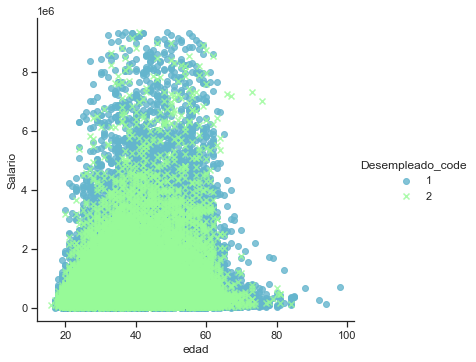

In [49]:
sns.lmplot(x='edad'
           ,y='Salario'
           ,data=df_raw1
           ,hue='Desempleado_code'
            ,fit_reg=False
            ,markers=["o", "x"]
            ,palette= plotColor)
plt.show()

** A partir del análisis, hay algunos grupos basados en la edad y el salario anterior. ** 

Aplicaremos el algoritmo de clúster de K-means para ver los clústeres. Antes de pasar datos al algoritmo K-means, es necesario normalizar las variables

In [50]:
def Normalize_feature(feature):
    """ Return normalized features """
    return prepro.StandardScaler().fit_transform(feature)

In [51]:
# normalized tenure and monthlycharges

df_raw1['edad_norm'] = Normalize_feature(df_raw1[['edad']])
df_raw1['salario_norm'] = Normalize_feature(df_raw1[['Salario']])
df_raw1.head()

edad    RangoEdad Genero EstadoCivil     Salario RangoSalario  HayAportes  \
0  71.0  entre59y100      F         SLT    61400.00     <=Minimo         2.0   
1  64.0  entre59y100      F         VID  1344800.00    1.23-2.17         1.0   
2  64.0  entre59y100      F         VID   717233.33    0.32-0.85         0.0   
3  63.0  entre59y100      F         CSD  1494166.67    1.23-2.17         2.0   
4  63.0  entre59y100      F         CSD  1559400.00    1.23-2.17         0.0   

   SalarioPromedioRetorno RangoSalarioRetorno  Brecha  InactivoPostRetiro  \
0                61400.00            <=Minimo     0.0                 0.0   
1               717233.33           0.32-0.85     2.0                 0.0   
2                     NaN                  No     2.0                 8.0   
3             16431816.67               >4.33    -2.0                 1.0   
4                     NaN                  No     4.0                 0.0   

   InactivoPostUltAporte Pensionado TuvoReduccion Desempleado  \
0                    2.0         No            No          Si   
1                    8.0         No            Si          Si   
2                    8.0         No            No          Si   
3                    0.0         No            No          Si   
4                    0.0         No            No          Si   

   Desempleado_code  edad_norm  salario_norm  
0                 1   3.186518     -0.722864  
1                 1   2.531140      1.714103  
2                 1   2.531140      0.522456  
3                 1   2.437514      1.997725  
4                 1   2.437514      2.121593

In [52]:
def Create_elbow_curve(data):
    """ Display elbow curve for K-means algo for given data """
    df_kmeans_data = data

    k = range(1,10)
    kmeans = [KMeans(n_clusters=i) for i in k]

    score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]

    plt.figure(figsize=(10,6))
    plt.plot(k,score)
    plt.xlabel("Clusters")
    plt.ylabel("Score")
    plt.title("Elbow curve",fontsize=15)
    plt.show()

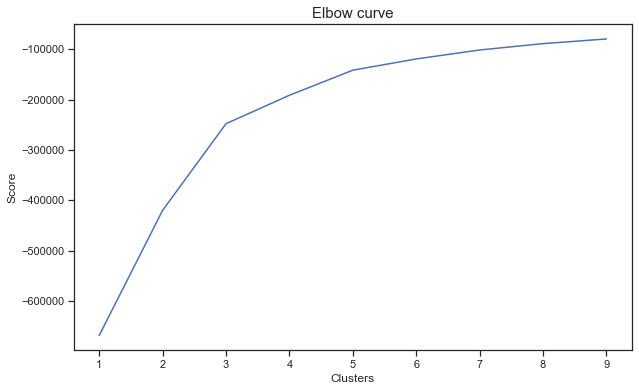

In [53]:
# checking number of clusters

Create_elbow_curve(df_raw1[df_raw1.Desempleado_code==1][['edad_norm','salario_norm']])

De la curva elbow, 5 parece más ser el número más eficiente.

In [54]:
def Create_kmeans_cluster_graph(df_cal, data, n_clusters, x_title, y_title, chart_title):
    """ Display K-means cluster based on data """
    
    kmeans = KMeans(n_clusters=n_clusters # No of cluster in data
                    , random_state = random_state # Selecting same training data
                   ) 

    kmeans.fit(data)
    kmean_colors = [plotColor[c] for c in kmeans.labels_]


    fig = plt.figure(figsize=(12,8))
    plt.scatter(x= x_title + '_norm'
                , y= y_title + '_norm'
                , data=data 
                , color=kmean_colors # color of data points
                , alpha=0.25 # transparancy of data points
               )

    plt.xlabel(x_title)
    plt.ylabel(y_title)

    plt.scatter(x=kmeans.cluster_centers_[:,0]
                , y=kmeans.cluster_centers_[:,1]
                , color='black'
                , marker='X' # Marker sign for data points
                , s=100 # marker size
               )
    
    plt.title(chart_title,fontsize=15)
    plt.show()
    
    return kmeans.fit_predict(df_cal[df_cal.Desempleado_code==1][[x_title+'_norm', y_title +'_norm']])    

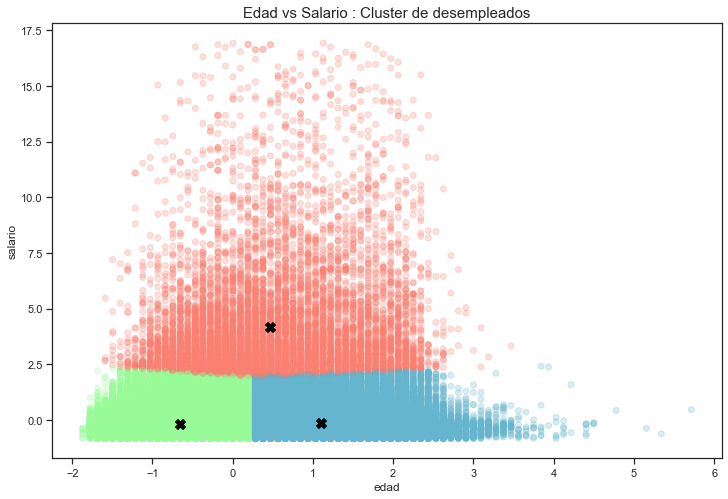

array([ 0, -1,  2,  1], dtype=int64)

In [55]:
df_raw1['Cluster'] = -1 # by default set Cluster to -1
df_raw1.loc[(df_raw1.Desempleado_code==1),'Cluster'] = Create_kmeans_cluster_graph(df_raw1
                            ,df_raw1[df_raw1.Desempleado_code==1][['edad_norm','salario_norm']]
                            ,3  ## Clusters
                           ,'edad'
                           ,'salario'
                           ,"Edad vs Salario : Cluster de desempleados")

df_raw1['Cluster'].unique()

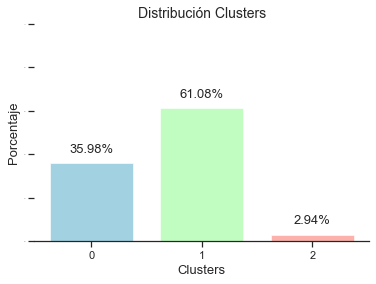

In [56]:
# Distribution of clusters
Desempleado_distribucion =  df_raw1[df_raw1['Desempleado_code']==1].Cluster.value_counts(normalize=True).sort_index()

Generate_bar_graph( x= Desempleado_distribucion.index
                   , y = Desempleado_distribucion.values
                   , x_title = 'Clusters'
                   , y_title = 'Porcentaje'
                   , chart_title = 'Distribución Clusters'
                  , color = plotColor)

Con base en el gráfico de clusters de K-medias, podemos ver que hay tres grupos y dos con poco aporte. 

* Edades altas y salarios altos (grupo verde) 
* Edades intermedias y salarios bajos (grupo celeste) 
* Baja edad y bajos ingresos (grupo turquesa) 
* Edades laborales e ingresos intermedios (grupo lila)
* Rango de edad amplio e ngresos altos (grupo rojo)

Y el gráfico de distribución muestra que alrededor del 70% de los desempleados pertenecen a los clúster celeste y turquesa, que destacan por sus bajos ingresos.

Con 3 cluster el analisis salió muy parecido.

* Edades de jovenes a intermedias y salarios bajos a intermedios (grupo celeste) 
* Edades intermedias a mayores y salarios bajos a intermedios (grupo rojo) 
* Rango de edad amplio e ingresos intermedios a altos (grupo verde)

Y el gráfico de distribución muestra que alrededor del 97% de los desempleados pertenecen a los clúster celeste y rojo, que destacan por sus bajos ingresos.

Revisemos los promedios de edades y salarios por cluster.

In [57]:
df_cluster_gp = df_raw1[df_raw1['Desempleado_code']==1].groupby('Cluster')
print(df_cluster_gp[['edad','Salario']].mean())

              edad       Salario
Cluster                         
0        48.774517  3.656119e+05
1        29.955871  3.522885e+05
2        41.909882  2.647386e+06


Basándome en información demográfica y otra relacionada con el desempleado, se ha intentado explorar las características de los trabajadores que desemplearon de cada grupo. 

In [58]:
def Extract_highest_in_cluster(df_cal, df_cluster, feature, edad_salario_cluster_df ):
    """ For each features, compare cluster's value with overall value 
    and find out highest distributed features for that cluster  """
    
    #print(feature)
    df = df_cal.copy()
    feature_churn_dist = df[(df['Desempleado_code']==1)][feature].value_counts(normalize=True).reset_index()
    #print(feature_churn_dist)
    feature_churn_dist.columns = [feature,'Percentage']
      
    feature_cluster_dist = df_cluster[feature].value_counts(normalize=True).to_frame()
    feature_cluster_dist.columns = ['Percentage']
    feature_cluster_dist = feature_cluster_dist.reset_index()
    feature_cluster_dist_new = feature_cluster_dist.copy()
    
    edad_salario_df = df_cal[df_cal['Desempleado_code']==1].groupby(['Cluster',feature],as_index=False)[['edad','Salario']].mean()
    #print(edad_salario_df)
    
    for i,cluster in enumerate(feature_cluster_dist_new['Cluster'].unique()):
        for i, label in enumerate(feature_churn_dist[feature].unique()):
            cluster_val = feature_cluster_dist_new[(feature_cluster_dist_new['Cluster']==cluster) & (feature_cluster_dist_new[feature]==label)]['Percentage']
            feature_val = feature_churn_dist[feature_churn_dist[feature] == label]['Percentage']
            
            if((len(feature_val.values) > 0) & (len(cluster_val.values) > 0)) :
                if((feature_val.values[0] < cluster_val.values[0])):
                    
                    edad_salario_cluster_df = edad_salario_cluster_df.append(pd.DataFrame({'Category':feature
                            , 'Label': ("Not have a "+ feature) if (df_cal[feature].dtypes == 'int64') & (label == 0) else (("Have a "+feature) if (df_cal[feature].dtypes == 'int64') & (label == 1) else label)
                            , 'Percentage': cluster_val.values[0]
                            , 'Cluster' : cluster
                            , 'Avg_edad':    round(edad_salario_df[(edad_salario_df['Cluster']==cluster) & (edad_salario_df[feature]==label) ]['edad'].values[0],2)
                            , 'Avg_salario': round(edad_salario_df[(edad_salario_df['Cluster']==cluster) & (edad_salario_df[feature]==label) ]['Salario'].values[0],2)
                            , 'Represent_in_graph': 0 if (label == 0) | (label == 'No') else 1
                            , 'Label_in_graph' :  feature if (df_cal[feature].dtypes == 'int64') else label
                           }
                        , index = [len(edad_salario_cluster_df)])
                        )
    
    return edad_salario_cluster_df                    

In [59]:
#df_raw1.head().T
#df_test = df_raw1.copy()
#df_test['RangoSalario'] = df_test.RangoSalario.map({0:'No',1:'Sub',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
#df_test['RangoSalarioRetorno'] = df_test.RangoSalarioRetorno.map({0:'No',1:'Sub',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
#df_test['TuvoReduccion'] = df_test.TuvoReduccion.map({1:'Si',0:'No'})
#df_test['Pensionado'] = df_test.Pensionado.map({1:'Si',0:'No'})
#df_test['Desempleado'] = df_test.Desempleado.map({1:'Si',0:'No'})
#df_test.head().T
#df_raw1 = df_test.copy()

In [60]:
edad_salario_cluster_df = pd.DataFrame()

#col_tot = nominal_cols + binary_cols
#nominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","HayAportes",
#                 "Diferenciabrechas","InactivoPostUltAporte","InactivoPostRetiro"]

#binary_cols = ["Pensionado","TuvoReduccion"] "HayAportes","Diferenciabrechas","InactivoPostRetiro","InactivoPostUltAporte"
for feature in ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno"
                 ,"Pensionado","TuvoReduccion"]:
    #print(feature)
    edad_salario_cluster_df = Extract_highest_in_cluster(df_raw1, df_cluster_gp, feature,edad_salario_cluster_df)

#### Cluster 1 -Mayores de 45 años, hombres  y salarios menores a 1.2 millones. 

In [61]:
edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==0]

Category        Label  Percentage  Cluster  Avg_edad  \
0             RangoEdad   Entre45y59    0.570591        0     50.62   
1             RangoEdad  entre59y100    0.097572        0     61.42   
7                Genero            M    0.688579        0     49.13   
8                Genero            X    0.000050        0     47.00   
11          EstadoCivil          CSD    0.288551        0     50.15   
12          EstadoCivil           UL    0.073503        0     48.14   
13          EstadoCivil          DVR    0.050203        0     50.22   
14          EstadoCivil          VID    0.004957        0     54.34   
20         RangoSalario     <=Minimo    0.503408        0     49.11   
21         RangoSalario    0.32-0.85    0.431012        0     48.44   
22         RangoSalario    0.85-1.23    0.048030        0     48.18   
28  RangoSalarioRetorno           No    0.490444        0     49.27   
29  RangoSalarioRetorno     <=Minimo    0.269299        0     48.44   
36        TuvoReduccion           Si    0.167216        0     48.32   

    Avg_salario  Represent_in_graph Label_in_graph  
0     362993.95                   1     Entre45y59  
1     345446.06                   1    entre59y100  
7     378684.62                   1              M  
8     219318.28                   1              X  
11    403047.60                   1            CSD  
12    334916.67                   1             UL  
13    385915.26                   1            DVR  
14    354199.27                   1            VID  
20    179400.09                   1       <=Minimo  
21    470321.83                   1      0.32-0.85  
22   1008131.35                   1      0.85-1.23  
28    315155.41                   0             No  
29    315359.48                   1       <=Minimo  
36    502507.81                   1             Si

### Cluster 2 - Rango edad menores 45 años y con salarios menores a 850 mil. Mujeres solteras.

In [62]:
edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==1]

Category       Label  Percentage  Cluster  Avg_edad  \
2             RangoEdad  Entre31y45    0.469945        1     34.77   
3             RangoEdad     Menor31    0.530055        1     25.69   
9                Genero           F    0.375798        1     29.88   
15          EstadoCivil         SLT    0.609860        1     29.80   
16          EstadoCivil         DSC    0.261276        1     28.76   
23         RangoSalario    <=Minimo    0.511139        1     29.46   
24         RangoSalario   0.32-0.85    0.434244        1     30.30   
30  RangoSalarioRetorno    <=Minimo    0.274595        1     29.86   
31  RangoSalarioRetorno   0.32-0.85    0.215195        1     30.36   
37        TuvoReduccion          No    0.840424        1     29.87   

    Avg_salario  Represent_in_graph Label_in_graph  
2     379322.53                   1     Entre31y45  
3     328320.31                   1        Menor31  
9     344351.29                   1              F  
15    359864.63                   1            SLT  
16    323792.21                   1            DSC  
23    177809.47                   1       <=Minimo  
24    464351.13                   1      0.32-0.85  
30    306491.67                   1       <=Minimo  
31    442047.14                   1      0.32-0.85  
37    328478.21                   0             No

#### Cluster 3 - mayores a 31 años, hombres con salarios mayores a 1.2. 

In [63]:
edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==2]

Category        Label  Percentage  Cluster  Avg_edad  \
4             RangoEdad   Entre31y45    0.536260        2     37.71   
5             RangoEdad   Entre45y59    0.310306        2     50.59   
6             RangoEdad  entre59y100    0.052291        2     60.77   
10               Genero            M    0.684131        2     42.29   
17          EstadoCivil          CSD    0.303631        2     46.57   
18          EstadoCivil          DVR    0.044098        2     48.43   
19          EstadoCivil          VID    0.003742        2     56.19   
25         RangoSalario    1.23-2.17    0.497724        2     40.77   
26         RangoSalario    2.17-4.33    0.403661        2     42.54   
27         RangoSalario        >4.33    0.098614        2     45.11   
32  RangoSalarioRetorno    0.85-1.23    0.071811        2     41.10   
33  RangoSalarioRetorno    1.23-2.17    0.210175        2     41.05   
34  RangoSalarioRetorno    2.17-4.33    0.149894        2     42.29   
35  RangoSalarioRetorno        >4.33    0.034389        2     45.50   
38        TuvoReduccion           Si    0.260038        2     41.30   

    Avg_salario  Represent_in_graph Label_in_graph  
4    2530650.52                   1     Entre31y45  
5    2882350.16                   1     Entre45y59  
6    2913624.34                   1    entre59y100  
10   2697534.65                   1              M  
17   2807331.91                   1            CSD  
18   2735275.38                   1            DVR  
19   2521972.51                   1            VID  
25   1794916.41                   1      1.23-2.17  
26   2900118.48                   1      2.17-4.33  
27   5915430.42                   1          >4.33  
32   2222918.06                   1      0.85-1.23  
33   2209452.49                   1      1.23-2.17  
34   3046988.20                   1      2.17-4.33  
35   4963203.51                   1          >4.33  
38   2764333.27                   1             Si

#### Cluster 4 - Edad entre 38 y 50 años y salarios entre 3.5 y 5.5 millones

In [64]:
#edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==3] Analisis para 5 clusters

#### Cluster 5 - Edad entre 38 y 41años y salarios entre 280000 y 500000 mil

In [65]:
# edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==4] Analisis para 5 clusters

### Representación gráfica de clústeres

In [66]:
def Create_kmeans_cluster_with_label(data, cluster_visualize_gp, x_title, y_title, chart_title):
    """ Generate K-means cluster with labels """
    
    legend_list = []
    category_color = cluster_visualize_gp[['Category']].drop_duplicates().reset_index()
    annotations = []
    #print(data)
    #print([plotColor[c] for c in data.Cluster])
    #df_raw1[df_raw1['Desempleado_code']==1].groupby('Cluster')
           
    fig, ax = plt.subplots(figsize=(12,8))
    plt.scatter(x= x_title 
                , y= y_title
                , data=data 
                , color=[plotColor[c] for c in data.Cluster] # color of data points
                , alpha=0.25 # transparancy of data points
                , s = 15
               )

    for i,txt in enumerate(cluster_visualize_gp['Label_in_graph']):
        annotations.append(ax.text(cluster_visualize_gp['Avg_edad'][i]
                                , cluster_visualize_gp['Avg_salario'][i]
                                , txt))
                                #, fontsize = 13
                                #, weight="bold"))
        #print(annotations)

        ax.scatter(x=cluster_visualize_gp['Avg_edad'][i]
            , y=cluster_visualize_gp['Avg_salario'][i]
            , color = plotColor[category_color[category_color['Category'] == cluster_visualize_gp['Category'][i]].index[0]]
            , label = cluster_visualize_gp['Label_in_graph'][i]
            , marker = markers[category_color[category_color['Category'] == cluster_visualize_gp['Category'][i]].index[0]]
            , s=120 # marker size
           )
    
    for key,i in enumerate(category_color.Category.values):
        legend_list.append(mlines.Line2D([]
                            , []
                            , linestyle= 'None'
                            , color = plotColor[key]      
                            , markersize = 10
                            , marker = markers[key]
                            , label= i))
    
    adjust_text(annotations, arrowprops={"arrowstyle": "-", "color": "black", "ls": "dashed", "alpha": 1.9},
               force_text=(2, 2),autoalign='y')
                #,x=cluster_visualize_gp['Avg_edad']
                #,y=cluster_visualize_gp['Avg_salario'])
    
    plt.legend(handles=legend_list
              , loc = 'lower right')
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(chart_title,fontsize=15)
    plt.show()           


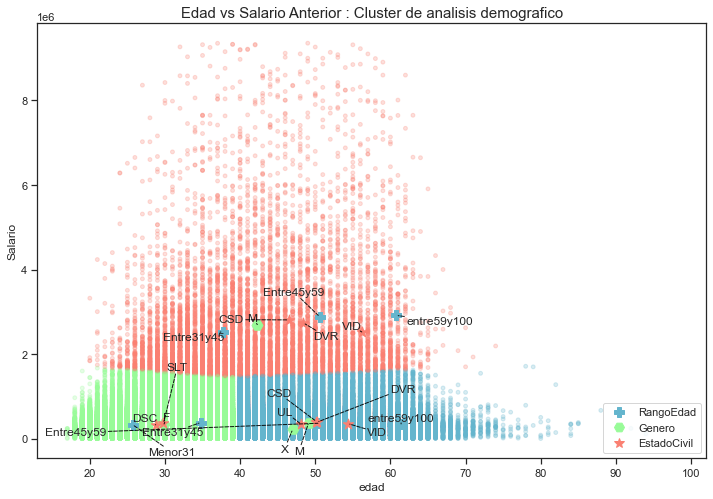

In [67]:
cluster_with_label_gp = edad_salario_cluster_df[(edad_salario_cluster_df['Represent_in_graph']==1) 
                          & ((edad_salario_cluster_df['Category'] == 'Genero')
                            | (edad_salario_cluster_df['Category'] == 'RangoEdad')
                            | (edad_salario_cluster_df['Category'] == 'EstadoCivil'))]
#print(cluster_with_label_gp )

#print(df_raw1[df_raw1.Desempleado_code==1][['edad','salario','Cluster']])
Create_kmeans_cluster_with_label(df_raw1[df_raw1.Desempleado_code==1][['edad','Salario','Cluster']]
                           ,cluster_with_label_gp.reset_index()
                           ,'edad'
                           ,'Salario'
                           ,"Edad vs Salario Anterior : Cluster de analisis demografico")

In [68]:
import sys 
!{sys.executable} --version

Python 3.8.5


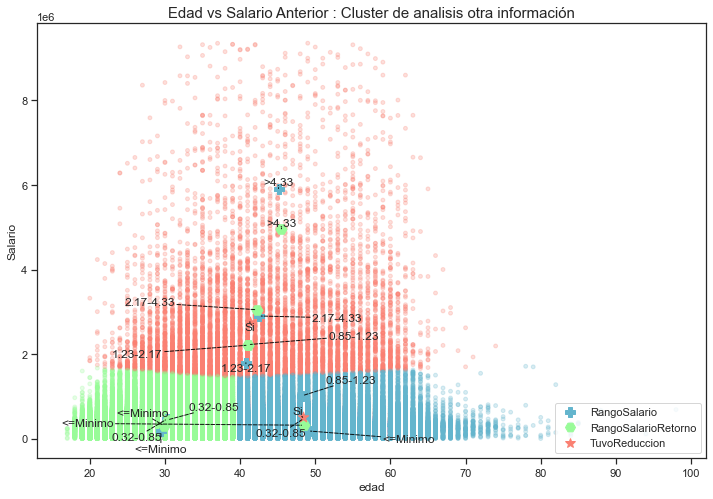

In [69]:
cluster_with_label_gp = edad_salario_cluster_df[(edad_salario_cluster_df['Represent_in_graph']==1) 
                          & ((edad_salario_cluster_df['Category'] == 'TuvoReduccion')
                           | (edad_salario_cluster_df['Category'] == 'RangoSalarioRetorno')
                           #| (edad_salario_cluster_df['Category'] == 'Diferenciabrechas')                          
                            | (edad_salario_cluster_df['Category'] == 'RangoSalario'))]
                           #| (edad_salario_cluster_df['Category'] == 'InactivoPostRetiro'))]
#print(cluster_with_label_gp )

#print(df_raw1[df_raw1.Desempleado_code==1][['edad','salario','Cluster']])
Create_kmeans_cluster_with_label(df_raw1[df_raw1.Desempleado_code==1][['edad','Salario','Cluster']]
                           ,cluster_with_label_gp.reset_index()
                           ,'edad'
                           ,'Salario'
                           ,"Edad vs Salario Anterior : Cluster de analisis otra información")

## 4. Churn customer prediction model

### Data preprocessing

In [70]:
df_raw2.head().T

0            1            2            3  \
edad                             71           64           64           63   
RangoEdad               entre59y100  entre59y100  entre59y100  entre59y100   
Genero                            F            F            F            F   
EstadoCivil                     SLT          VID          VID          CSD   
Salario                       61400   1.3448e+06       717233  1.49417e+06   
RangoSalario                      1            4            2            4   
HayAportes                        2            1            0            2   
SalarioPromedioRetorno        61400       717233          NaN  1.64318e+07   
RangoSalarioRetorno               1            2            0            6   
Brecha                            0            2            2           -2   
InactivoPostRetiro                0            0            8            1   
InactivoPostUltAporte             2            8            8            0   
Pensionado                        0            0            0            0   
TuvoReduccion                     0            1            0            0   
Desempleado                       1            1            1            1   

                                  4  
edad                             63  
RangoEdad               entre59y100  
Genero                            F  
EstadoCivil                     CSD  
Salario                 3.15207e+07  
RangoSalario                      6  
HayAportes                        1  
SalarioPromedioRetorno   1.3429e+06  
RangoSalarioRetorno               4  
Brecha                            2  
InactivoPostRetiro                3  
InactivoPostUltAporte             0  
Pensionado                        0  
TuvoReduccion                     1  
Desempleado                       1

In [71]:
def Data_transformation_renaming(df):
    """ Cambiar el nombre de las columnas y transformarlos en el formato adecuado y devolver el marco de datos """
    df_cal = df.copy()
    
    df_cal['RangoSalario'] = df_cal.RangoSalario.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
    df_cal['RangoSalarioRetorno'] = df_cal.RangoSalarioRetorno.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
    #df_cal['RangoEdad'] = df_cal.RangoEdad.map({'Menor31':1,'Entre31y45':2,'Entre45y59':3,'entre59y100':4,'Mayor100':5}).astype(int)
    #df_cal['Genero'] = df_cal.Genero.map({'F':1,'M':2,'X':0}).astype(int)
    #df_cal['EstadoCivil'] = df_cal.EstadoCivil.map({'DSC':0,'SLT':1,'CSD':2,'DVR':3,'VID':4,'UL':5,'SPR':6}).astype(int) 
    df_cal['HayAportes'] = df_cal['HayAportes'].astype(int)
    df_cal['HayRetiros'] = df_cal['HayRetiros'].astype(int)
    df_cal['TuvoReduccion'] = df_cal['TuvoReduccion'].astype(int)
    df_cal['Pensionado'] = df_cal['Pensionado'].astype(int)
    df_cal['InactivoPostUltAporte'] = df_cal['InactivoPostUltAporte'].astype(int)
    df_cal['InactivoPostRetiro'] = df_cal['InactivoPostRetiro'].astype(int)
    #df_cal['RangoSalarioRetorno'] = df_cal['RangoSalarioRetorno'].astype(int)
    #df_cal['RangoSalario'] = df_cal['RangoSalario'].astype(int)
    df_cal['Desempleado'] = df_cal['Desempleado'].astype(int)
    df_cal['Brecha'] = df_cal['Brecha'].astype(int)
    #df_cal[df_cal['Brecha'] < 0] = 0
   
    # Data transformation
    
    # Converting TotalCharges into Numeric, but some of the records are empty, so first we need to deal with them.
    df_cal.loc[df_cal['SalarioPromedioRetorno']==' ','SalarioPromedioRetorno'] = np.nan
    
    # First we convert TotalCharges to float and then replace with tenure * monthly charges
    df_cal['SalarioPromedioRetorno'] = df_cal['SalarioPromedioRetorno'].astype('float64')
    df_cal.loc[df_cal['SalarioPromedioRetorno'].isnull()==True,'SalarioPromedioRetorno'] = 0 #df_cal['Salario'] 
    
    return df_cal    

In [72]:
# Aqui hay qu normalizar el modelo.
df_model = Data_transformation_renaming(df_raw2)
df_model.head()

edad    RangoEdad Genero EstadoCivil      Salario RangoSalario  HayAportes  \
0  71.0  entre59y100      F         SLT     61400.00     <=Minimo           2   
1  64.0  entre59y100      F         VID   1344800.00    1.23-2.17           1   
2  64.0  entre59y100      F         VID    717233.33    0.32-0.85           0   
3  63.0  entre59y100      F         CSD   1494166.67    1.23-2.17           2   
4  63.0  entre59y100      F         CSD  31520733.33        >4.33           1   

   SalarioPromedioRetorno RangoSalarioRetorno  Brecha  InactivoPostRetiro  \
0                61400.00            <=Minimo       0                   0   
1               717233.33           0.32-0.85       2                   0   
2               717233.33                  No       2                   8   
3             16431816.67               >4.33      -2                   1   
4              1342900.00           1.23-2.17       2                   3   

   InactivoPostUltAporte  Pensionado  TuvoReduccion  Desempleado  
0                      2           0              0            1  
1                      8           0              1            1  
2                      8           0              0            1  
3                      0           0              0            1  
4                      0           0              1            1

In [73]:

df_model.groupby('Brecha').count()

edad  RangoEdad  Genero  EstadoCivil  Salario  RangoSalario  \
Brecha                                                                  
-5          61         61      61           61       61            61   
-4         260        260     260          260      260           260   
-3         969        969     969          969      969           969   
-2        3037       3037    3037         3037     3037          3037   
-1       38236      38236   38236        38236    38236         38236   
 0      157333     157333  157333       157333   157333        157333   
 1      154162     154162  154162       154162   154162        154162   
 2       58378      58378   58378        58378    58378         58378   
 3        6124       6124    6124         6124     6124          6124   
 4        4101       4101    4101         4101     4101          4101   
 5        1629       1629    1629         1629     1629          1629   
 6         575        575     575          575      575           575   

        HayAportes  SalarioPromedioRetorno  RangoSalarioRetorno  \
Brecha                                                            
-5              61                      61                   61   
-4             260                     260                  260   
-3             969                     969                  969   
-2            3037                    3037                 3037   
-1           38236                   38236                38236   
 0          157333                  157333               157333   
 1          154162                  154162               154162   
 2           58378                   58378                58378   
 3            6124                    6124                 6124   
 4            4101                    4101                 4101   
 5            1629                    1629                 1629   
 6             575                     575                  575   

        InactivoPostRetiro  InactivoPostUltAporte  Pensionado  TuvoReduccion  \
Brecha                                                                         
-5                      61                     61          61             61   
-4                     260                    260         260            260   
-3                     969                    969         969            969   
-2                    3037                   3037        3037           3037   
-1                   38236                  38236       38236          38236   
 0                  157333                 157333      157333         157333   
 1                  154162                 154162      154162         154162   
 2                   58378                  58378       58378          58378   
 3                    6124                   6124        6124           6124   
 4                    4101                   4101        4101           4101   
 5                    1629                   1629        1629           1629   
 6                     575                    575         575            575   

        Desempleado  
Brecha               
-5               61  
-4              260  
-3              969  
-2             3037  
-1            38236  
 0           157333  
 1           154162  
 2            58378  
 3             6124  
 4             4101  
 5             1629  
 6              575

#### Train & Test data split

In [74]:
def Shuffle_data(df):
    """ Return shuffled data based on rows """
    return shuffle(df).reset_index().drop('index'
                                          , axis = 1)

def One_hot_encoding(df,feature):
    """ Apply one hot encoding to given features """
    return pd.concat([df
                      , pd.get_dummies(df[feature])]
                     , axis = 1)

def Merge_df(data, features):
    """ Return merge dataframe with given features"""
    merged_df = pd.DataFrame()
    for feature in features:
        merged_df = pd.concat([merged_df, data[feature]]
                              , axis = 1)
    return merged_df

def Normalize_df(data, cols):
    """ Normalize features """
    for col in cols:
        data[col] = Normalize_feature(data[[col]])
        
    return data    

def Create_model_df(df, col_cols, nom_cols, binary_cols, num_cols, target_col):
    """ Preparing data for modelling """
    
    df_model = Merge_df(df , [col_cols, num_cols, target_col])
    df_model = Shuffle_data(df_model)
    df_model = One_hot_encoding(df_model, nom_cols)
    
    df_model.drop(nom_cols, axis = 1, inplace = True)
    
    df_model = Normalize_df(df_model, num_cols)
    
    return (df_model.loc[:, ~df_model.columns.isin(target_col)]
            , df_model[target_col].values.flatten())


def Train_test_df(feature, target, test_size):
    """ Spliting data to train and test"""
    return train_test_split(feature
                     ,target
                     ,test_size= test_size
                     ,random_state= random_state)

In [75]:
'''
cat_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","Pensionado","TuvoReduccion"]
num_cols = ["HayAportes","Brecha","InactivoPostUltAporte","InactivoPostRetiro"]
target_col = 'Desempleado'

# spliting categorical columns into Nominal and Binary columns
#nominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","HayAportes",
#                 "Brecha","InactivoPostUltAporte","InactivoPostRetiro"]

nominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno"]
binary_cols = ["Pensionado","TuvoReduccion"]
monto_cols = ["Salario","SalarioPromedioRetorno"]
'''

'\ncat_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","Pensionado","TuvoReduccion"]\nnum_cols = ["HayAportes","Brecha","InactivoPostUltAporte","InactivoPostRetiro"]\ntarget_col = \'Desempleado\'\n\n# spliting categorical columns into Nominal and Binary columns\n#nominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","HayAportes",\n#                 "Brecha","InactivoPostUltAporte","InactivoPostRetiro"]\n\nnominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno"]\nbinary_cols = ["Pensionado","TuvoReduccion"]\nmonto_cols = ["Salario","SalarioPromedioRetorno"]\n'

In [76]:
df_model_feature ,df_model_target = Create_model_df(df_model
                                                    , cat_cols
                                                    , nominal_cols
                                                    , binary_cols
                                                    , num_cols
                                                    , [target_col])

x_train, x_test, y_train, y_test = Train_test_df(df_model_feature
                                                 , df_model_target
                                                 , test_size = 0.2)


print("----------------------------")
print("Original features shape, ", df_model_feature.shape)
print("Original target shape, ", df_model_target.shape)
print("x train shape, ", x_train.shape)
print("y train shape, ", y_train.shape)
print("x test shape, ", x_test.shape)
print("y test shape, ", y_test.shape)
print("----------------------------")

----------------------------
Original features shape,  (424865, 32)
Original target shape,  (424865,)
x train shape,  (339892, 32)
y train shape,  (339892,)
x test shape,  (84973, 32)
y test shape,  (84973,)
----------------------------


#### Class imbalance

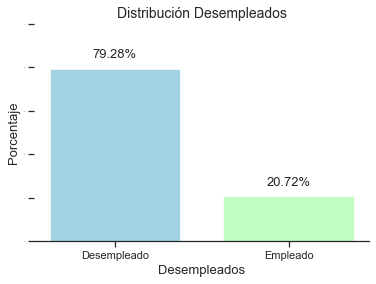

In [77]:
# Distribution in train dataset

Tasa_Desempleados = pd.value_counts(y_train) / len(y_train)
Generate_bar_graph(Tasa_Desempleados.index.map({0:'Empleado',1:"Desempleado"})
                   , Tasa_Desempleados.values
                   , 'Desempleados'
                   , 'Porcentaje'
                   , 'Distribución Desempleados')

Aquí, nuestro modelo de entrenamiento tiene un problema de desequilibrio de clases debido a la desigualdad en la distribución de datos. 

#### Se hara Upsampling de los datos de entrenamiento (train)

In [78]:
# Upsampling usando SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = random_state) #, ratio = 1.0)
x_train_sm , y_train_sm = sm.fit_resample(x_train,y_train)

print("----------------------------")
print("Original x train shape, ", x_train.shape)
print("Resample x train shape, ", x_train_sm.shape)
print("----------------------------")

----------------------------
Original x train shape,  (339892, 32)
Resample x train shape,  (538920, 32)
----------------------------


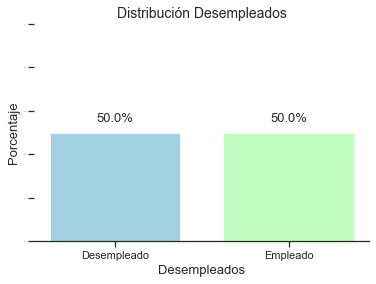

In [79]:
# Despues upsampling la nueva distribución del dataset de entrenamiento

Tasa_Desempleados = pd.value_counts(y_train_sm) / len(y_train_sm)
Generate_bar_graph(Tasa_Desempleados.index.map({0:'Empleado',1:"Desempleado"})
                   , Tasa_Desempleados.values
                   , 'Desempleados'
                   , 'Porcentaje'
                   , 'Distribución Desempleados')

#### Desarrollo del Modelo

Aquí, usaré modelos de regresión logística, Random forest y aumento de gradiente(**Gradient boosting**) para predecir desempleados y comparar qué modelo funciona mejor para nuestro conjunto de datos. Además, analizare el conjunto de datos original y los datos de muestreo superior para todos estos modelos.

## Ajuste de hiperparametros (Hyperparameter Tunning)

Based on original and Upsampling data, tunned hyperparameter for our traing data for all three models.

Basado en datos originales y de Upsampling, ajustamos los hiperparámetros para nuestros datos de entrenamiento para los tres modelos.

In [85]:
def Parameter_tunning(x, y, models, clsModelsNm, parameters, score):
    
    tuned_params = {}
    for i,model in enumerate(models):
        print(clsModelsNm[i])
        if clsModelsNm[i] == "Logistic Regression":
            ## Se cambiaron porque daba error con los parametros anteriores
            solver_options = ['newton-cg', 'liblinear', 'sag']  ## Le quite esta 'lbfgs',
            multi_class_options = ['ovr', 'multinomial']
            class_weight_options = ['None', 'balanced']

            param_grid_RL = dict(solver = solver_options, multi_class = 
            multi_class_options, class_weight = class_weight_options)

            grid = GridSearchCV(estimator = model 
                            , cv = 5
                            , param_grid = param_grid_RL  ####parameters[clsModelsNm[i]]
                            , scoring = score
                            , n_jobs = 3
                           )            
            
        else:
            grid = GridSearchCV(estimator = model 
                            , cv = 5
                            , param_grid = parameters[clsModelsNm[i]]
                            , scoring = score
                            , n_jobs = 3
                           )
        grid.fit(x,y)
        print(grid.best_score_)
        print(grid.best_params_)
        tuned_params[clsModelsNm[i]] = {'params':grid.best_params_}
    
    return tuned_params

In [86]:
clsModelsNm = ["Logistic Regression", "Random Forest", "Gradient boosting"]
#clsModelsNm = ["Random Forest", "Gradient boosting"]
scoreMatrix = ['accuracy','precision','recall','f1','neg_log_loss']
'''
clsParams = {'Random Forest': {'max_depth':[3,5,7,10,15,20]
                                ,'n_estimators':[100,150,200]
                                ,'max_features':['auto',0.7,0.2]
                                ,'min_samples_leaf':[1,5,10,15,20]
                                 }
             , 'Gradient boosting': {'learning_rate': [0.05, 0.1, 0.2]
                                    ,'n_estimators':[10,50,100,150,200]
                                    ,'max_depth':[3,5,7]
                                    ,'min_samples_split':[0.1, 0.5, 1.0]
                                    ,'min_samples_leaf':[1, 5, 10, 15, 20]
                                    ,'subsample': [0.1, 0.5, 0.7 , 1]
                                    }
            }

'''
clsParams = {'Logistic Regression':{'C':[0.1, 0.5, 1, 5, 10, 15, 20, 100] 
                                   ,'penalty':['l1','l2']
                                    }
             , 'Random Forest': {'max_depth':[3,5,7,10,15,20]
                                ,'n_estimators':[100,150,200]
                                ,'max_features':['auto',0.7,0.2]
                                ,'min_samples_leaf':[1,5,10,15,20]
                                 }
             , 'Gradient boosting': {'learning_rate': [0.05, 0.1, 0.2]
                                    ,'n_estimators':[10,50,100,150,200]
                                    ,'max_depth':[3,5,7]
                                    ,'min_samples_split':[0.1, 0.5, 1.0]
                                    ,'min_samples_leaf':[1, 5, 10, 15, 20]
                                    ,'subsample': [0.1, 0.5, 0.7 , 1]
                                    }
            }            

In [ ]:
clsLR = LogisticRegression(random_state = random_state)
clsRF = RandomForestClassifier(random_state = random_state)
clsGB = GradientBoostingClassifier(random_state = random_state)

clsModels = [clsLR, clsRF, clsGB]
#clsModels = [clsRF, clsGB]

tuned_params = Parameter_tunning(x_train, y_train, clsModels, clsModelsNm, clsParams, 'neg_log_loss')

Logistic Regression


D:\Personal\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.00127424         nan -0.0012788          nan         nan         nan
 -0.00132124 -0.00184337 -0.00132628 -0.00073085         nan -0.0007333 ]
  warnings.warn(


-0.0007308519665724806
{'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'newton-cg'}
Random Forest
-1.3775700553168742e-07
{'max_depth': 15, 'max_features': 0.7, 'min_samples_leaf': 1, 'n_estimators': 150}
Gradient boosting


In [ ]:
#### Upsampling data

In [ ]:
clsLR_sm = LogisticRegression(random_state = random_state)
clsRF_sm = RandomForestClassifier(random_state = random_state)
clsGB_sm = GradientBoostingClassifier(random_state = random_state)

clsModels_sm = [clsLR_sm, clsRF_sm, clsGB_sm]

tuned_params_sm = Parameter_tunning(x_train_sm, y_train_sm, clsModels_sm, clsModelsNm, clsParams , 'neg_log_loss')

### Model Comparision

During hyperparameter tunning process, I got best parameters for each models. using these parameter and corss_val_score method, 
I have compared different metrics and try to find best threshold value with lower log loss score.

Intuition process -

Because target variable is binary value, log loss would be better metrics to find uncertainity of the model. Once I'll explore a better model wih lower log loss score, then I'll tune threshold to improve F1/Recall/Precision score.

In [ ]:
# Graph of precision & recall against threshold
def plot_precision_recall_vs_thresold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],label="Precision")
    plt.plot(thresholds,recalls[:-1],label="Recall")
    plt.plot(thresholds,2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1]) ,label="F1")
    plt.title("Precision, recall & F1 vs thresold")
    plt.xlabel("Thresold")
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
def Cross_validation_score(clsModels, clsModelsNm, clsSample, scoreMatrix):
    """ Cross validation using cross_val_score method """
    for i,model in enumerate(clsModels):
        print("===============================================")
        print(clsModelsNm[i])

        for j, sample in enumerate(clsSample):
            print("************************************************")
            print(sample[2])
            
            for score in scoreMatrix:
                scores = cross_val_score(model, sample[0], sample[1], cv=5 , scoring = score)
                print(score, " score:", scores.mean())
                
            y_scores = cross_val_predict(model, sample[0], sample[1], cv=5, method="predict_proba") 
            
            
            precisions, recalls, thresholds = metrics.precision_recall_curve(sample[1], y_scores[:][:,1]) 
            plot_precision_recall_vs_thresold(precisions, recalls, thresholds)
            score_matrix = pd.DataFrame({'Precisions': precisions[:-1]
                                ,'Recalls': recalls[:-1]
                                ,'F1': 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1])
                                ,'Threshold': thresholds
                               })
            #print("When percision and recall are same \n" , score_matrix[ score_matrix['Precisions'] == score_matrix['Recalls']] )
            print("When F1 score is max \n" , score_matrix[ score_matrix['F1'] == max(score_matrix['F1'])] )

#### Original data

In [ ]:
# Original data

clsLR = LogisticRegression(random_state = random_state
                           , C = 0.5
                           , penalty = 'l2')

clsRF = RandomForestClassifier(random_state = random_state
                              ,max_depth = 15
                              ,max_features = 'auto'
                              ,min_samples_leaf = 10
                              ,n_estimators = 150 )

                        
clsGB = GradientBoostingClassifier(random_state = random_state
                              , max_depth = 5
                              , n_estimators = 150
                              , learning_rate = 0.05
                              , min_samples_leaf = 20 
                              , min_samples_split = 0.1
                              , subsample = 0.7)


clsModels = [clsLR, clsRF, clsGB]

Cross_validation_score(clsModels, clsModelsNm, [(x_train, y_train,'Original data')], scoreMatrix)

### Upsampling data

In [ ]:
# resample data


clsLR_sm = LogisticRegression(random_state = random_state
                           , C = 0.5
                           , penalty = 'l1')

clsRF_sm = RandomForestClassifier(random_state = random_state
                               , max_depth = 20
                              , n_estimators = 200
                              , max_features = 'auto'
                              , min_samples_leaf = 1 )

clsGB_sm = GradientBoostingClassifier(random_state = random_state
                              , max_depth = 5
                              , n_estimators = 100
                              , learning_rate = 0.2
                              , min_samples_leaf = 10 
                              , min_samples_split = 0.1
                              , subsample = 1)
                        
clsModels_sm = [clsLR_sm, clsRF_sm, clsGB_sm]

Cross_validation_score(clsModels_sm, clsModelsNm, [(x_train_sm, y_train_sm,'Upsampled data')], scoreMatrix)

Using these threshold values, now we will tune our model and evaluate it on testing dataset.

### Model Evaluation

Up till now, I was working on training dataset to train model. Let's checked how models are performing on unseen dataset (testing).

In [ ]:
def Cus_log_loss(target, predicted):
    if len(predicted) != len(target):
        print("Data object initiated")
        return
    
    target = [float(x) for x in target] # converting target into float
    predicted = [min([max([x,1e-15]), 1-1e-15]) for x in predicted]
        
    return -1.0 / len(target) *  sum([ target[i] * math.log(predicted[i]) + (1.0 - target[i]) * math.log(1.0 - predicted[i]) 
                                      for i in range(len(predicted))])

In [ ]:

def Model_evaluation(models, clsModelsNm, x_train, y_train, x_test, y_test,  threshold ):
    
    predicted_val = {}
    for i, model in enumerate(clsModelsNm):
        models[i].fit(x_train,y_train)
        predicted_proba = models[i].predict_proba(x_test)
        
        predicted = predicted_proba[:,1].copy()
        predicted[predicted >=threshold[i]] = 1
        predicted[predicted < threshold[i]] = 0
        
        confusion_matrix_matrix = metrics.confusion_matrix(y_true = y_test
                                                   ,y_pred = predicted
                                                   #,normalize = 'true' 
                                                   )
        
        print("***********",clsModelsNm[i], "*************")
        print(metrics.classification_report(y_test, predicted))
        print("*******************************************")
        #print("Log loss score", round(metrics.log_loss(y_test,models[i].predict_proba(x_test)[:,1]),2))
        print("Log loss score", round(Cus_log_loss(y_test,predicted_proba[:,1]),2))
        print("*******************************************")
        print("Confusion matrix")
        sns.heatmap(confusion_matrix_matrix
                    , annot=True
                    , fmt="d"
                   )
        plt.xlabel("Predicted label")
        plt.ylabel("Actual label")
        plt.show()
        print("*******************************************")
        
        predicted_val[model] = predicted

### Original data

In [ ]:
Logistic_threshold = 0.31
Random_forest_threshold = 0.30
Gradient_boosting_threshold = 0.30

Model_evaluation(clsModels
                 , clsModelsNm
                 , x_train
                 , y_train
                 , x_test
                 , y_test
                 , [Logistic_threshold
                    ,Random_forest_threshold
                    , Gradient_boosting_threshold  ] )

### Upsampling data

In [ ]:
Logistic_threshold_sm = 0.37
Random_forest_threshold_sm = 0.46
Gradient_boosting_threshold_sm = 0.45

Model_evaluation(clsModels_sm
                 , clsModelsNm
                 , x_train_sm
                 , y_train_sm
                 , x_test
                 , y_test
                 , [Logistic_threshold_sm
                    ,Random_forest_threshold_sm
                    , Gradient_boosting_threshold_sm  ] )

### Model conclusion

Based on model comparision and evaluation process, upsampling data works better during training process, however not with unseen data (based on log loss score). One of the reason could be data leakage in corss_val_score step.

However, log loss score for original dataset remains same with training dataset as well as testing dataset.

From above analysis, gradient boosting with original dataset has stable and best score. So, for prediction process I have used it.

### Feature importance

In [ ]:
feature_importance = pd.Series(clsGB.feature_importances_, x_train.columns)
plt.figure(figsize = (10,8))
feature_importance.sort_values().plot(kind = 'barh')
plt.xlabel("Importance", fontsize = 13)
plt.ylabel("Features", fontsize = 13)
plt.title("Feature importance", fontsize = 14)

Based on feature importance graph, it tells that Totalcharges, Tenure, Monthly charges , Contract type, Payment method, Internet sevice type, PaperlessBilling are some important features to predict churn customers.

In [ ]:
churn_customer_prob = pd.DataFrame({'Predicted_proba': clsGB.predict_proba(x_test)[:][:,1]
                                   , 'predicted': clsGB.predict(x_test)})
churn_customer_prob

### 5. Retention plan

Prediction on Existing Customer

Since we generated a model based on Churn and Existing customers, which help to classify both of them. Now we can use same model on existing customers to find the probability of churn.

In [ ]:
existing_cust = df_model[df_model['Churn']==0]
existing_cust_feature ,existing_cust_target = Create_model_df(df_model[df_model['Churn']==0]
                                                    , cat_cols
                                                    , nominal_cols
                                                    , binary_cols
                                                    , num_cols
                                                    , [target_col])

In [ ]:
existing_customer_churn_prob = clsGB.predict_proba(existing_cust_feature)

In [ ]:
existing_cust['Churn_proba'] = existing_customer_churn_prob[:][:,1]

In [ ]:
plt.hist(existing_cust['Churn_proba']
         , bins = 10)

plt.xlabel("Probability of Churn", fontsize=13)
plt.ylabel("Customers", fontsize=13)
plt.title("Existing customers' Churn probability distribution", fontsize=14)

Define existing customers based on probability of churn;

In [ ]:
existing_cust.loc[existing_cust['Churn_proba'] >= 0.8 , 'Risk_type'] = 'Very high'
existing_cust.loc[(existing_cust['Churn_proba'] >= 0.6) & (existing_cust['Churn_proba'] < 0.8)  , 'Risk_type'] = 'High'
existing_cust.loc[(existing_cust['Churn_proba'] >= 0.4) & (existing_cust['Churn_proba'] < 0.6) , 'Risk_type'] = 'Medium'
existing_cust.loc[(existing_cust['Churn_proba'] >= 0.2) & (existing_cust['Churn_proba'] < 0.4) , 'Risk_type'] = 'Low'
existing_cust.loc[(existing_cust['Churn_proba'] > 0.0) & (existing_cust['Churn_proba'] < 0.2) , 'Risk_type'] = 'Very low'

In [ ]:
existing_cust['Risk_type'].value_counts()

In [ ]:
existing_cust['Risk_type'].value_counts().plot(kind = 'barh')
plt.title("Existing customer risk type distribution", fontsize=14)
plt.ylabel("Risk type", fontsize = 13)
plt.xlabel("Customers", fontsize = 13)

We can provide retension plans to high risk and very high risk type customers.

## Conclusion

In this notebook, I have tried to divide customer churn prediction problem into steps like exploration, profiling, clustering, model selection & evaluation and retention plans. Based on this analysis, we can help retention team to analyze high risk churn customers before they leave the company.

Moreover, we can add different datasources like customer inquires, seasonality in sales, more demographic information to make our prediction accurate.